# 导入

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

## correlation

In [2]:
lon = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/相关系数的空间分布.xlsx')['lon']
lat = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/相关系数的空间分布.xlsx')['lat']
slope1 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/相关系数的空间分布.xlsx')['A-TvsET-TPDC']
slope2 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/相关系数的空间分布.xlsx')['A-TvsET-ERA5']
slope3 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/相关系数的空间分布.xlsx')['A-TvsET-GLDAS']
slope4 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/相关系数的空间分布.xlsx')['A-TvsET-GLEAM']

DATA = pd.DataFrame()
DATA['Lon'] = lon
DATA['Lat'] = lat
DATA['slope1'] = slope1
DATA['slope2'] = slope2
DATA['slope3'] = slope3
DATA['slope4'] = slope4

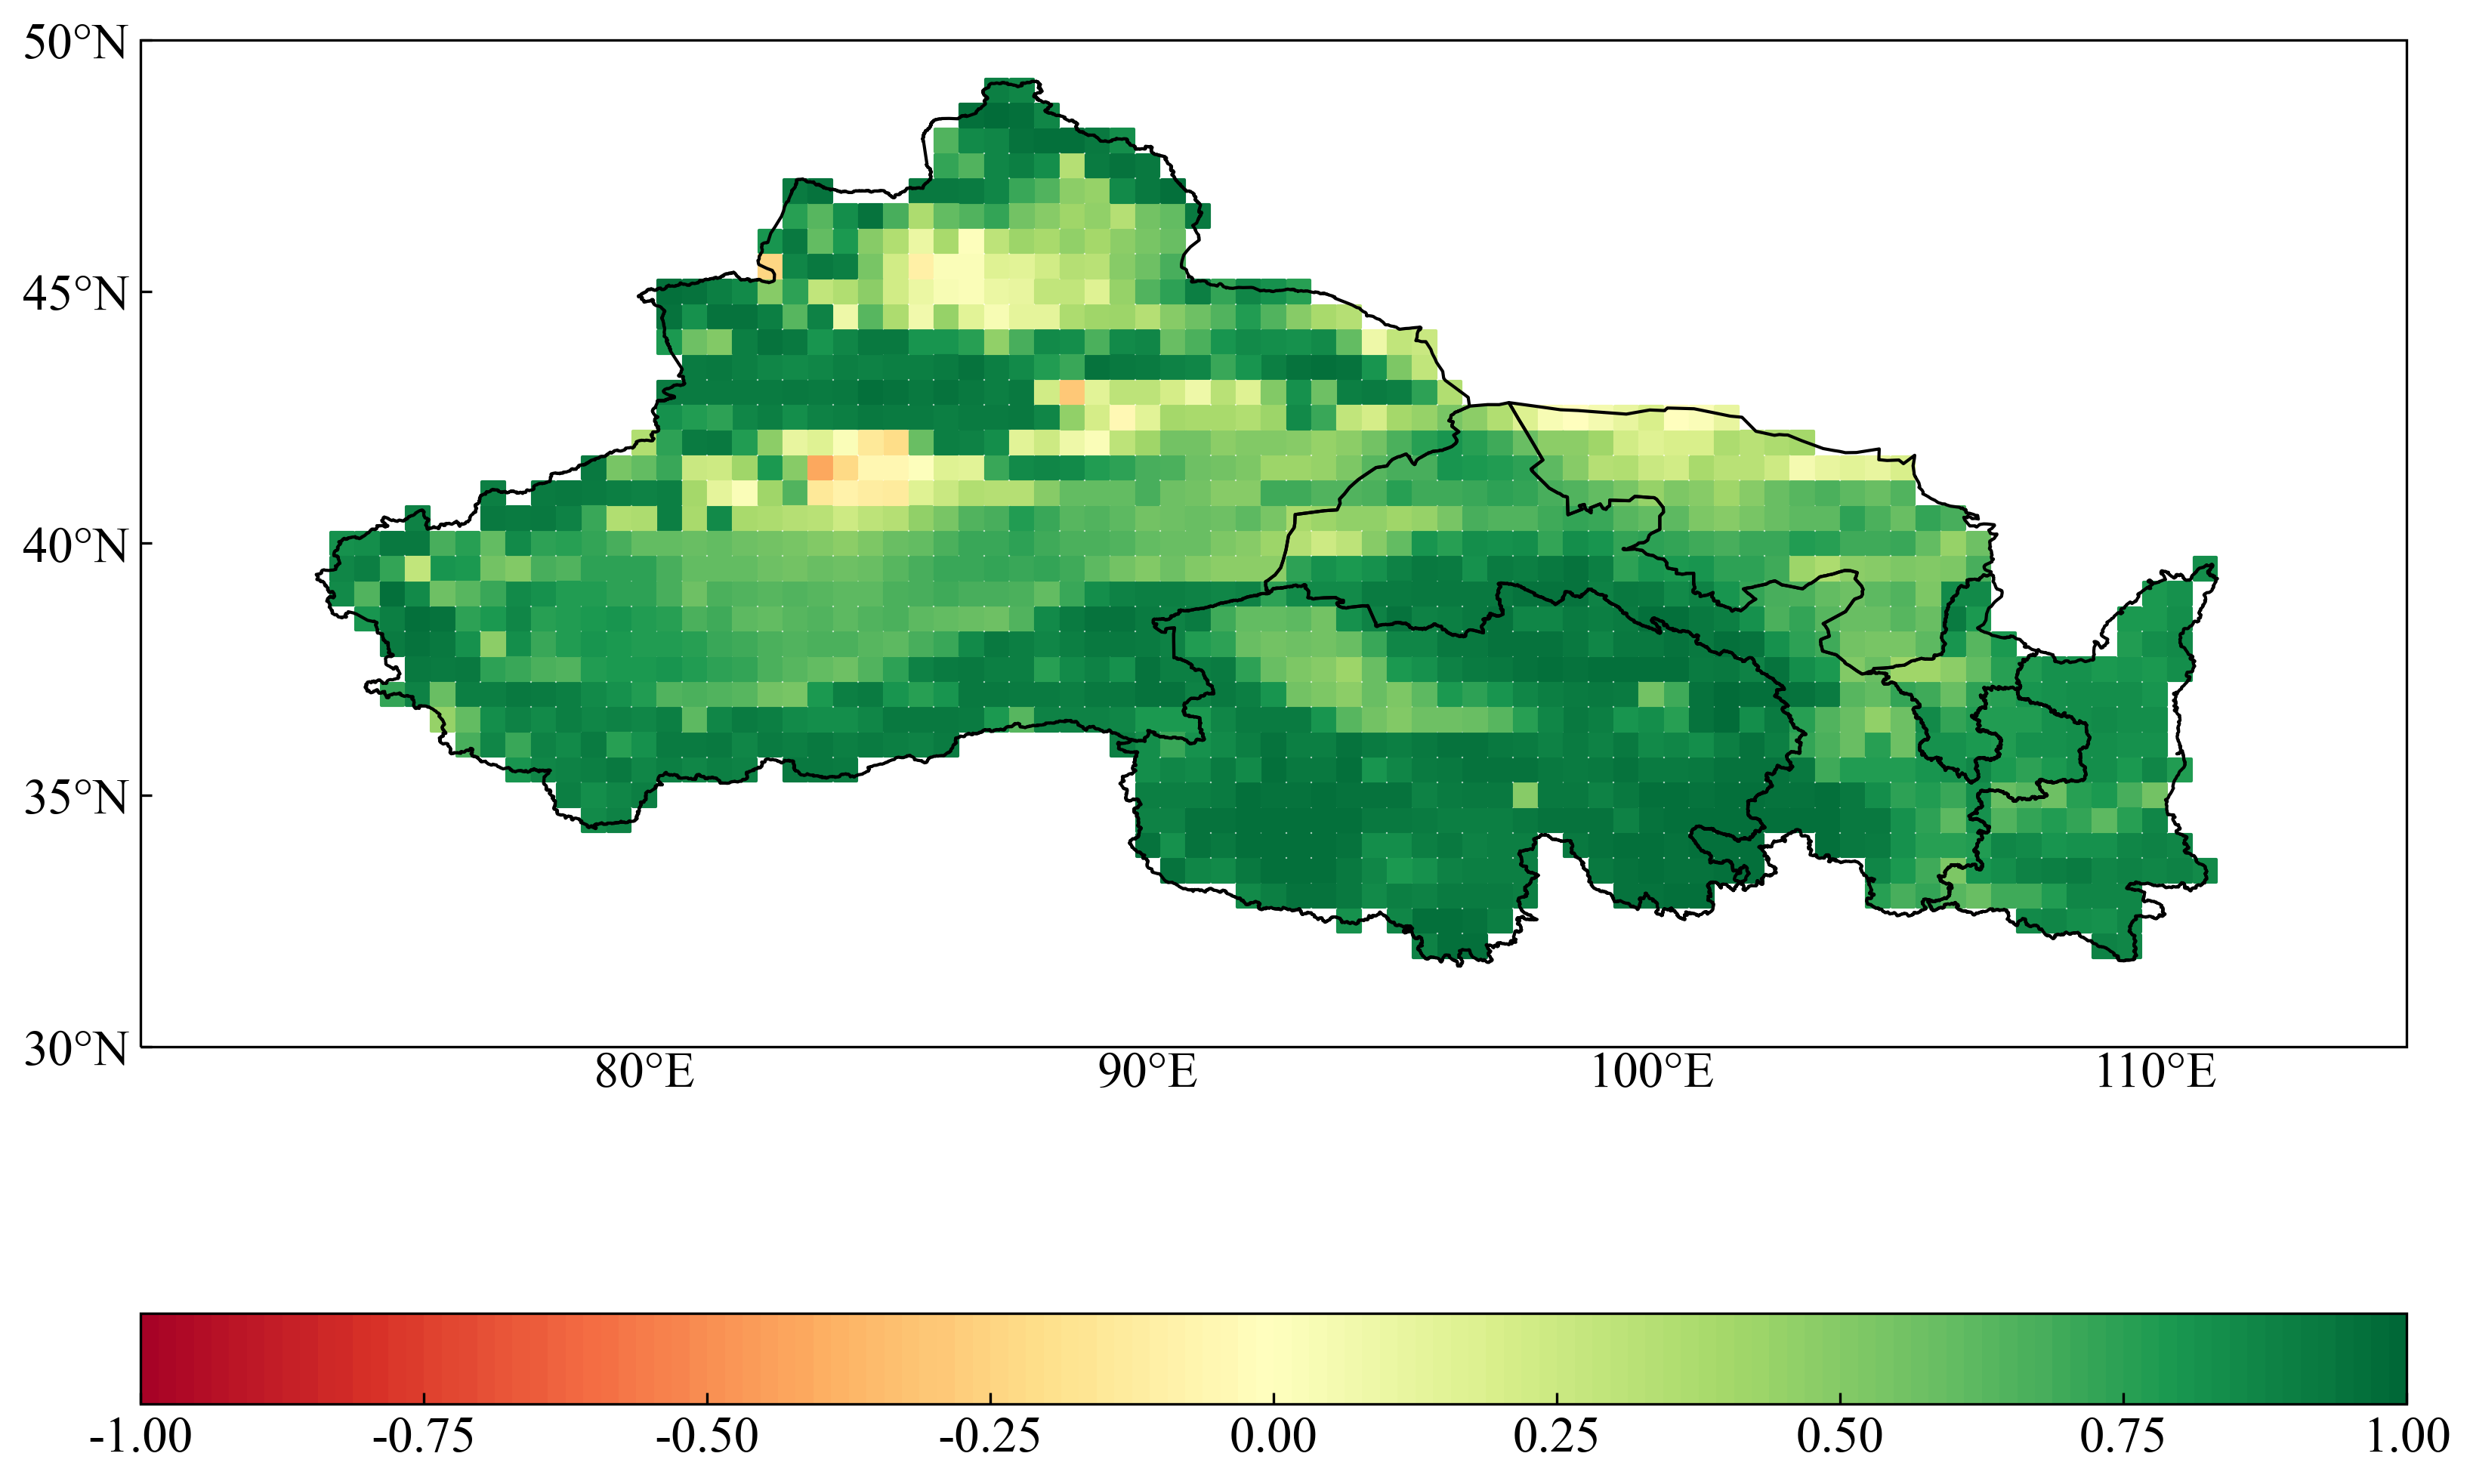

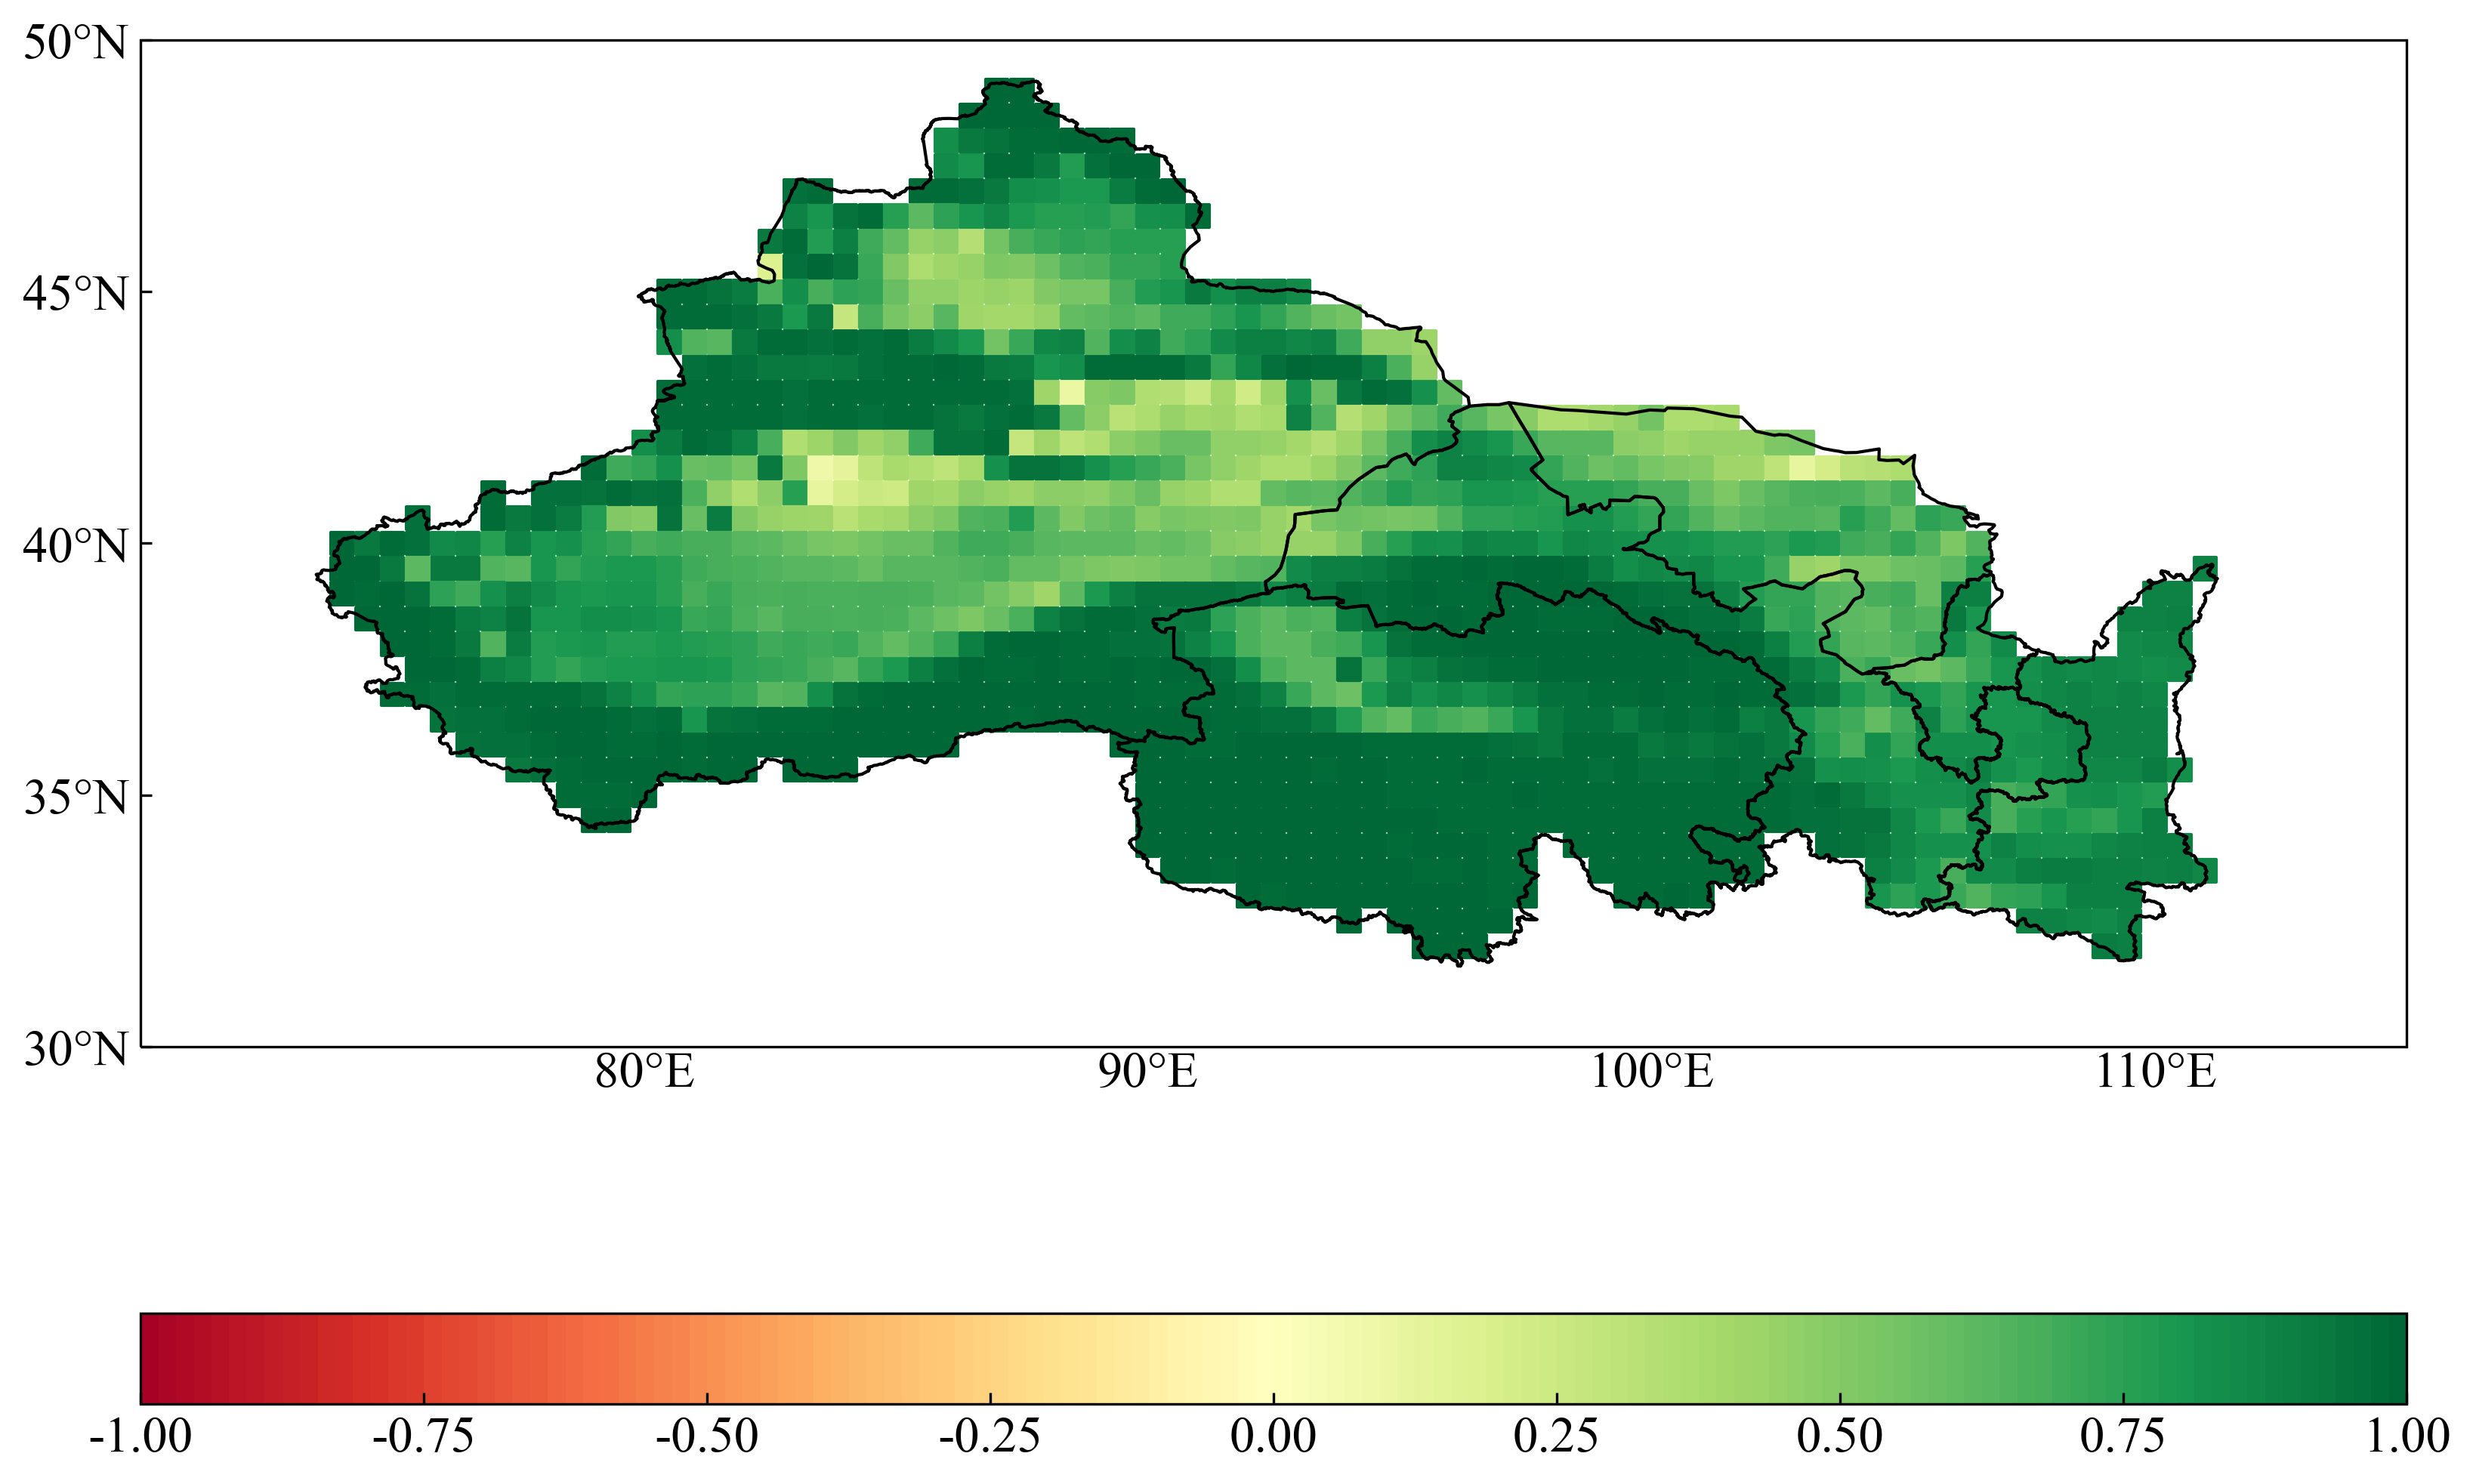

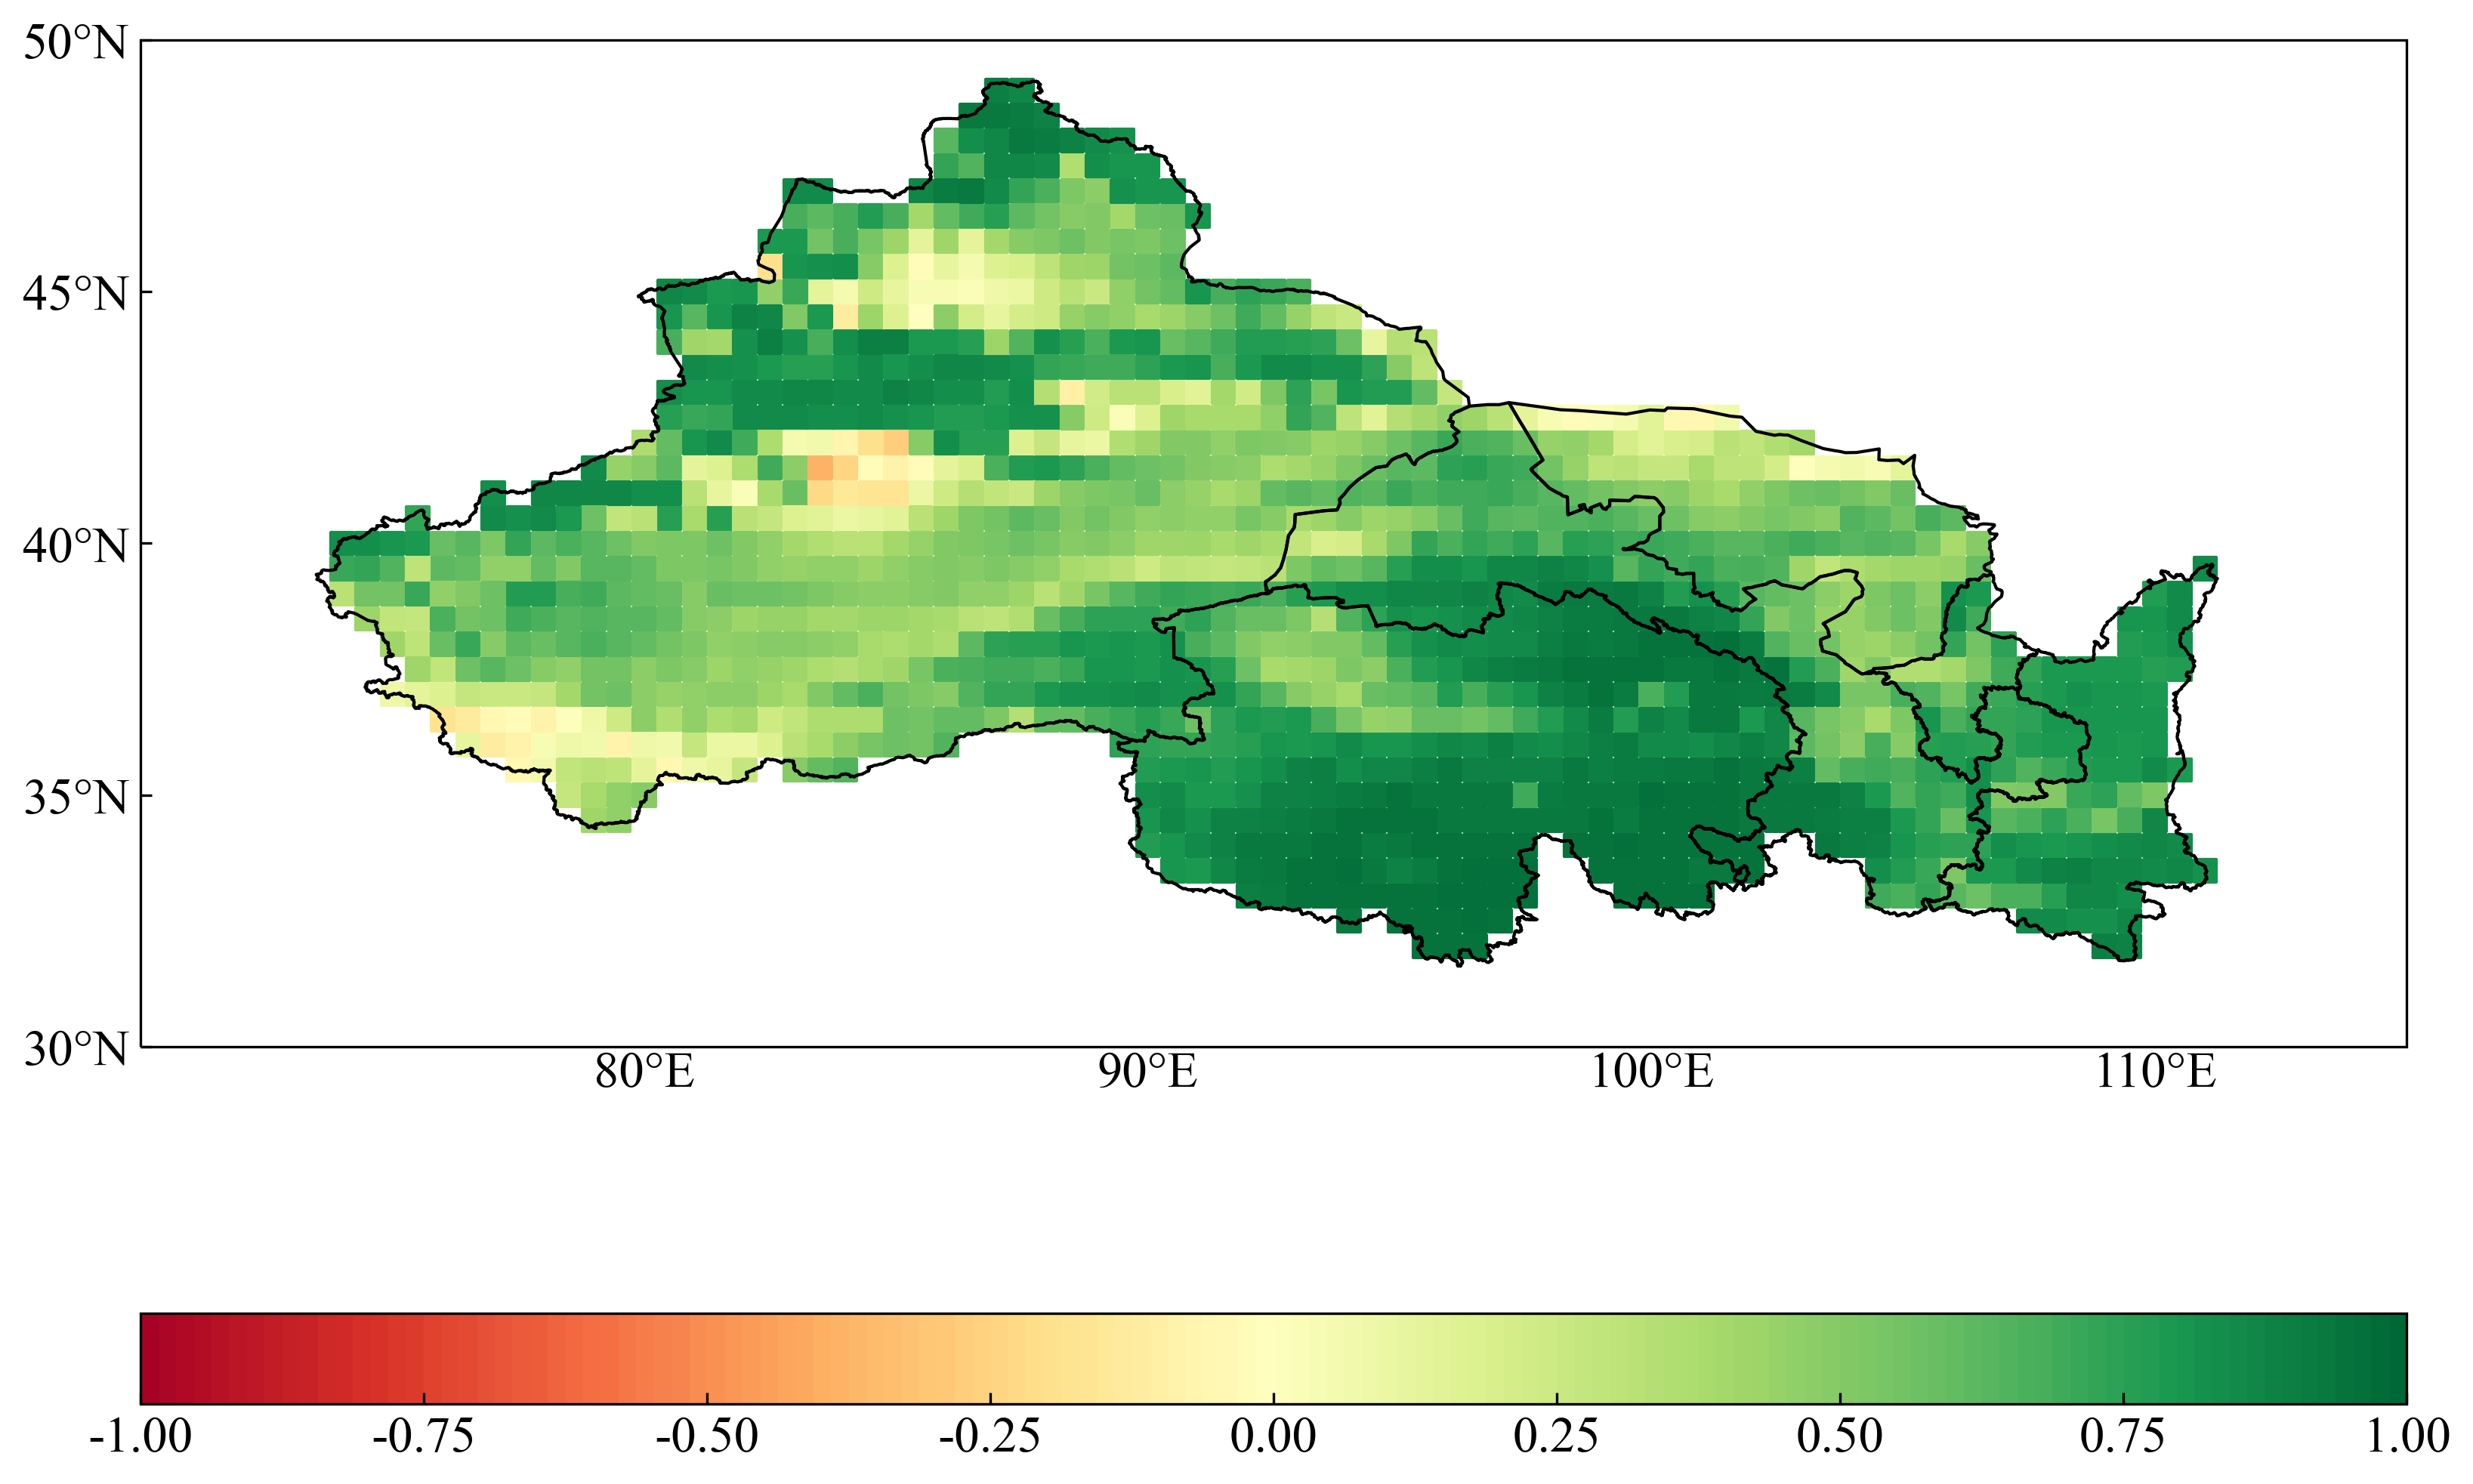

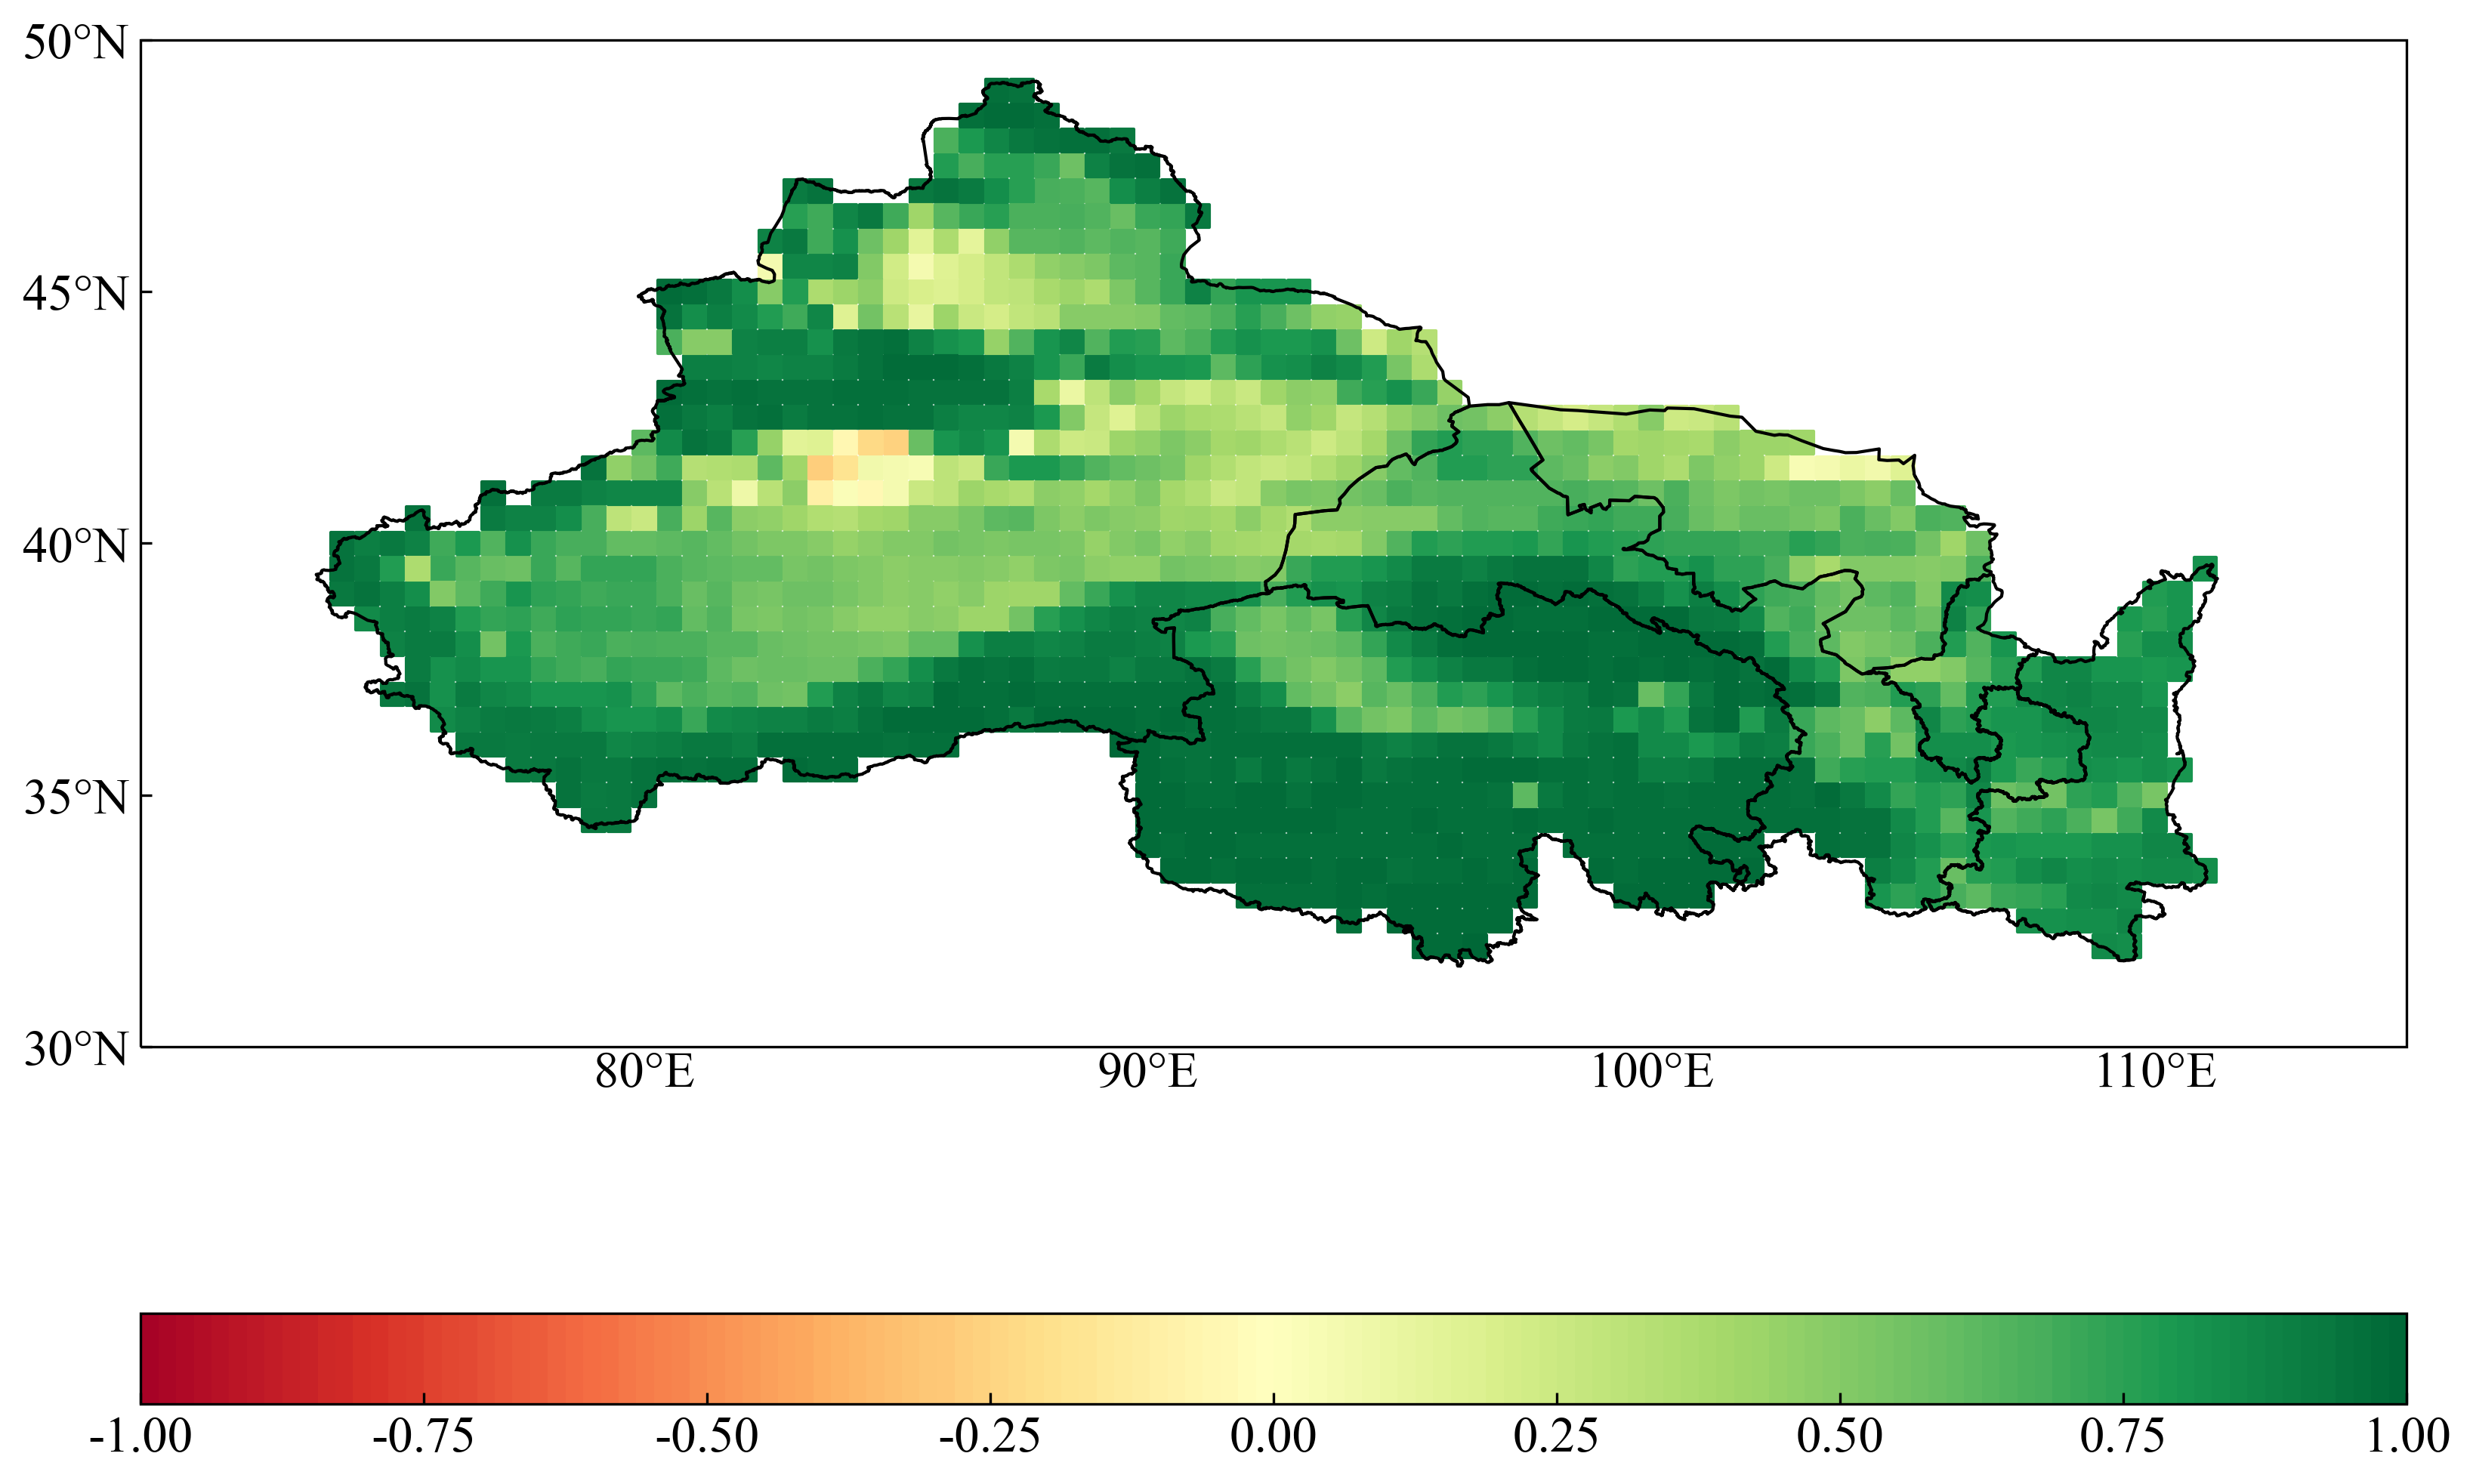

In [11]:
def graph_yellow_river(lon,lat,data,fig_a): # txt site-data # judge whether fig a or b 
    ## graph
    import cartopy.crs as ccrs
    import matplotlib as mpl
    import cmaps
    from matplotlib import rcParams
    import matplotlib.pyplot as plt
    import cartopy.io.shapereader as shpreader
    from cartopy.io.shapereader import Reader, natural_earth
    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

    config = {
        'font.family':'Times New Roman',
        'font.size':16,
        'axes.unicode_minus':False

    }
    rcParams.update(config)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # chinese_font = FontProperties(fname='/mnt/e/Research_life/cyq/微软雅黑.ttf')

    # data = DATA['slope1']
    fig = plt.figure(figsize=(20,20), dpi = 300)
    proj = ccrs.PlateCarree()

    # 使图一colorbar映射在同一水平
    # norm1 = mpl.colors.Normalize(vmin=-abs(np.nanmax(slope1)), vmax=abs(np.nanmax(slope1)))

    levels = [0,0.002,0.004]
    ## graph one
    ax1 = fig.add_axes([0.1, 0.9, 0.5, 0.5],projection = proj)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.2, color='k', alpha=0.5, linestyle='--')
    
    if fig_a=='a':
        # ax1.set_title('(a)',loc='left',fontsize=26)
        gl.ylabels_right = False
        gl.ylabels_left = False
        gl.xlabels_top = False
    else:
        # ax1.set_title('(b)',loc='right',fontsize=26)
        gl.ylabels_left = False
        gl.ylabels_left = False
        gl.xlabels_top = False
    gl.xlines = False
    gl.ylines = False
    china = shpreader.Reader('/mnt/e/Research_life/ArcGIS/西北片区省界/西北片区省界/更改坐标系后/1.shp').geometries()
    ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
    # ax1.set_extent([95,114,32,43], crs = ccrs.PlateCarree())
    # ax1.scatter(lon,lat, p,[np.nanmin(p),0.01,np.nanmax(p)], zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
    # # 设置norm.
    bins = [0.0001, 0.002, 0.004]
    nbin = len(bins) - 1
    norm = mcolors.BoundaryNorm(bins, nbin)
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    # # 设置cmap.
    position1 = fig.add_axes([0.1, 0.96, 0.5, 0.02])
    color = ['#e0aea4','#c8cc89']
    cmap = mcolors.ListedColormap(color)
    cmap = cm.get_cmap(cmap,nbin)
    cmap.set_under('#9e1e71')
    cmap.set_over('#636e2e')
    c1 = ax1.scatter(lon,lat,s=51,marker='s',zorder=0,c=data,transform=ccrs.PlateCarree(),
                     cmap=cmaps.MPL_RdYlGn,
                     norm=norm
                     )
    cbar=fig.colorbar(c1,cax=position1,orientation='horizontal',format='%.2f',
                    #   extend='both'
                      )
    ax1.set_extent([70,115,30,50], crs = ccrs.PlateCarree())
    ax1.set_yticks([30, 35, 40, 45, 50], crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter()
    ax1.yaxis.set_major_formatter(lat_formatter)
    # ax1.set_xticks(range(70, 116, lon_interval), crs=ccrs.PlateCarree())
    #添加色标，position定义色标位置，c1指定从c1填色图层取色，由于C3,C1的levles相同，所以色标一致，orientation设置色标为水平还是垂直，format设置色标标签格式
    # cbar.set_label('趋势变化',fontproperties=chinese_font,fontsize = 16)
    return


graph_yellow_river(DATA['Lon'],DATA['Lat'],DATA['slope1'],'a')
graph_yellow_river(DATA['Lon'],DATA['Lat'],DATA['slope2'],'a')
graph_yellow_river(DATA['Lon'],DATA['Lat'],DATA['slope3'],'a')
graph_yellow_river(DATA['Lon'],DATA['Lat'],DATA['slope4'],'a')

## yearly

In [12]:
lon = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['lon']
lat = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['lat']
slope1 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['A-T (mm)']
slope2 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['ET-TPDC (mm)']
slope3 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['ET-ERA5 (mm)']
slope4 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['ET-GLDAS (mm)']
slope5 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=0)['ET-GLEAM (mm)']

DATA = pd.DataFrame()
DATA['Lon'] = lon
DATA['Lat'] = lat
DATA['slope1'] = slope1
DATA['slope2'] = slope2
DATA['slope3'] = slope3
DATA['slope4'] = slope4
DATA['slope5'] = slope5

In [15]:
def graph_yellow_river_q(lon,lat,data,fig_a): # txt site-data # judge whether fig a or b 
    ## graph
    import cartopy.crs as ccrs
    import matplotlib as mpl
    import cmaps
    from matplotlib import rcParams
    import matplotlib.pyplot as plt
    import cartopy.io.shapereader as shpreader
    from cartopy.io.shapereader import Reader, natural_earth
    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

    config = {
        'font.family':'Times New Roman',
        'font.size':16,
        'axes.unicode_minus':False

    }
    rcParams.update(config)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # chinese_font = FontProperties(fname='/mnt/e/Research_life/cyq/微软雅黑.ttf')

    # data = DATA['slope1']
    fig = plt.figure(figsize=(20,20), dpi = 300)
    proj = ccrs.PlateCarree()

    # 使图一colorbar映射在同一水平
    # norm1 = mpl.colors.Normalize(vmin=-abs(np.nanmax(slope1)), vmax=abs(np.nanmax(slope1)))

    levels = [0,0.002,0.004]
    ## graph one
    ax1 = fig.add_axes([0.1, 0.9, 0.5, 0.5],projection = proj)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.2, color='k', alpha=0.5, linestyle='--')
    
    if fig_a=='a':
        # ax1.set_title('(a)',loc='left',fontsize=26)
        gl.ylabels_right = False
        gl.xlabels_top = False
        gl.ylabels_left = False

    else:
        # ax1.set_title('(b)',loc='right',fontsize=26)
        gl.ylabels_left = False
        gl.xlabels_top = False
        gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    china = shpreader.Reader('/mnt/e/Research_life/ArcGIS/西北片区省界/西北片区省界/更改坐标系后/1.shp').geometries()
    ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
    # ax1.scatter(lon,lat, p,[np.nanmin(p),0.01,np.nanmax(p)], zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
    # # 设置norm.
    bins = [0.0001, 0.002, 0.004]
    nbin = len(bins) - 1
    norm = mcolors.BoundaryNorm(bins, nbin)
    norm = mpl.colors.Normalize(vmin=-90, vmax=900)
    # # 设置cmap.
    position1 = fig.add_axes([0.1, 0.96, 0.5, 0.02])
    color = ['#e0aea4','#c8cc89']
    cmap = mcolors.ListedColormap(color)
    cmap = cm.get_cmap(cmap,nbin)
    cmap.set_under('#9e1e71')
    cmap.set_over('#636e2e')
    c1 = ax1.scatter(lon,lat,s=50,marker='s',zorder=0,c=data,transform=ccrs.PlateCarree(),
                     cmap=cmaps.MPL_Blues,
                     norm=norm
                     )
    cbar=fig.colorbar(c1,cax=position1,orientation='horizontal',format='%.2f',
                    #   extend='both'
                      )
    ax1.set_yticks([30, 35, 40, 45, 50], crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter()
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.set_extent([70,115,30,50],crs = ccrs.PlateCarree())  
    #添加色标，position定义色标位置，c1指定从c1填色图层取色，由于C3,C1的levles相同，所以色标一致，orientation设置色标为水平还是垂直，format设置色标标签格式
    # cbar.set_label('趋势变化',fontproperties=chinese_font,fontsize = 16)
    return

In [25]:
print(np.nanmin(DATA))

-89.54632230735494


/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


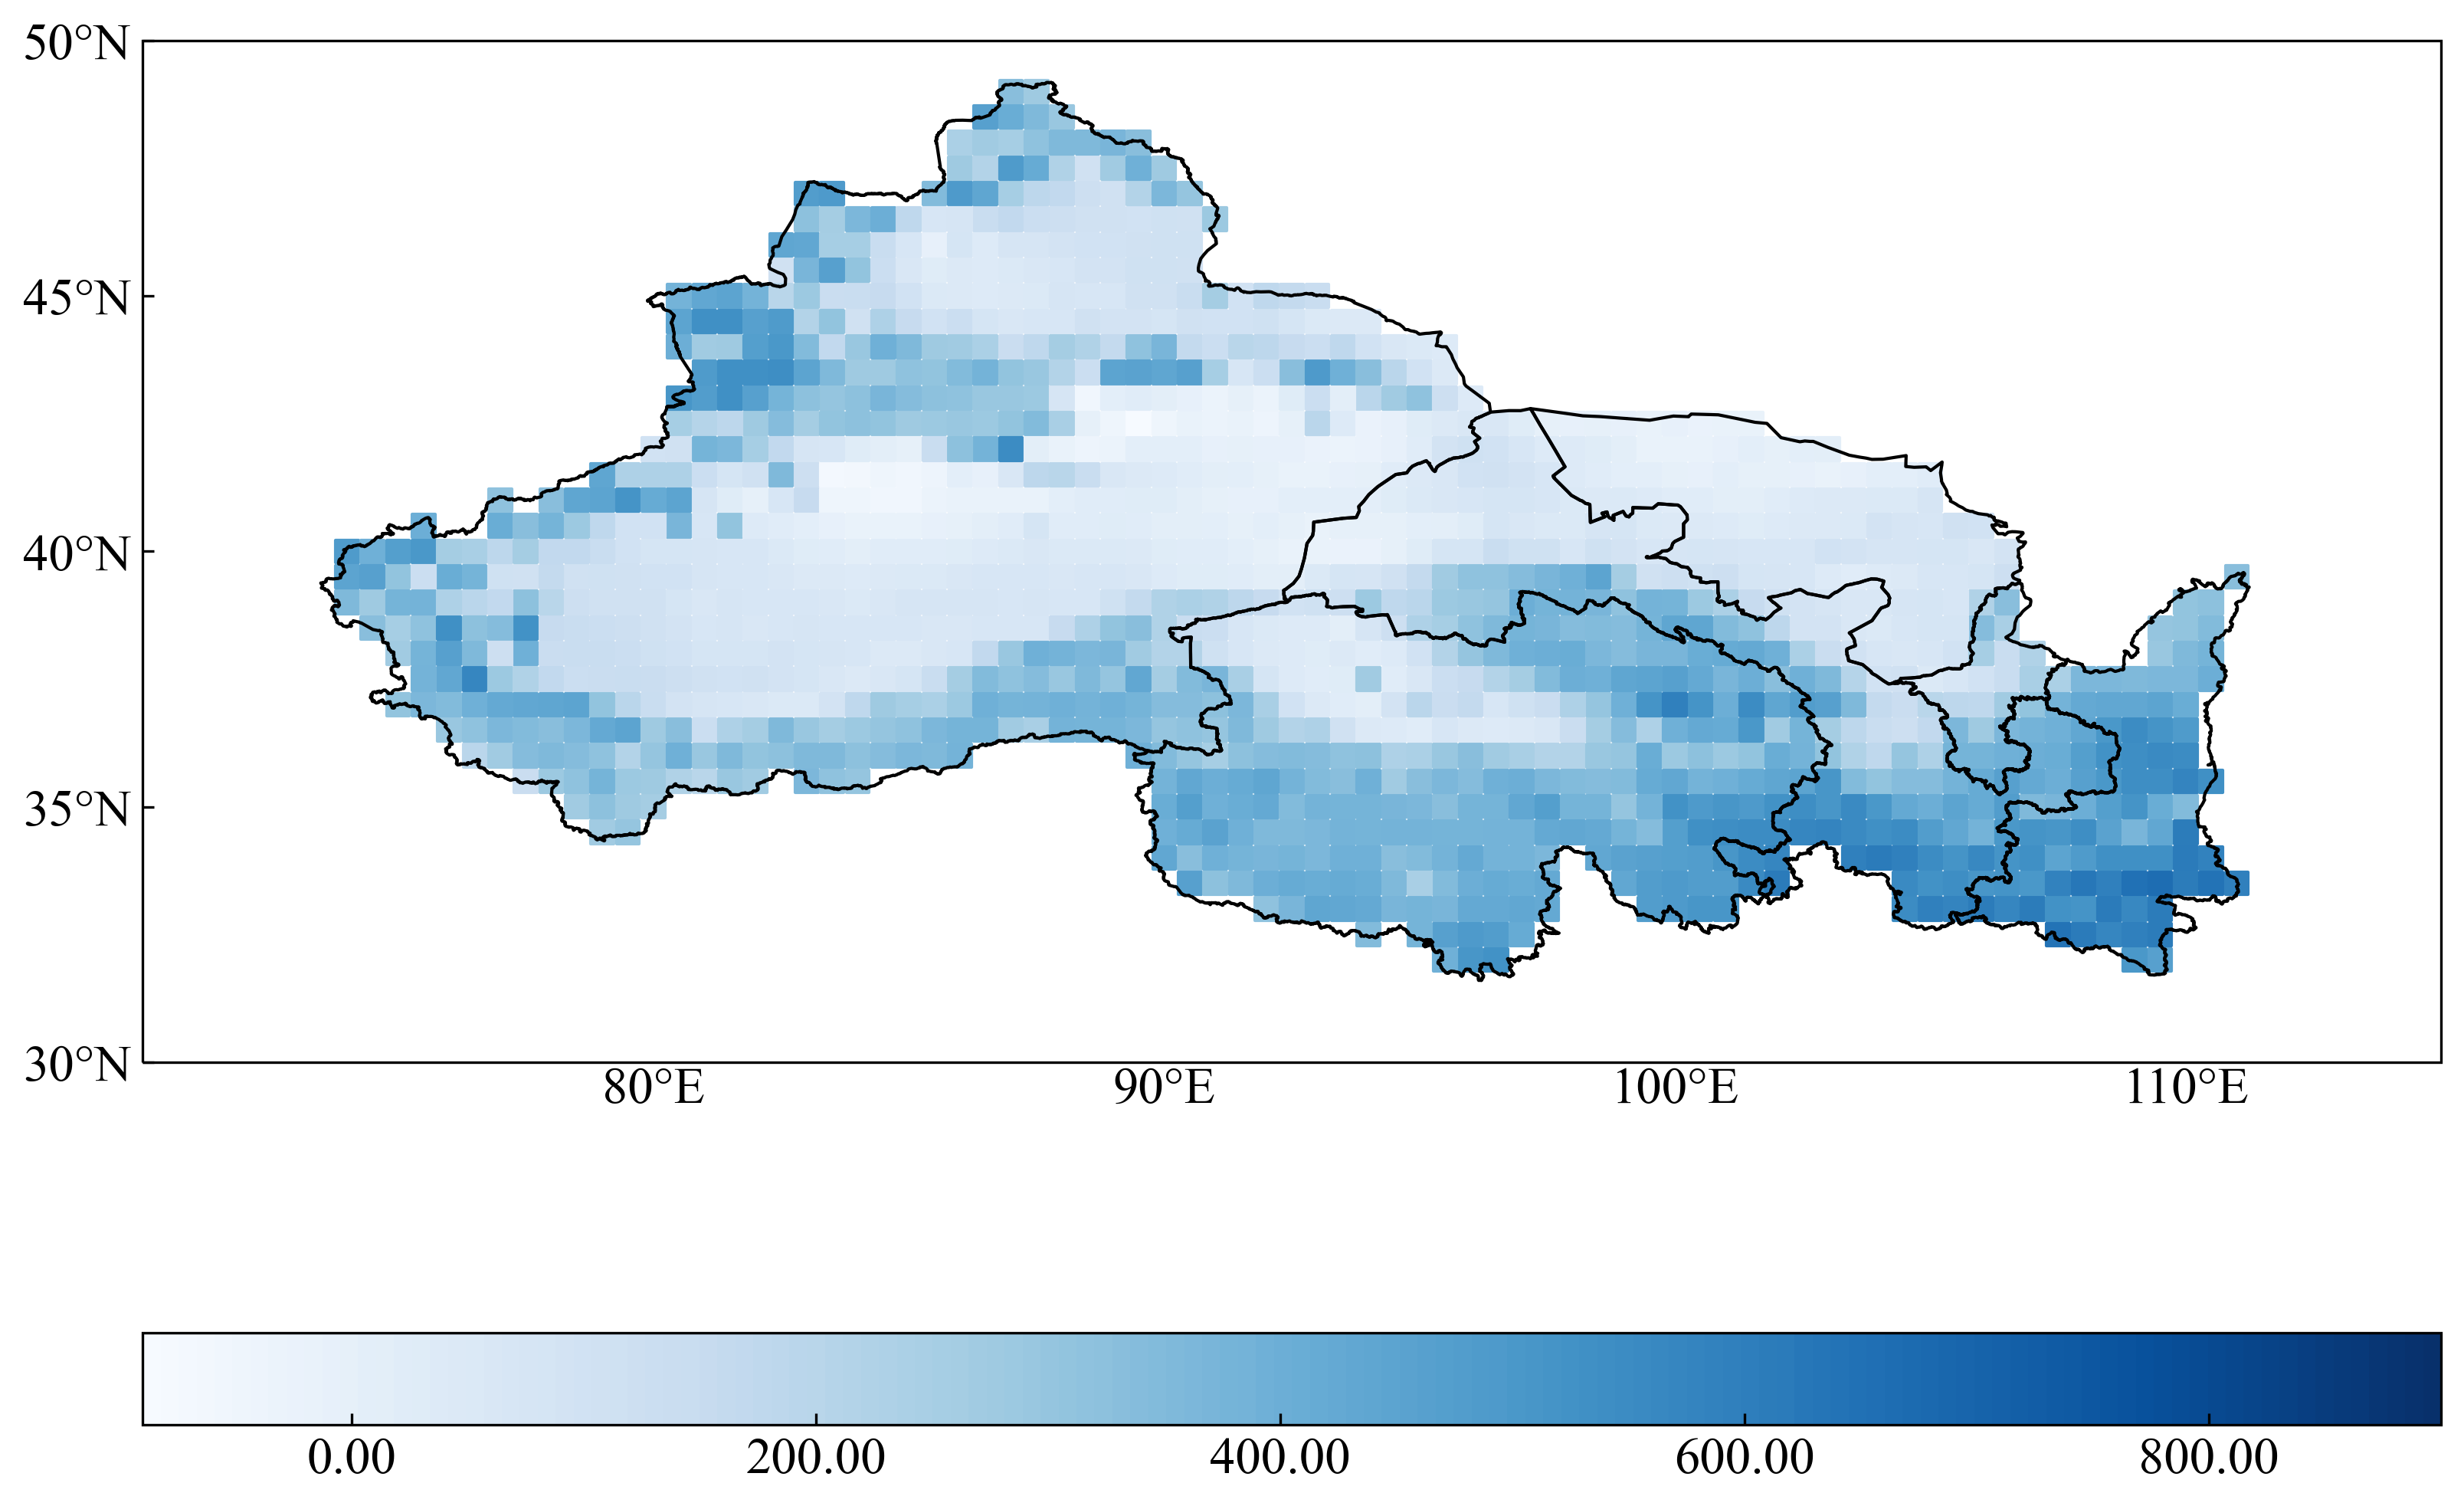

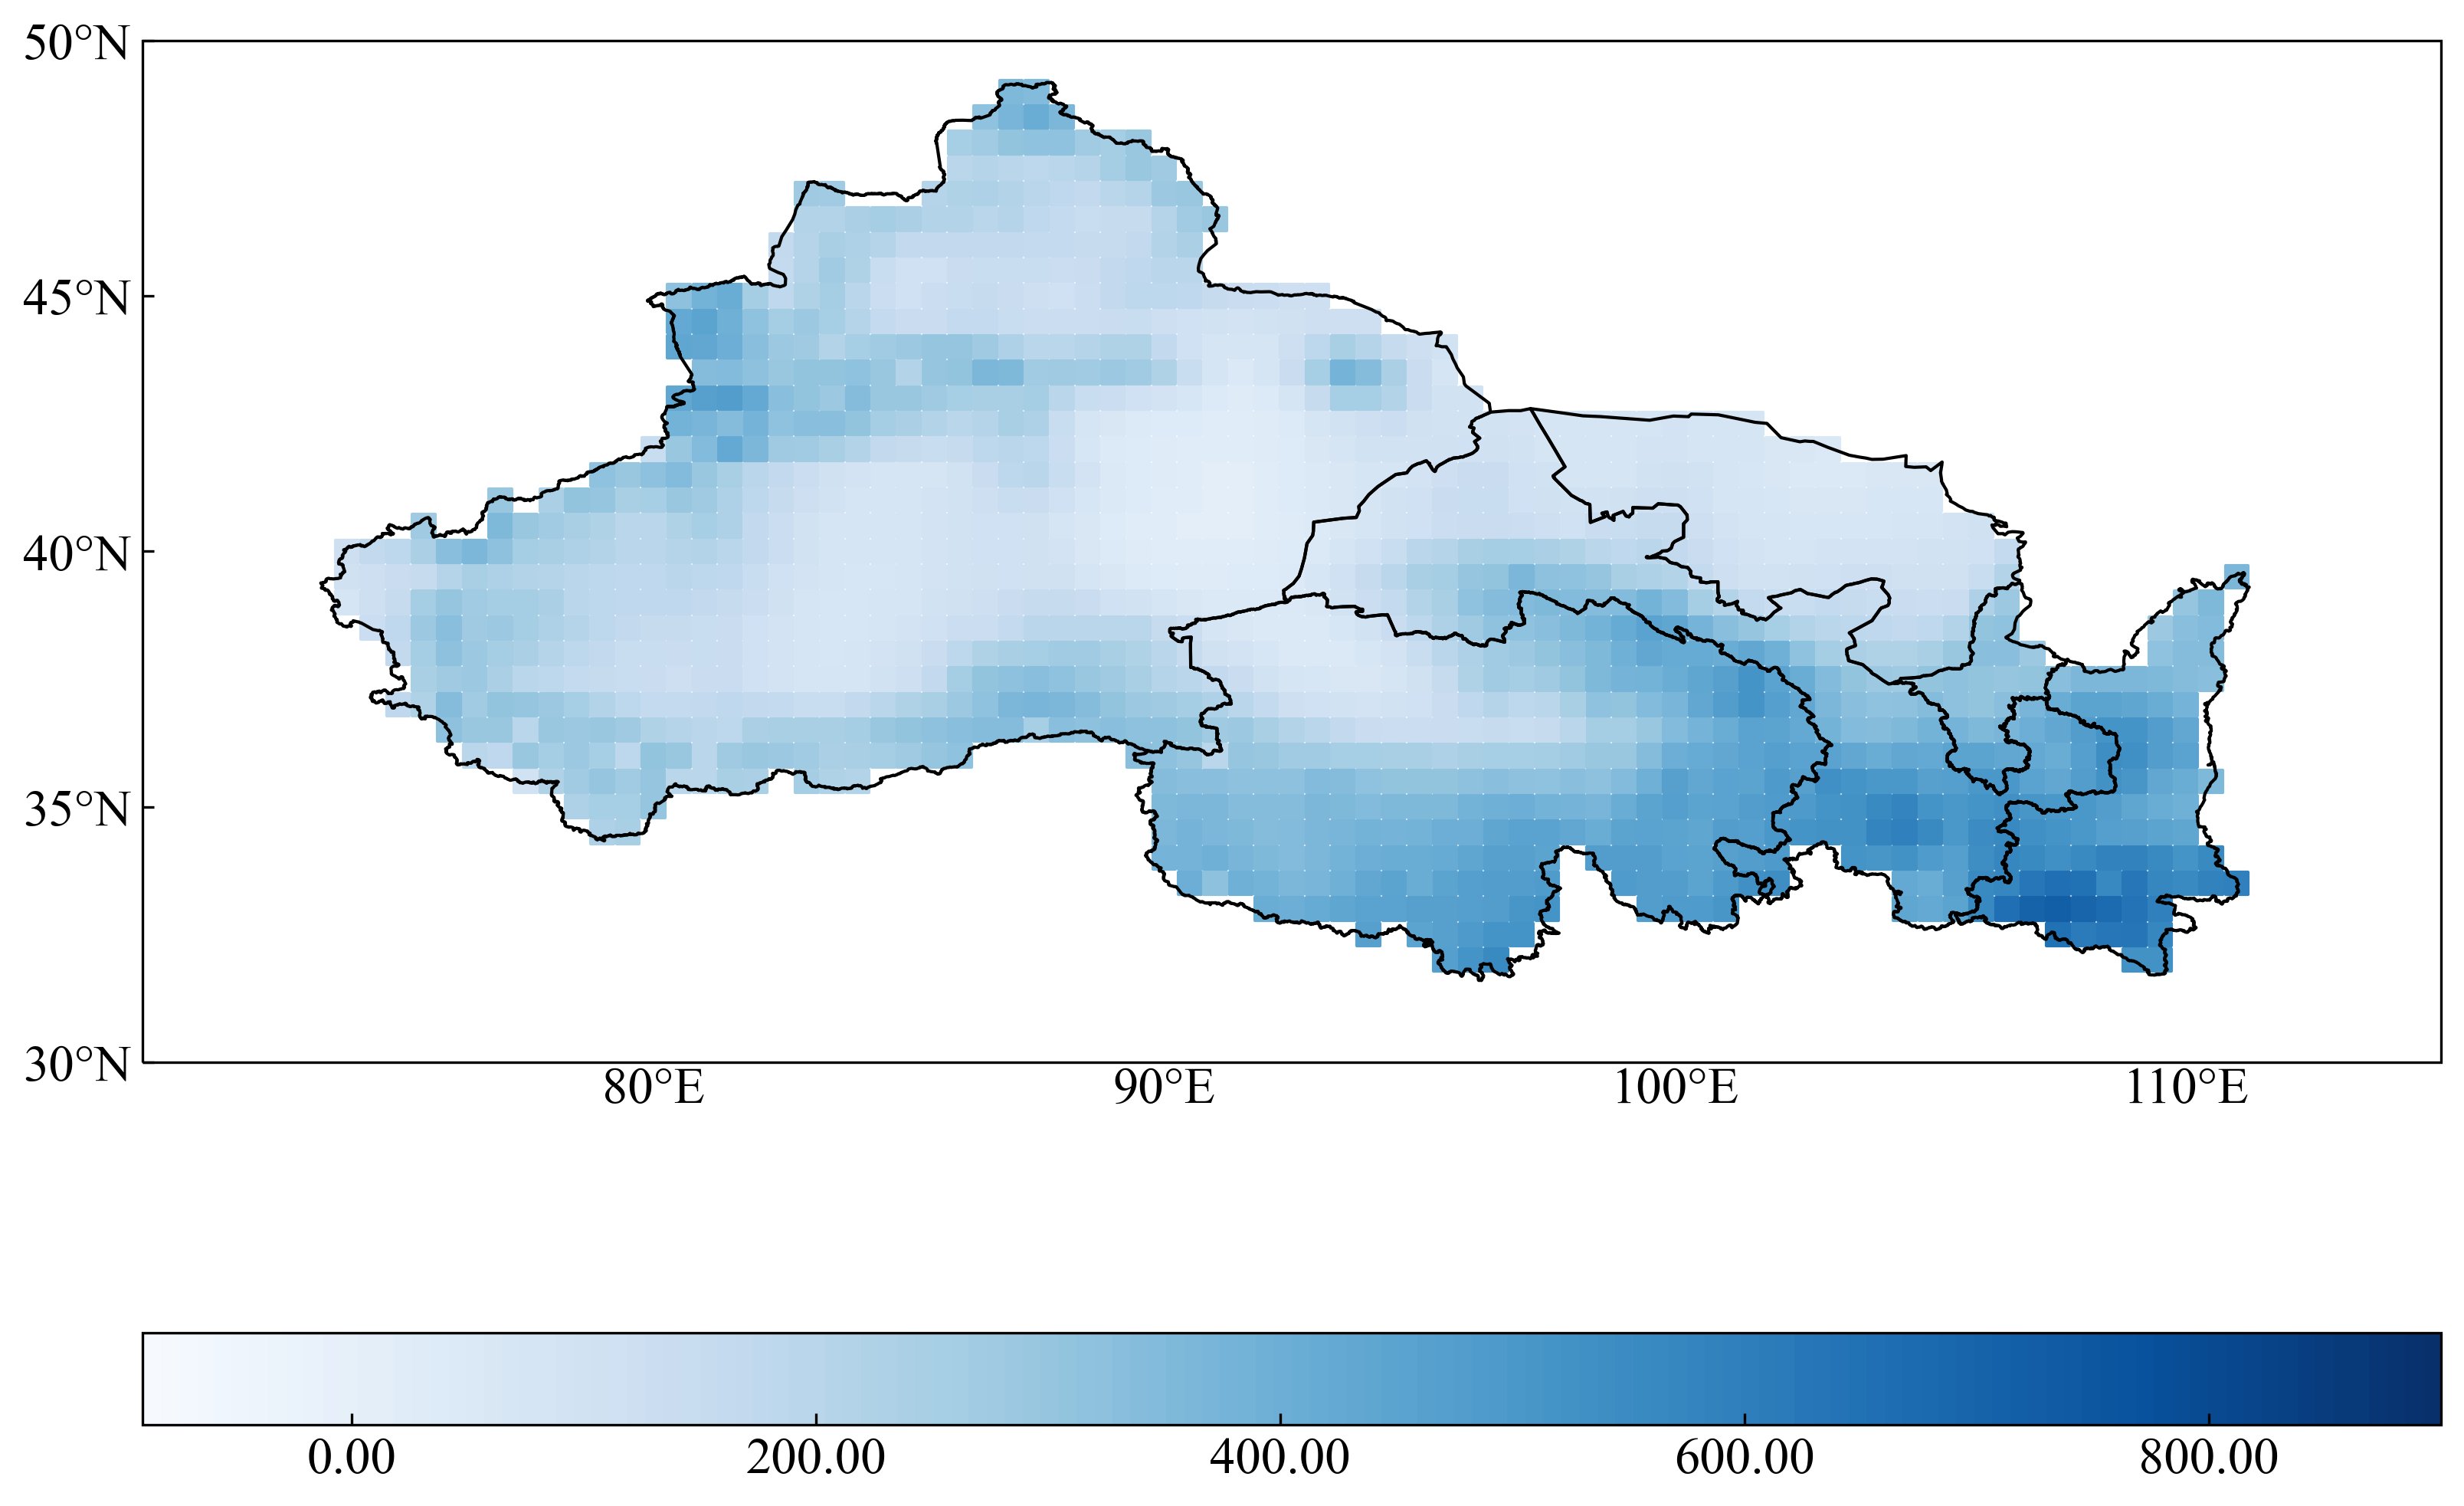

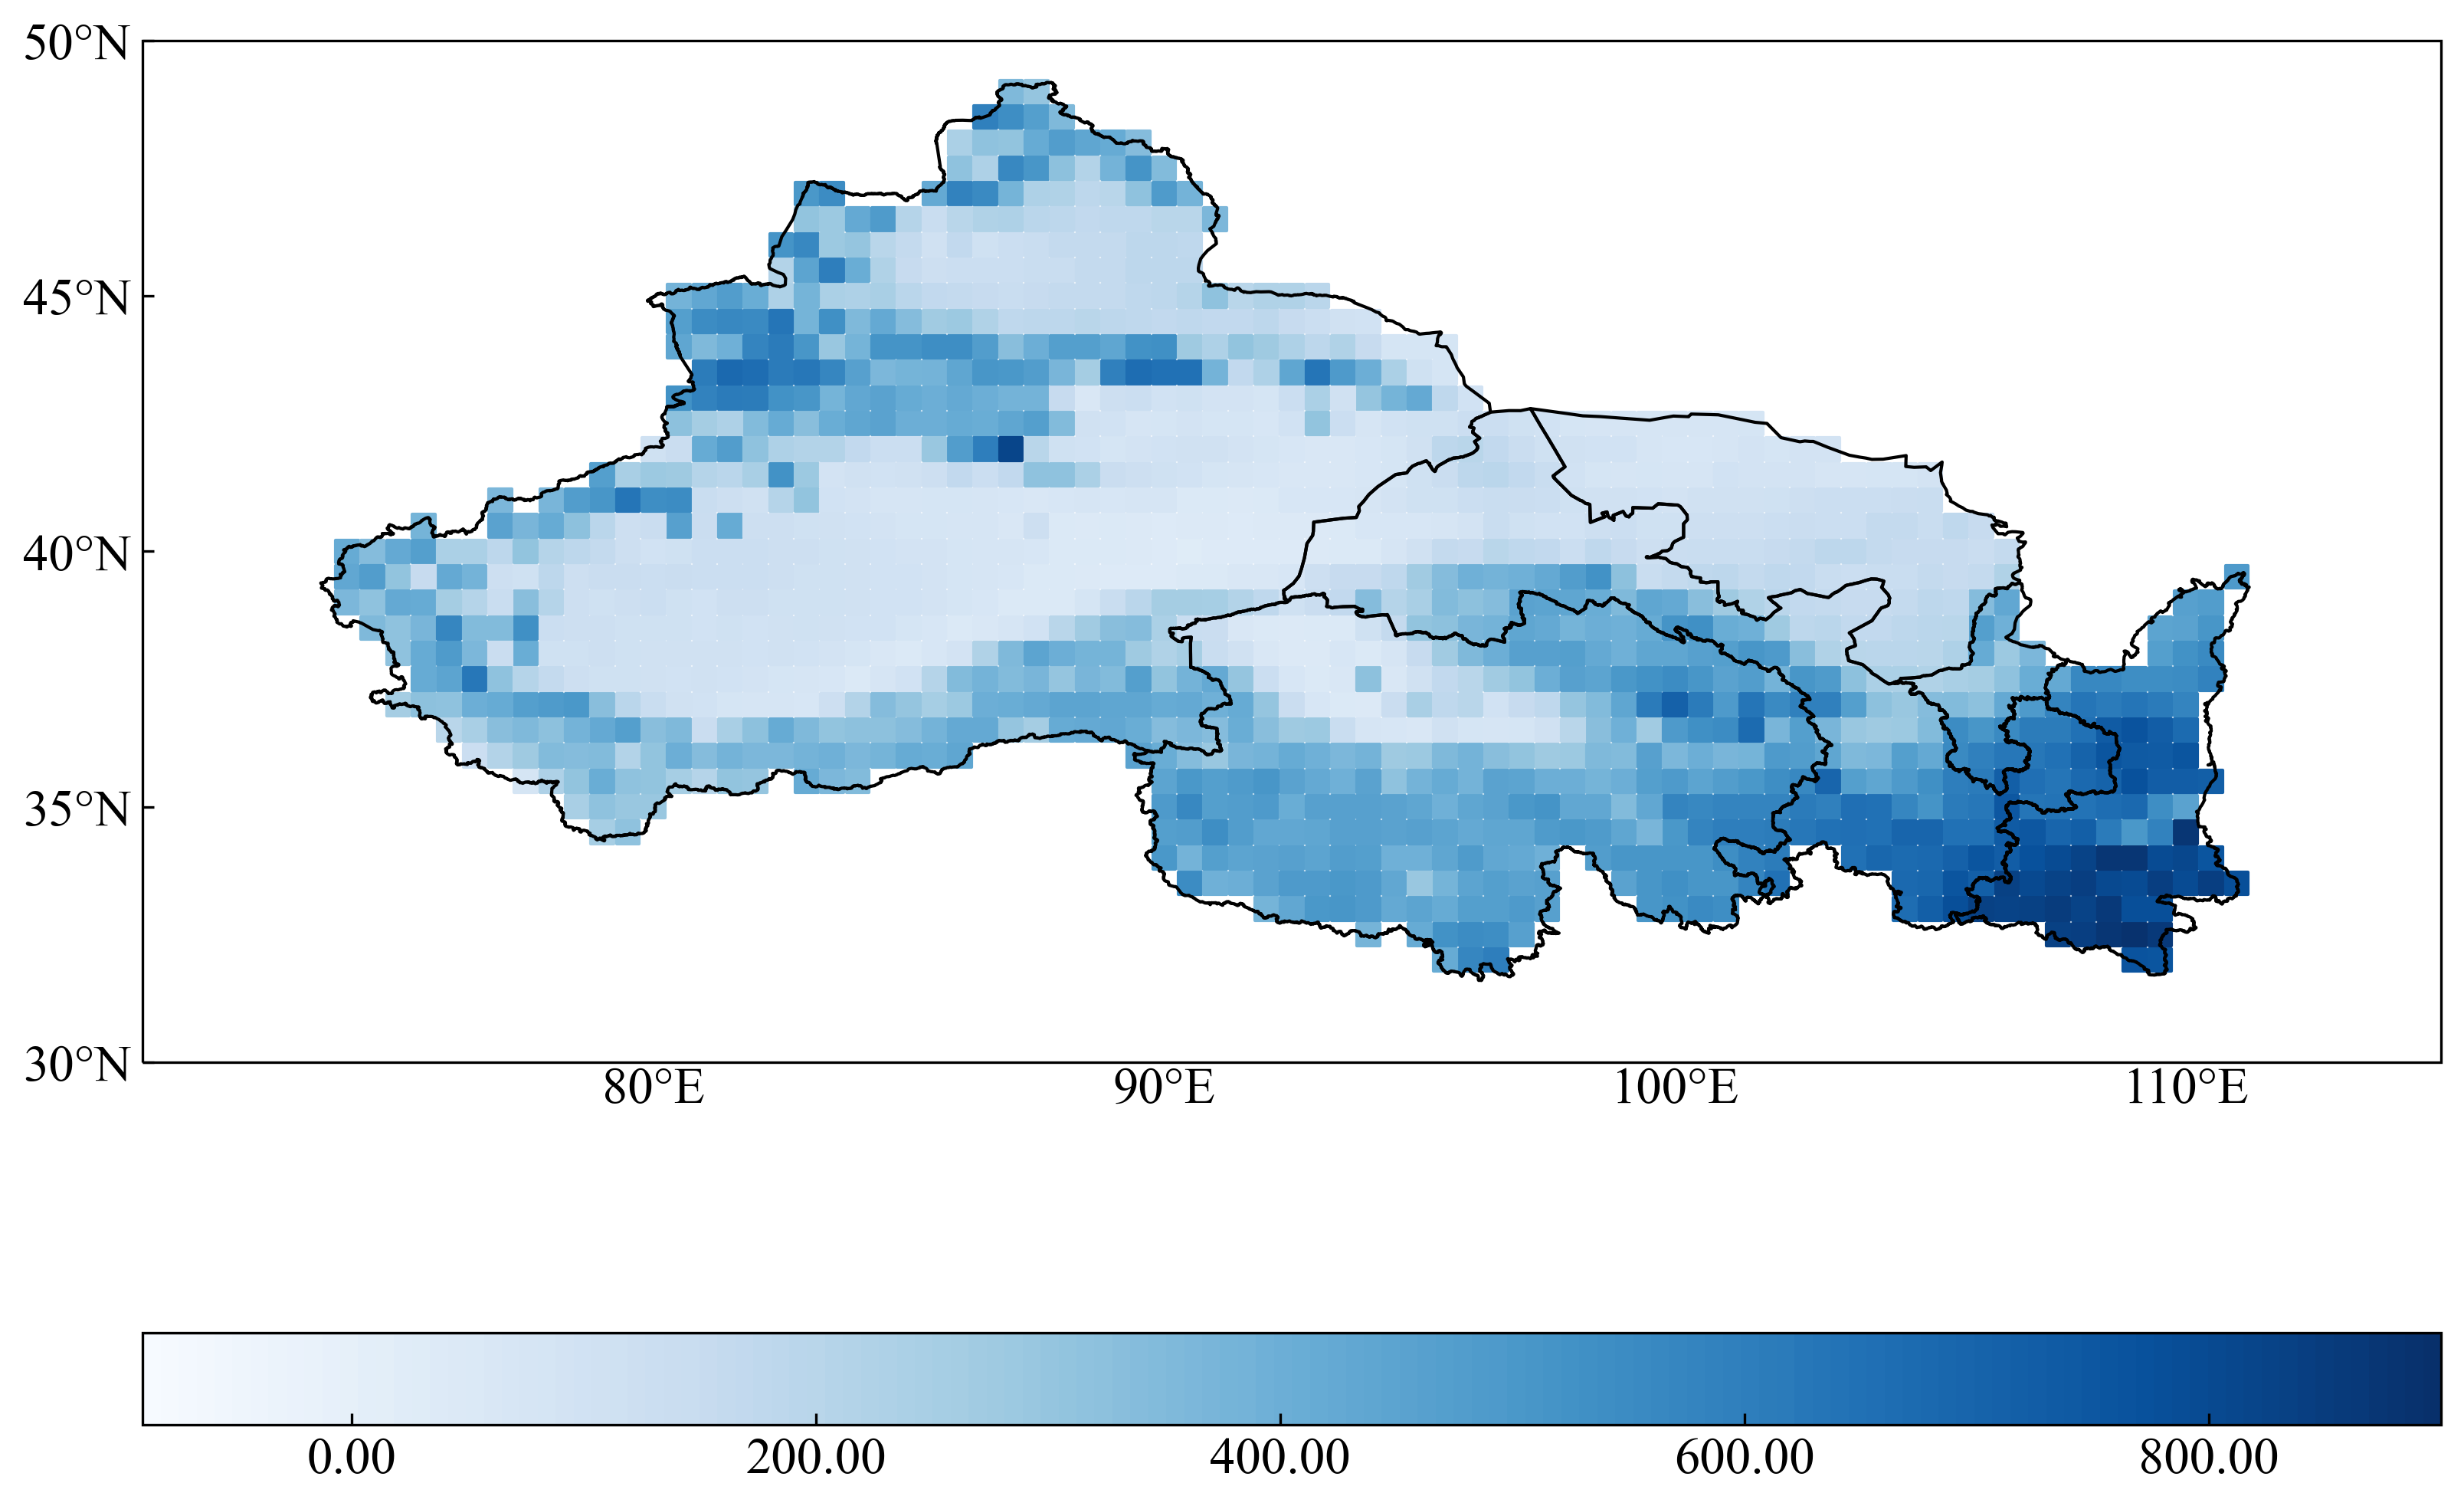

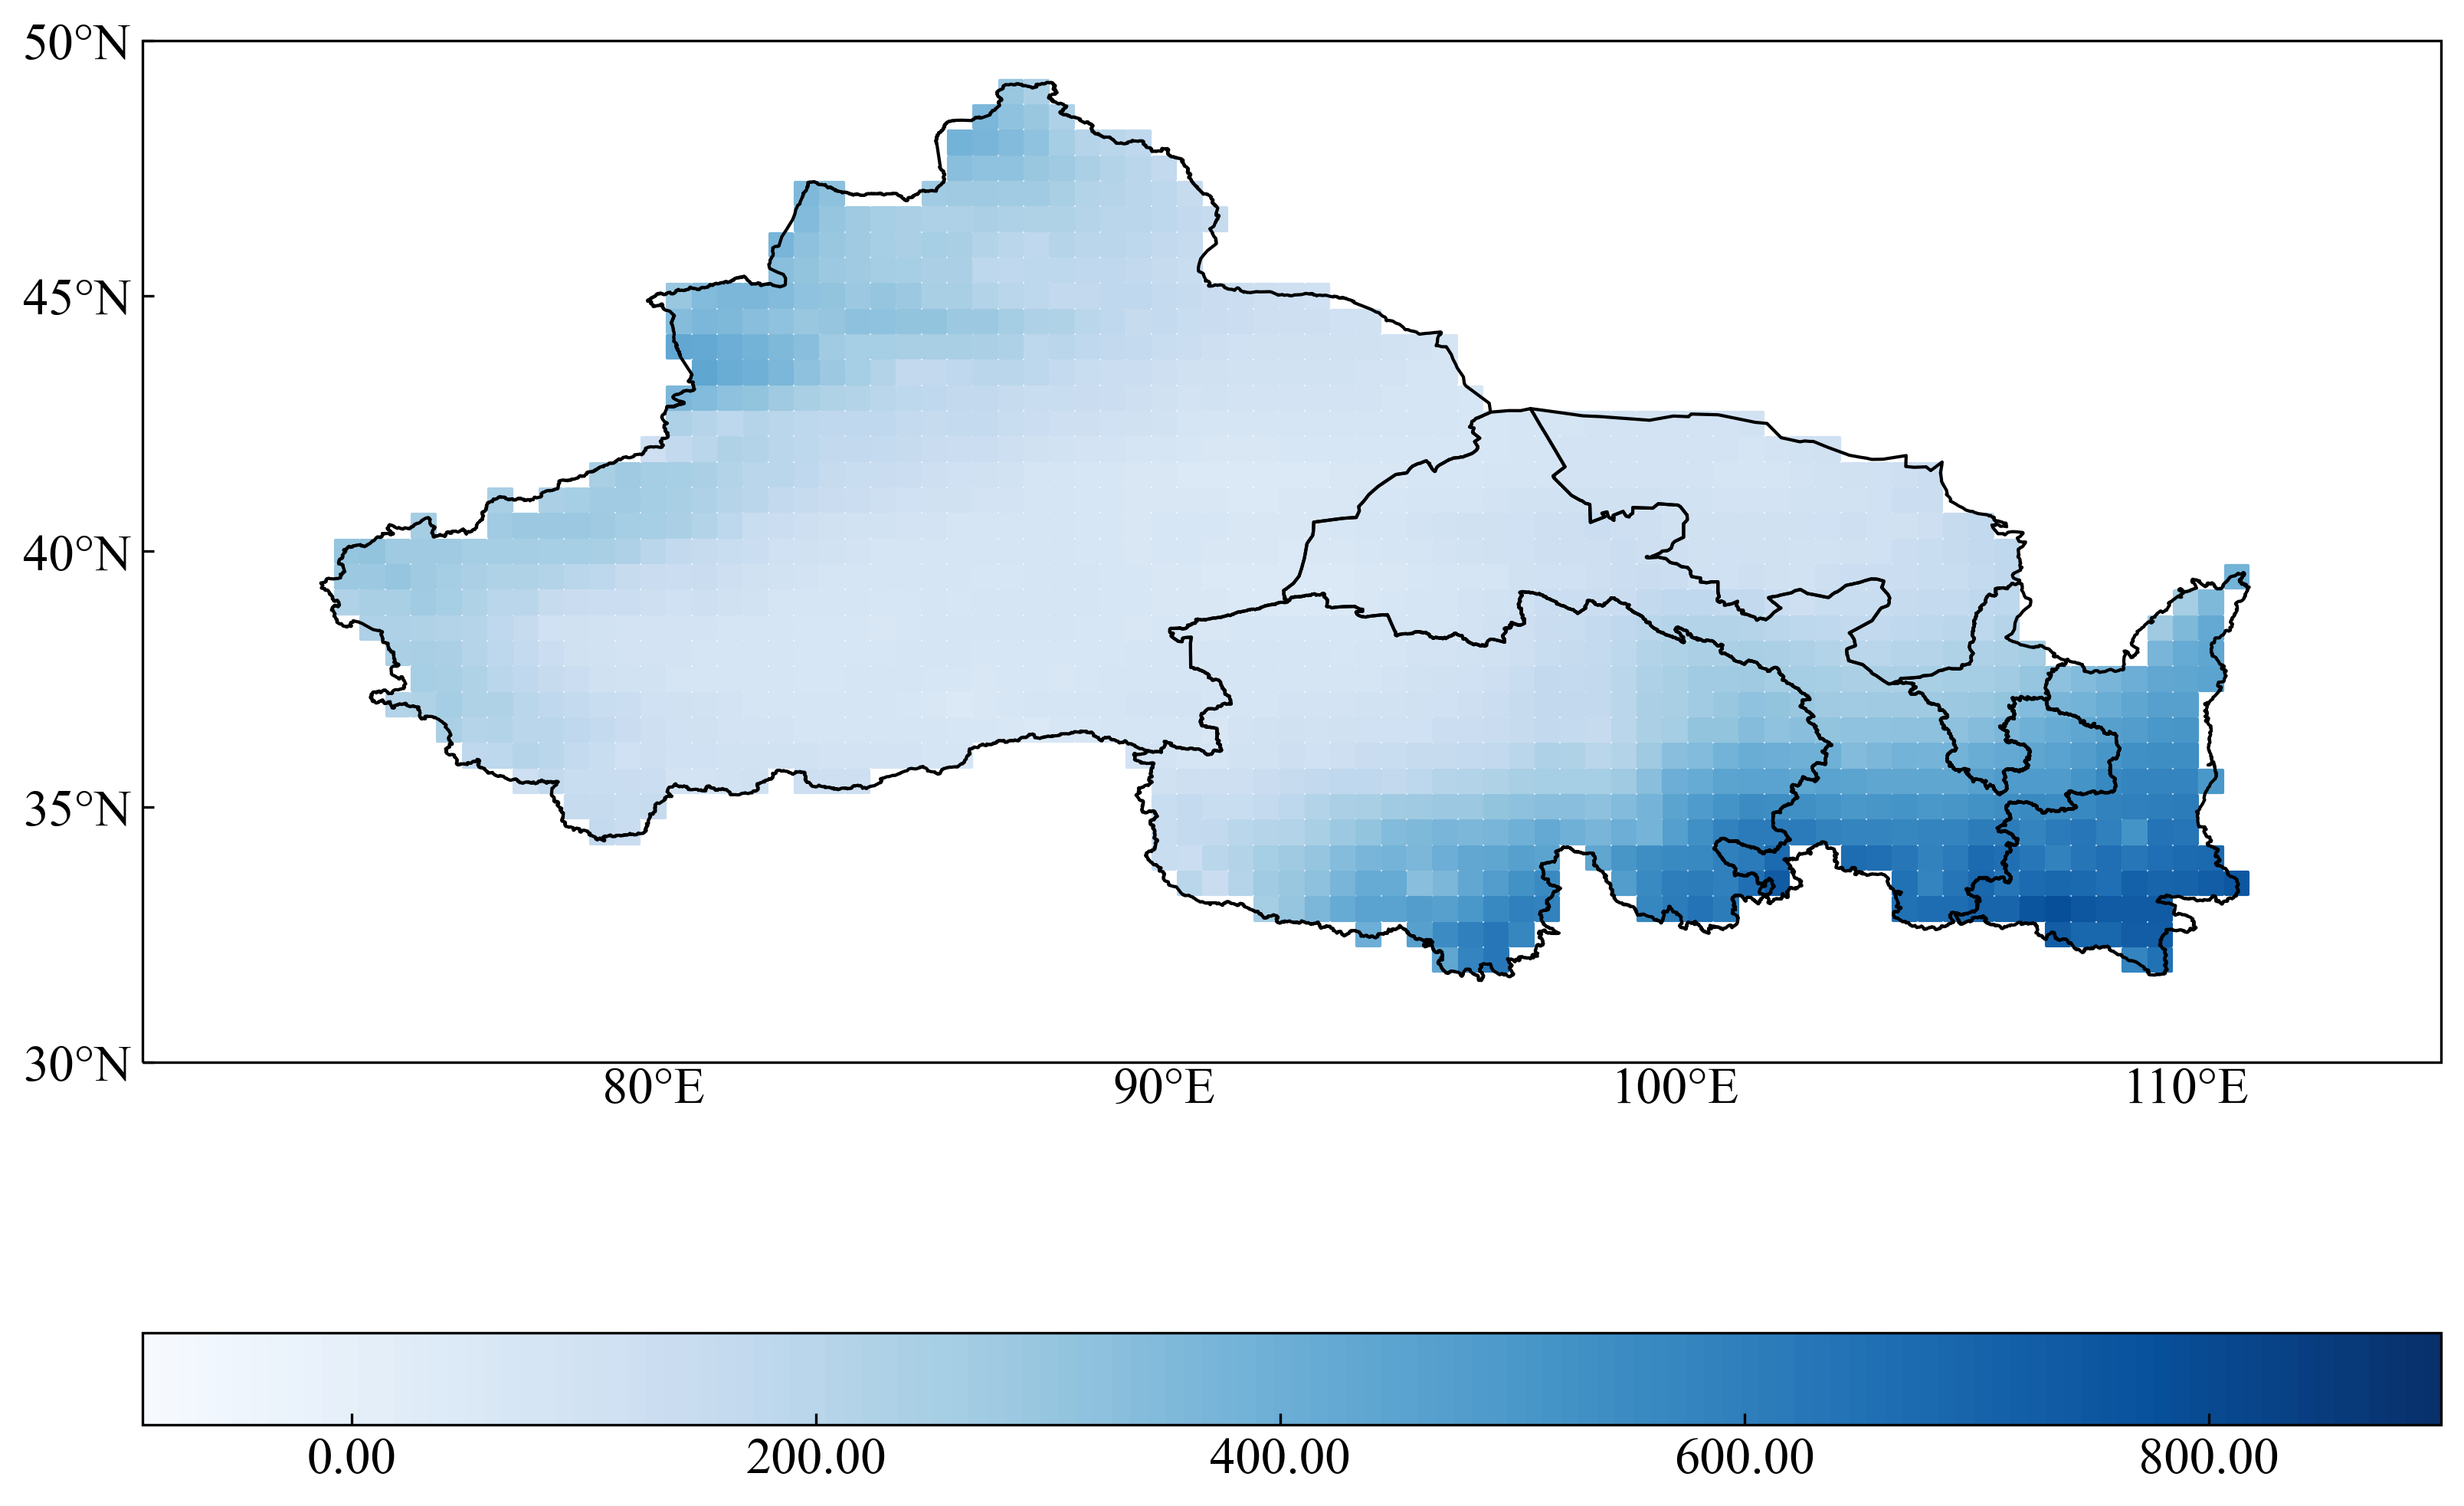

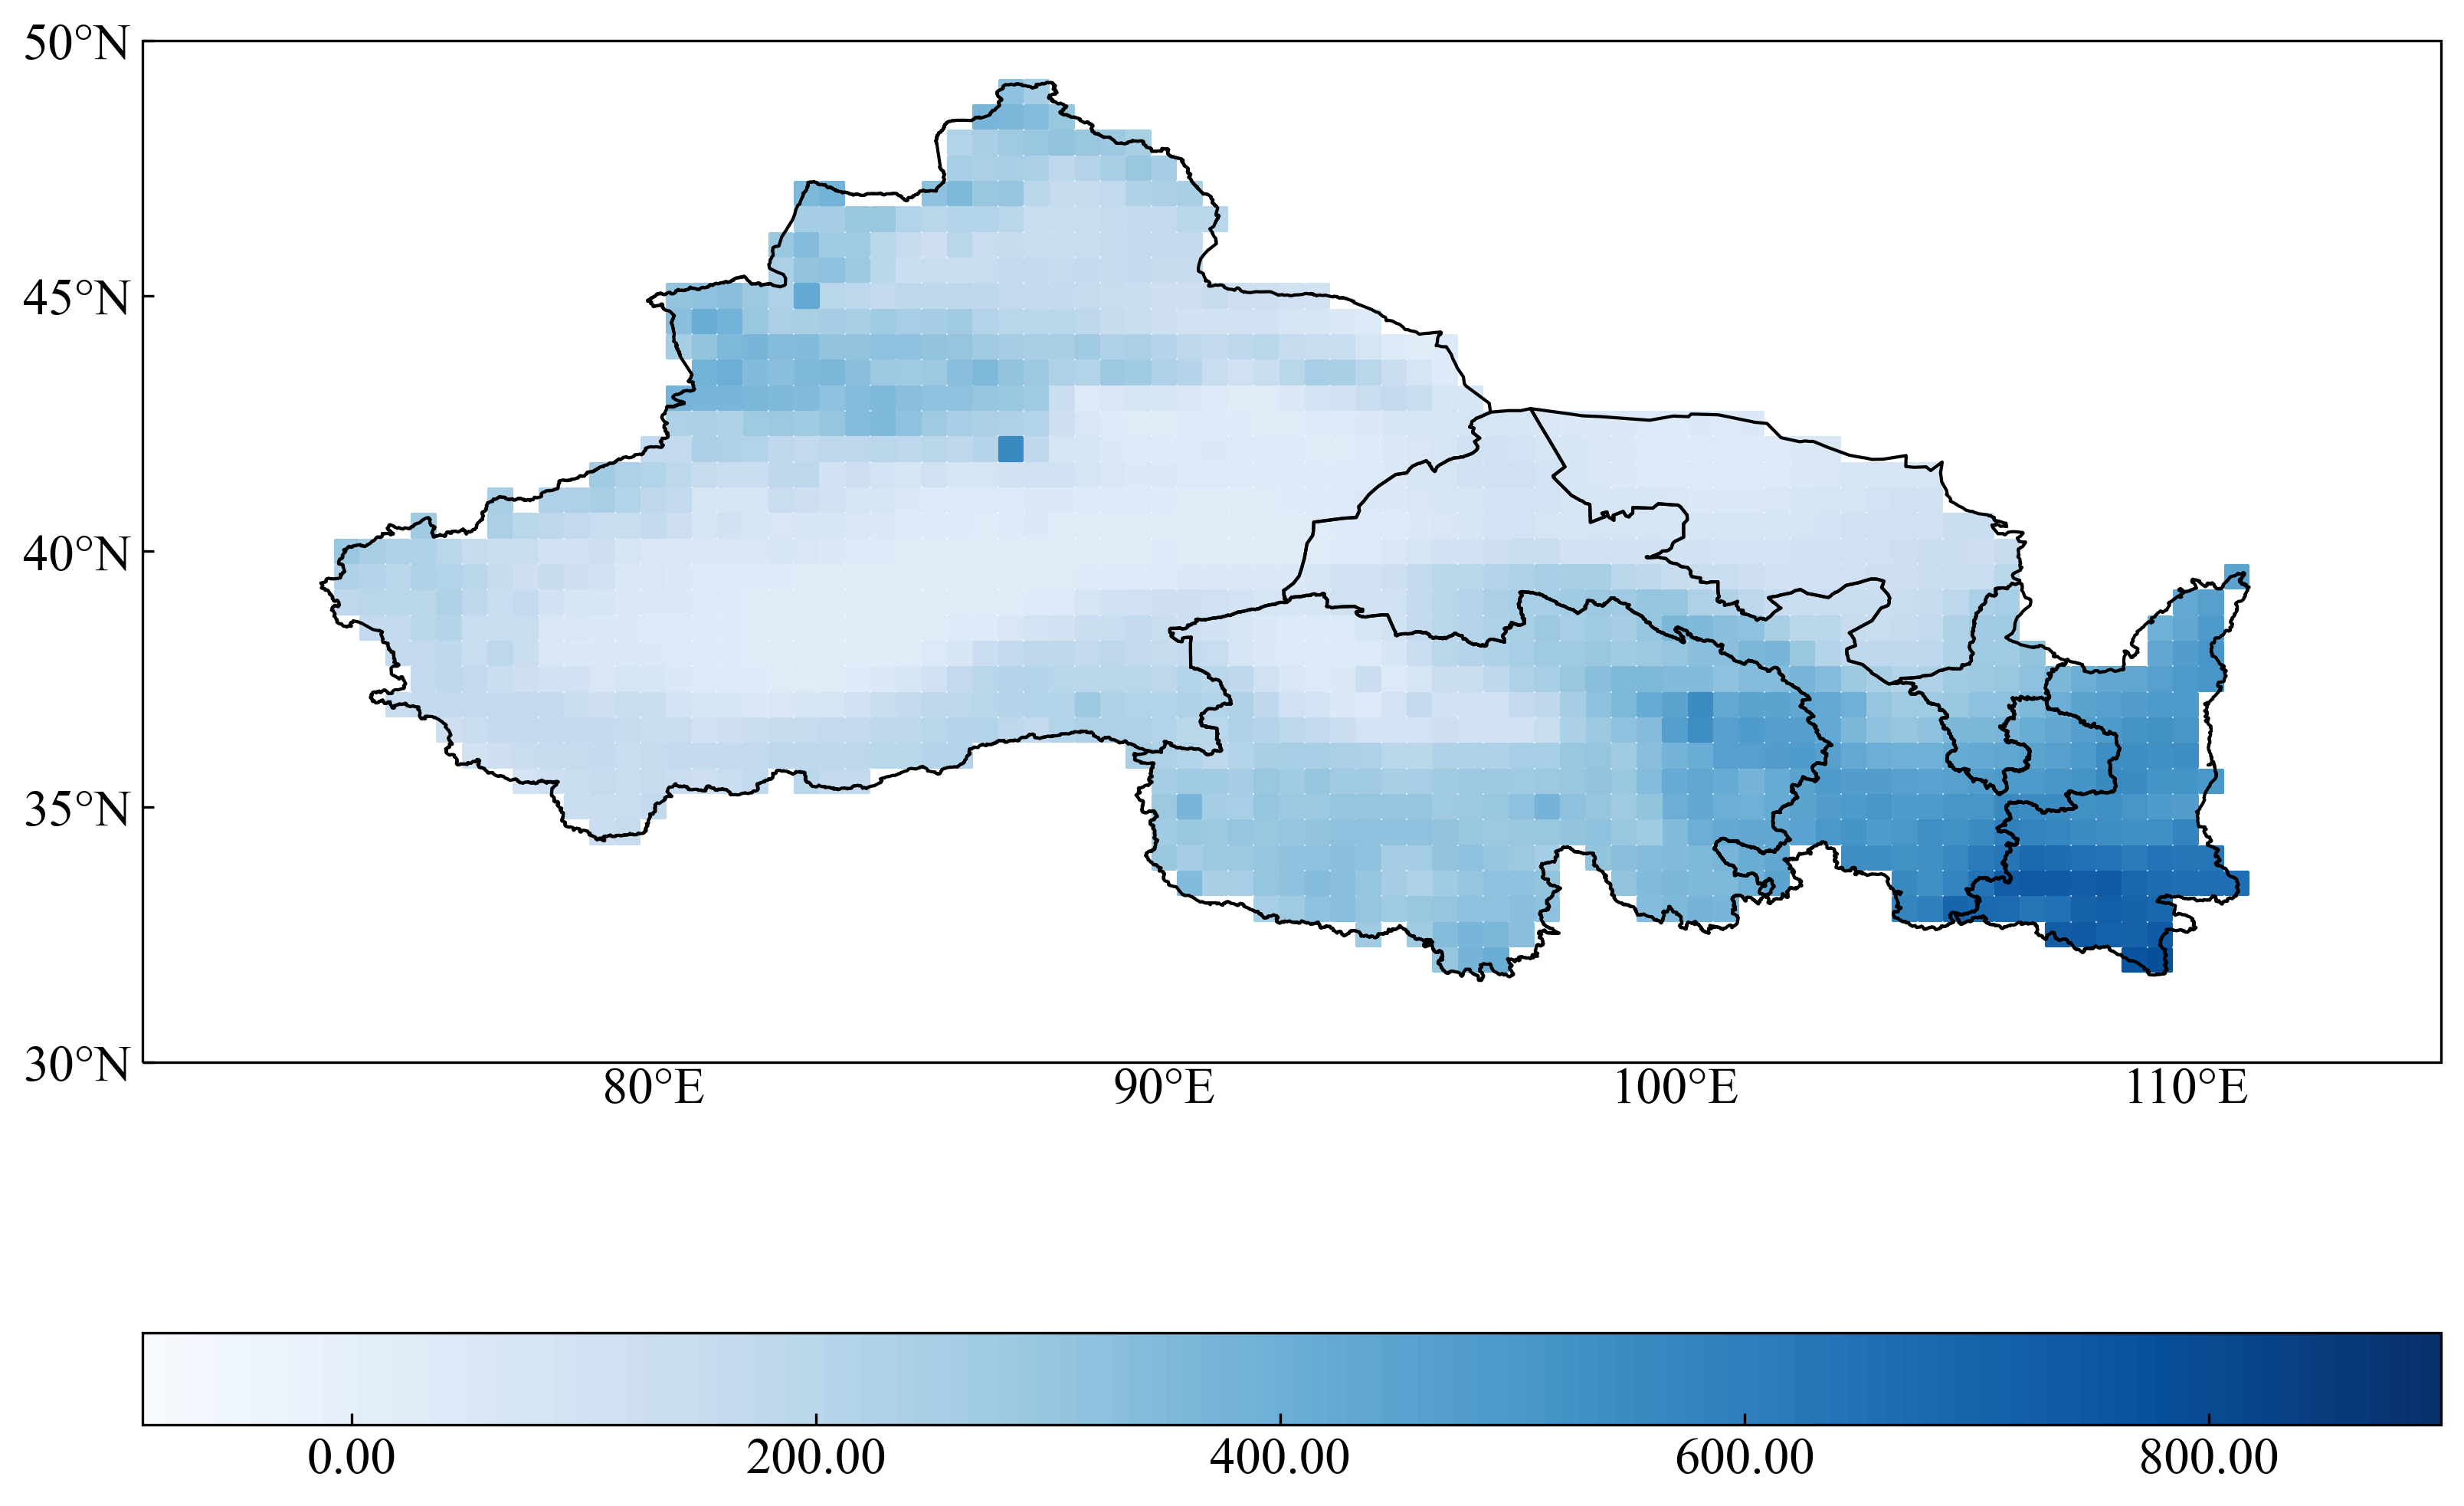

In [16]:
graph_yellow_river_q(DATA['Lon'],DATA['Lat'],DATA['slope1'],'a')
graph_yellow_river_q(DATA['Lon'],DATA['Lat'],DATA['slope2'],'a')
graph_yellow_river_q(DATA['Lon'],DATA['Lat'],DATA['slope3'],'a')
graph_yellow_river_q(DATA['Lon'],DATA['Lat'],DATA['slope4'],'a')
graph_yellow_river_q(DATA['Lon'],DATA['Lat'],DATA['slope5'],'a')

## wet season

In [23]:
lon = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['lon']
lat = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['lat']
slope1 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['A-T (mm)']
slope2 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['ET-TPDC (mm)']
slope3 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['ET-ERA5 (mm)']
slope4 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['ET-GLDAS (mm)']
slope5 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=1)['ET-GLEAM (mm)']

DATA = pd.DataFrame()
DATA['Lon'] = lon
DATA['Lat'] = lat
DATA['slope1'] = slope1
DATA['slope2'] = slope2
DATA['slope3'] = slope3
DATA['slope4'] = slope4
DATA['slope5'] = slope5

In [24]:
def graph_yellow_river_wet(lon,lat,data,fig_a): # txt site-data # judge whether fig a or b 
    ## graph
    import cartopy.crs as ccrs
    import matplotlib as mpl
    import cmaps
    from matplotlib import rcParams
    import matplotlib.pyplot as plt
    import cartopy.io.shapereader as shpreader
    from cartopy.io.shapereader import Reader, natural_earth
    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

    config = {
        'font.family':'Times New Roman',
        'font.size':16,
        'axes.unicode_minus':False

    }
    rcParams.update(config)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # chinese_font = FontProperties(fname='/mnt/e/Research_life/cyq/微软雅黑.ttf')

    # data = DATA['slope1']
    fig = plt.figure(figsize=(20,20), dpi = 300)
    proj = ccrs.PlateCarree()

    # 使图一colorbar映射在同一水平
    # norm1 = mpl.colors.Normalize(vmin=-abs(np.nanmax(slope1)), vmax=abs(np.nanmax(slope1)))

    levels = [0,0.002,0.004]
    ## graph one
    ax1 = fig.add_axes([0.1, 0.9, 0.5, 0.5],projection = proj)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.2, color='k', alpha=0.5, linestyle='--')
    
    if fig_a=='a':
        # ax1.set_title('(a)',loc='left',fontsize=26)
        gl.ylabels_right = False
        gl.xlabels_top = False
        gl.ylabels_left = False
    else:
        # ax1.set_title('(b)',loc='right',fontsize=26)
        gl.ylabels_left = False
        gl.xlabels_top = False
        gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    china = shpreader.Reader('/mnt/e/Research_life/ArcGIS/西北片区省界/西北片区省界/更改坐标系后/1.shp').geometries()
    ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
    ax1.set_extent([95,114,32,43], crs = ccrs.PlateCarree())
    # ax1.scatter(lon,lat, p,[np.nanmin(p),0.01,np.nanmax(p)], zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
    # # 设置norm.
    bins = [0.0001, 0.002, 0.004]
    nbin = len(bins) - 1
    norm = mcolors.BoundaryNorm(bins, nbin)
    norm = mpl.colors.Normalize(vmin=-70, vmax=700)
    # # 设置cmap.
    position1 = fig.add_axes([0.1, 0.96, 0.5, 0.02])
    color = ['#e0aea4','#c8cc89']
    cmap = mcolors.ListedColormap(color)
    cmap = cm.get_cmap(cmap,nbin)
    cmap.set_under('#9e1e71')
    cmap.set_over('#636e2e')
    c1 = ax1.scatter(lon,lat,s=50,marker='s',zorder=0,c=data,transform=ccrs.PlateCarree(),
                     cmap=cmaps.MPL_Blues,
                     norm=norm
                     )
    cbar=fig.colorbar(c1,cax=position1,orientation='horizontal',
                        # format='%.2f',
                    #   extend='both'
                      )
    ax1.set_yticks([30, 35, 40, 45, 50], crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter()
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.set_extent([70,115,30,50],crs = ccrs.PlateCarree()) 
    #添加色标，position定义色标位置，c1指定从c1填色图层取色，由于C3,C1的levles相同，所以色标一致，orientation设置色标为水平还是垂直，format设置色标标签格式
    # cbar.set_label('趋势变化',fontproperties=chinese_font,fontsize = 16)
    return

In [32]:
print(np.nanmin(DATA))
print(np.nanmax(DATA))

-64.33279349075073
634.0588086195717


/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


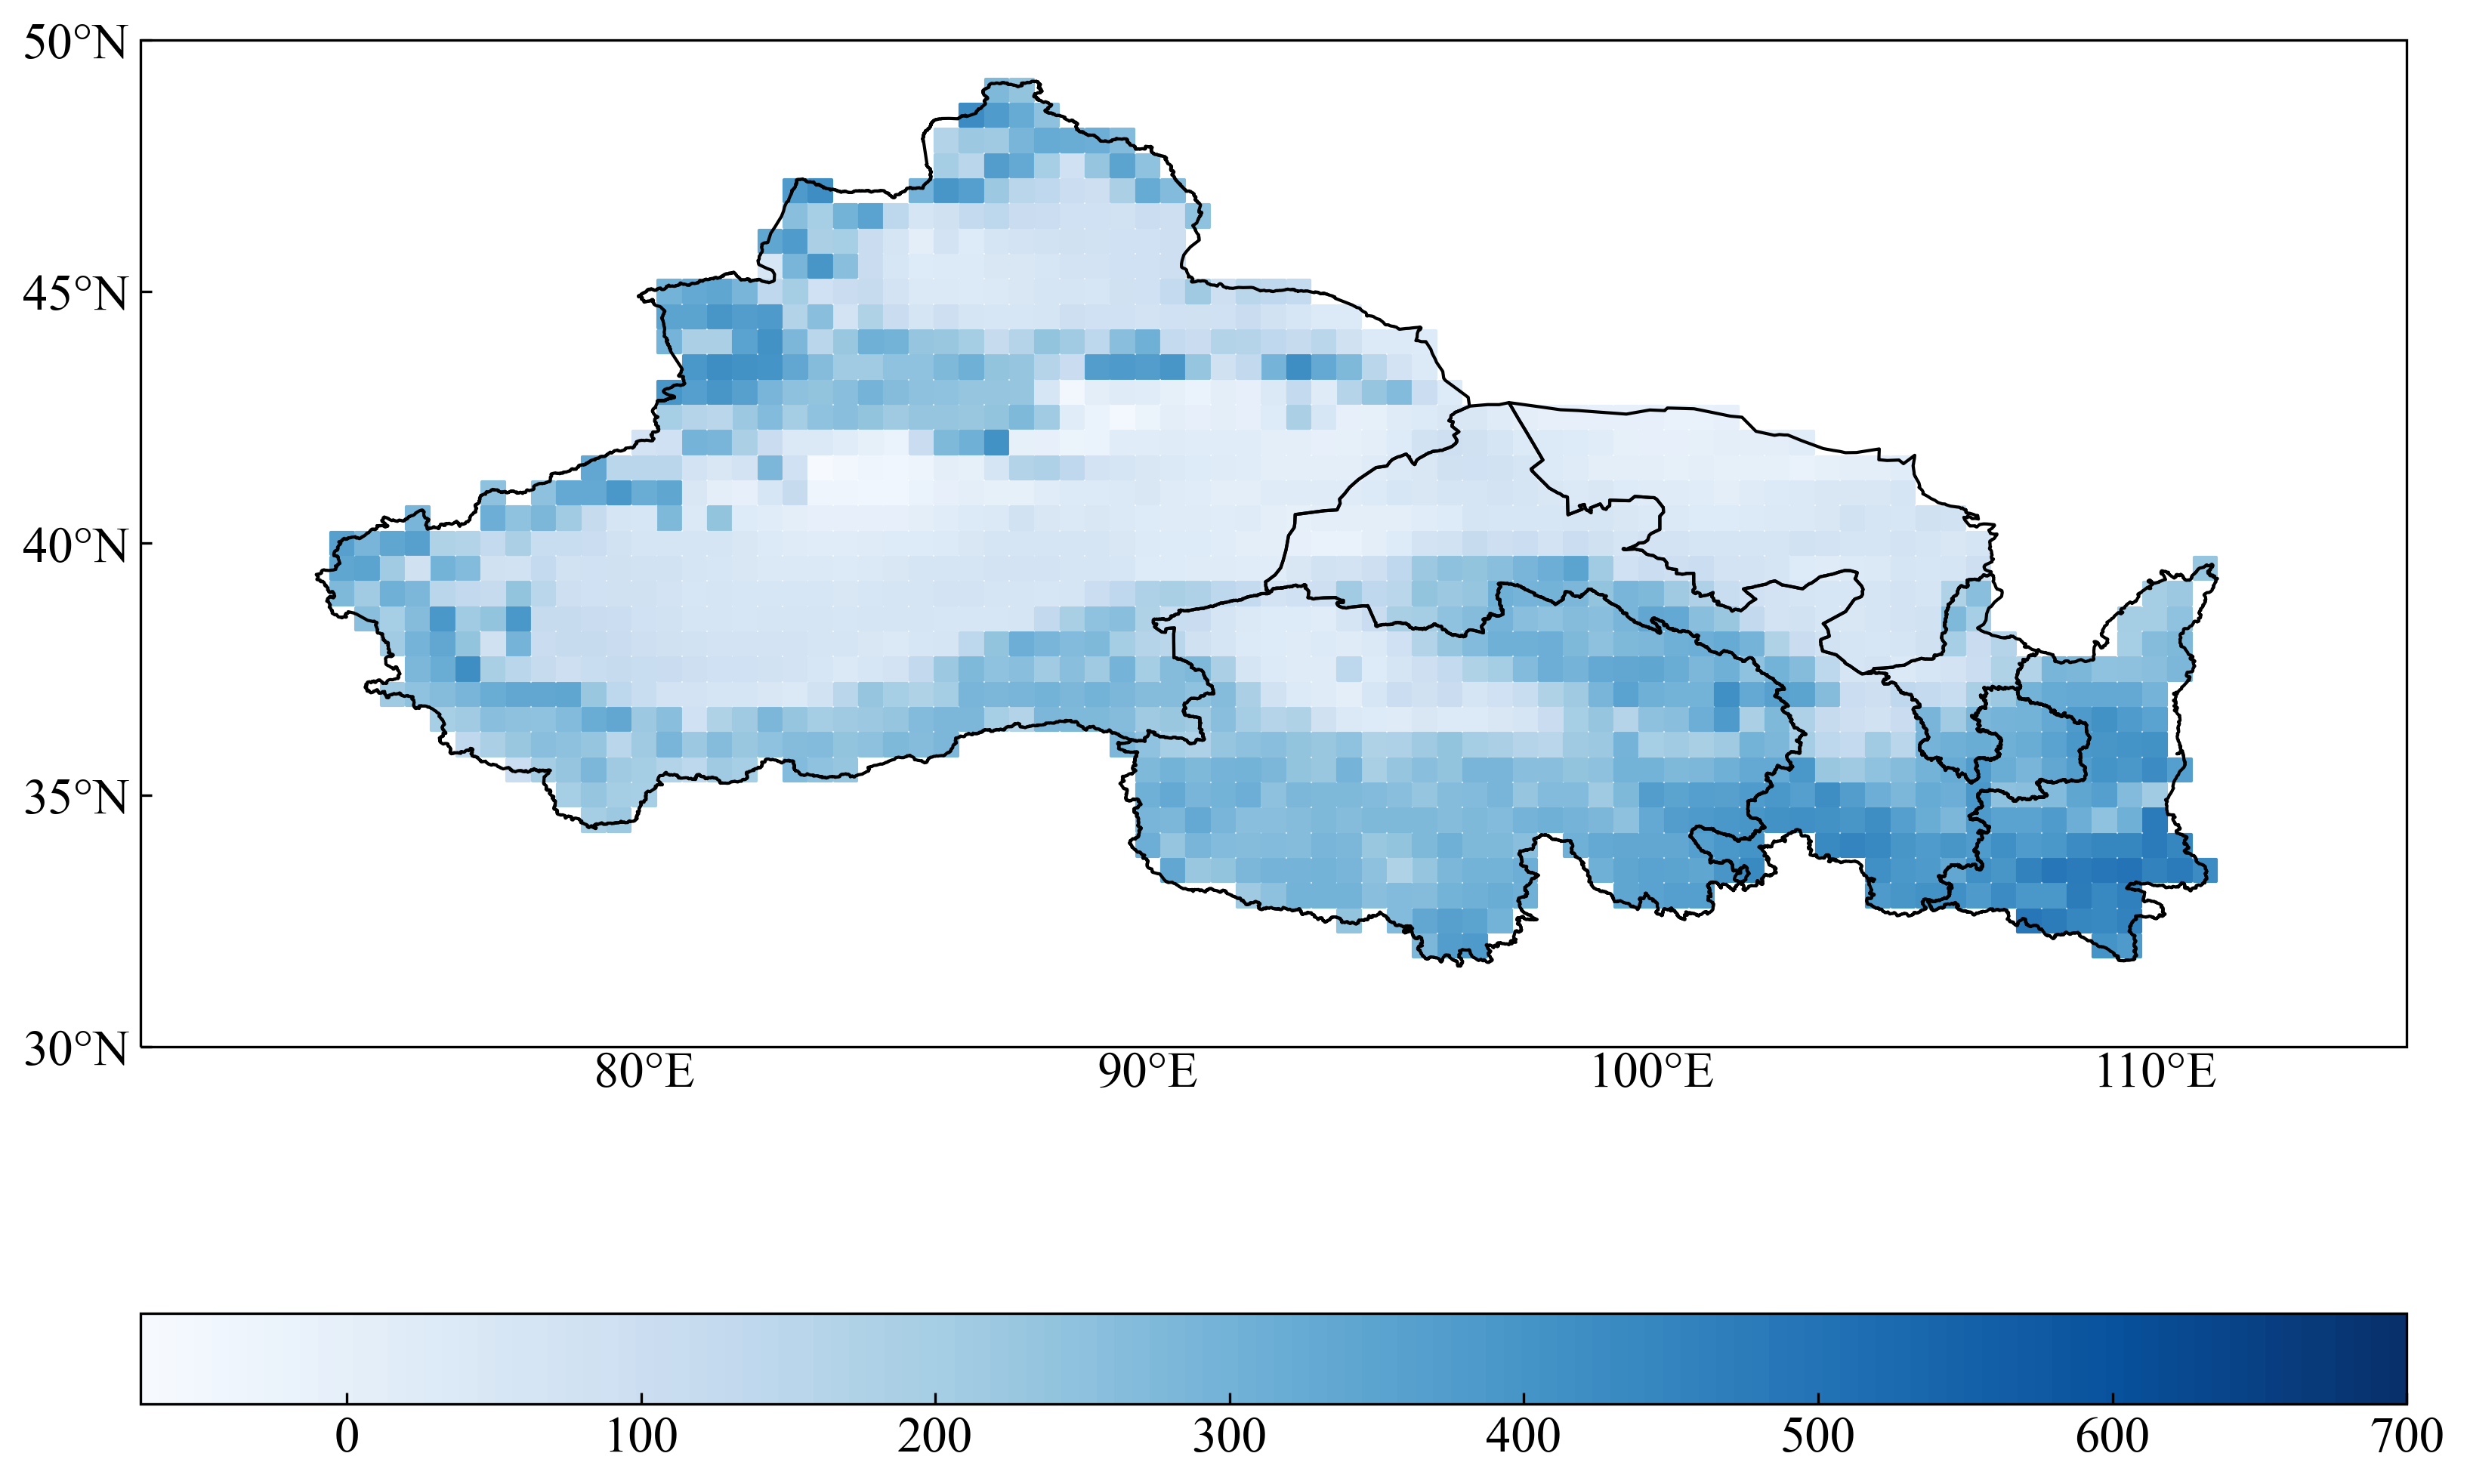

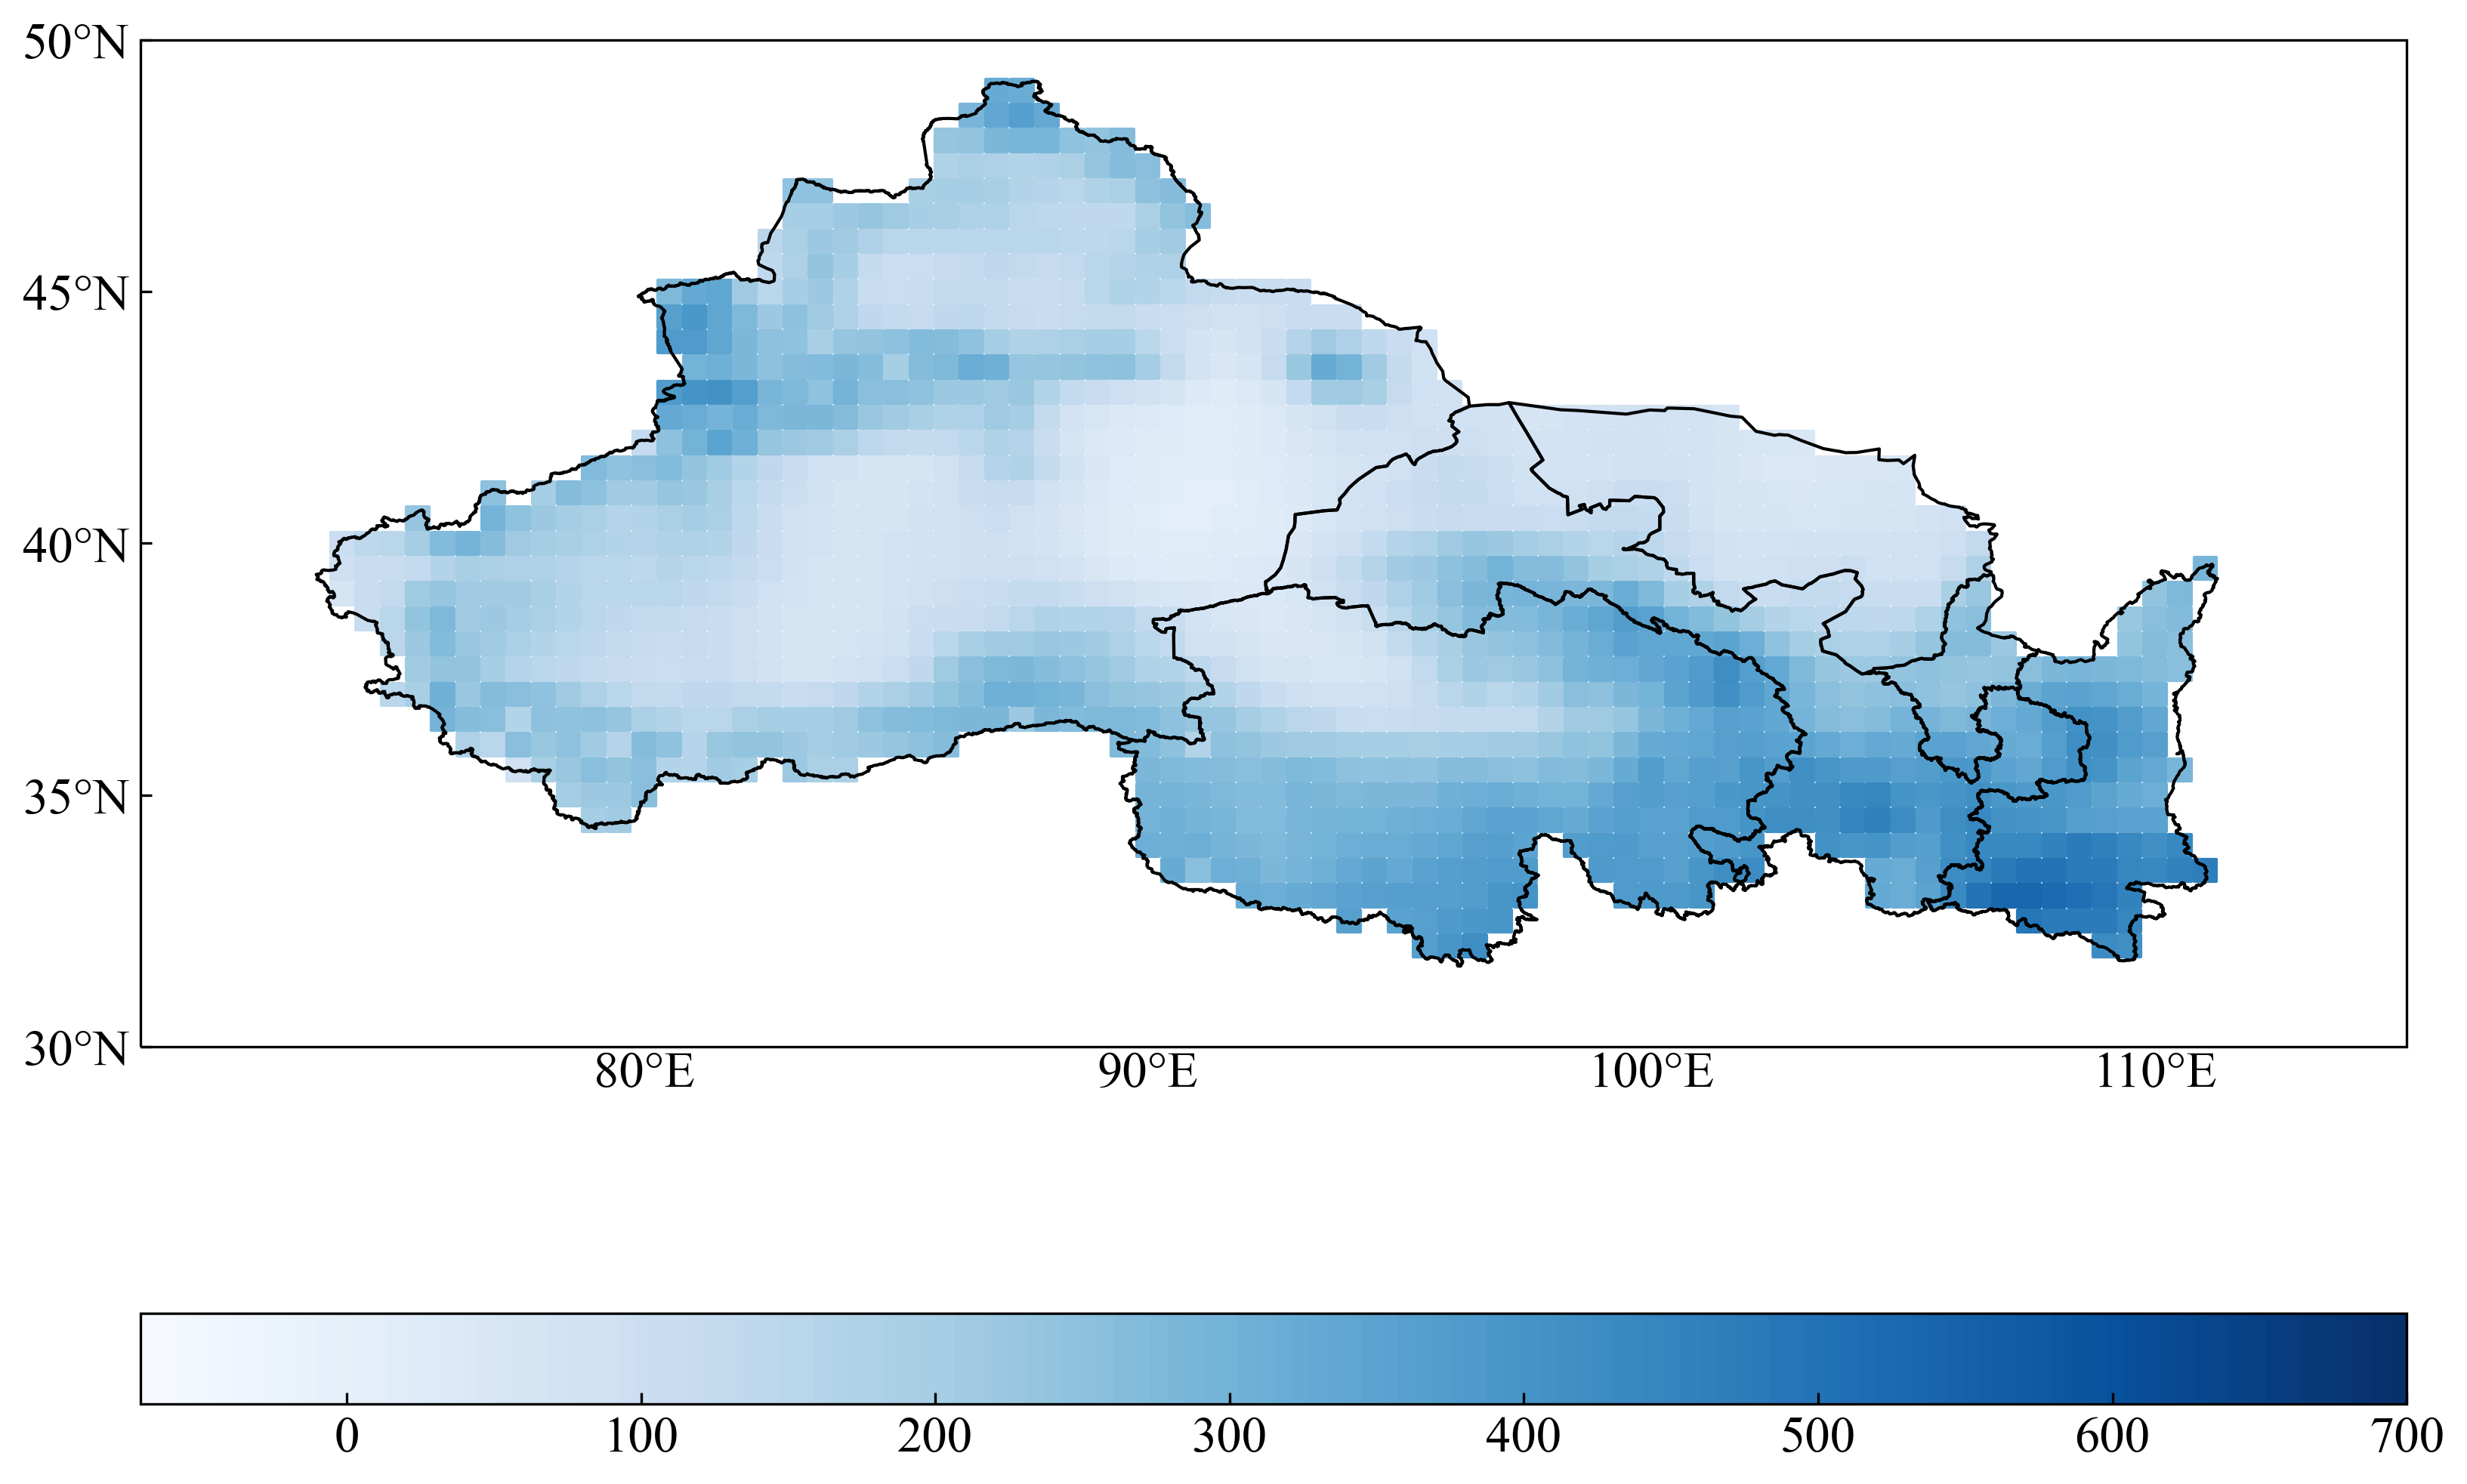

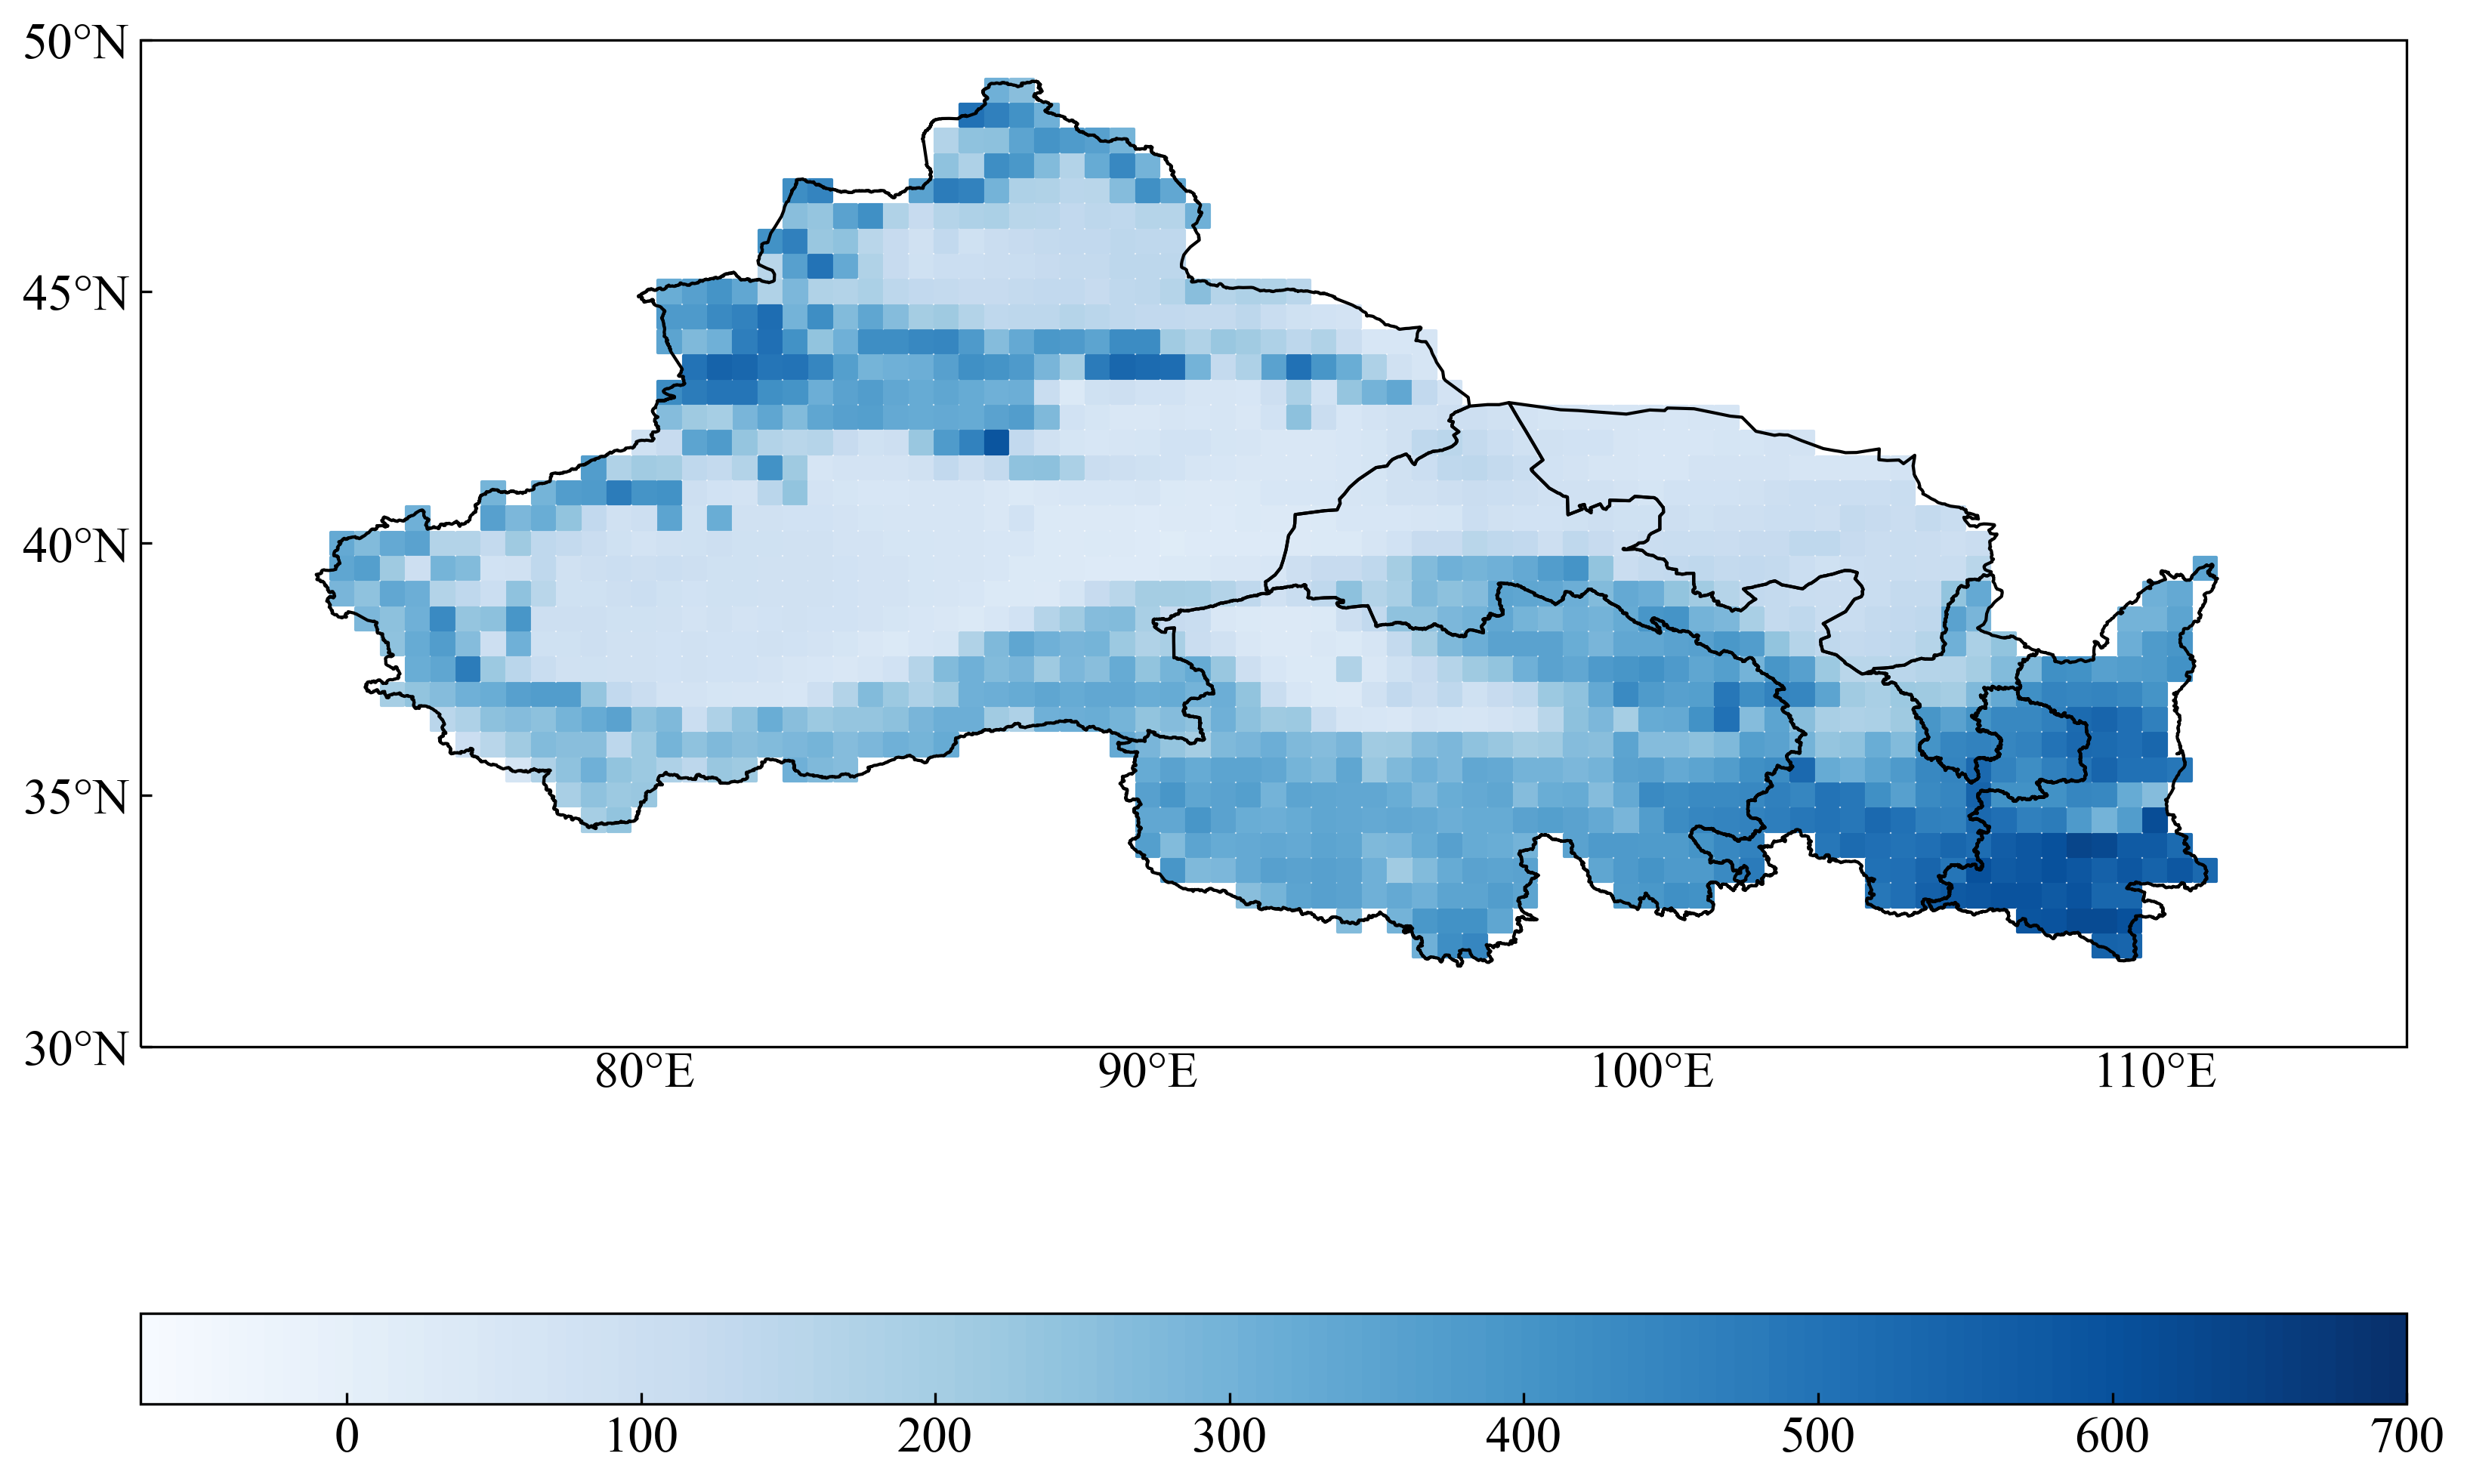

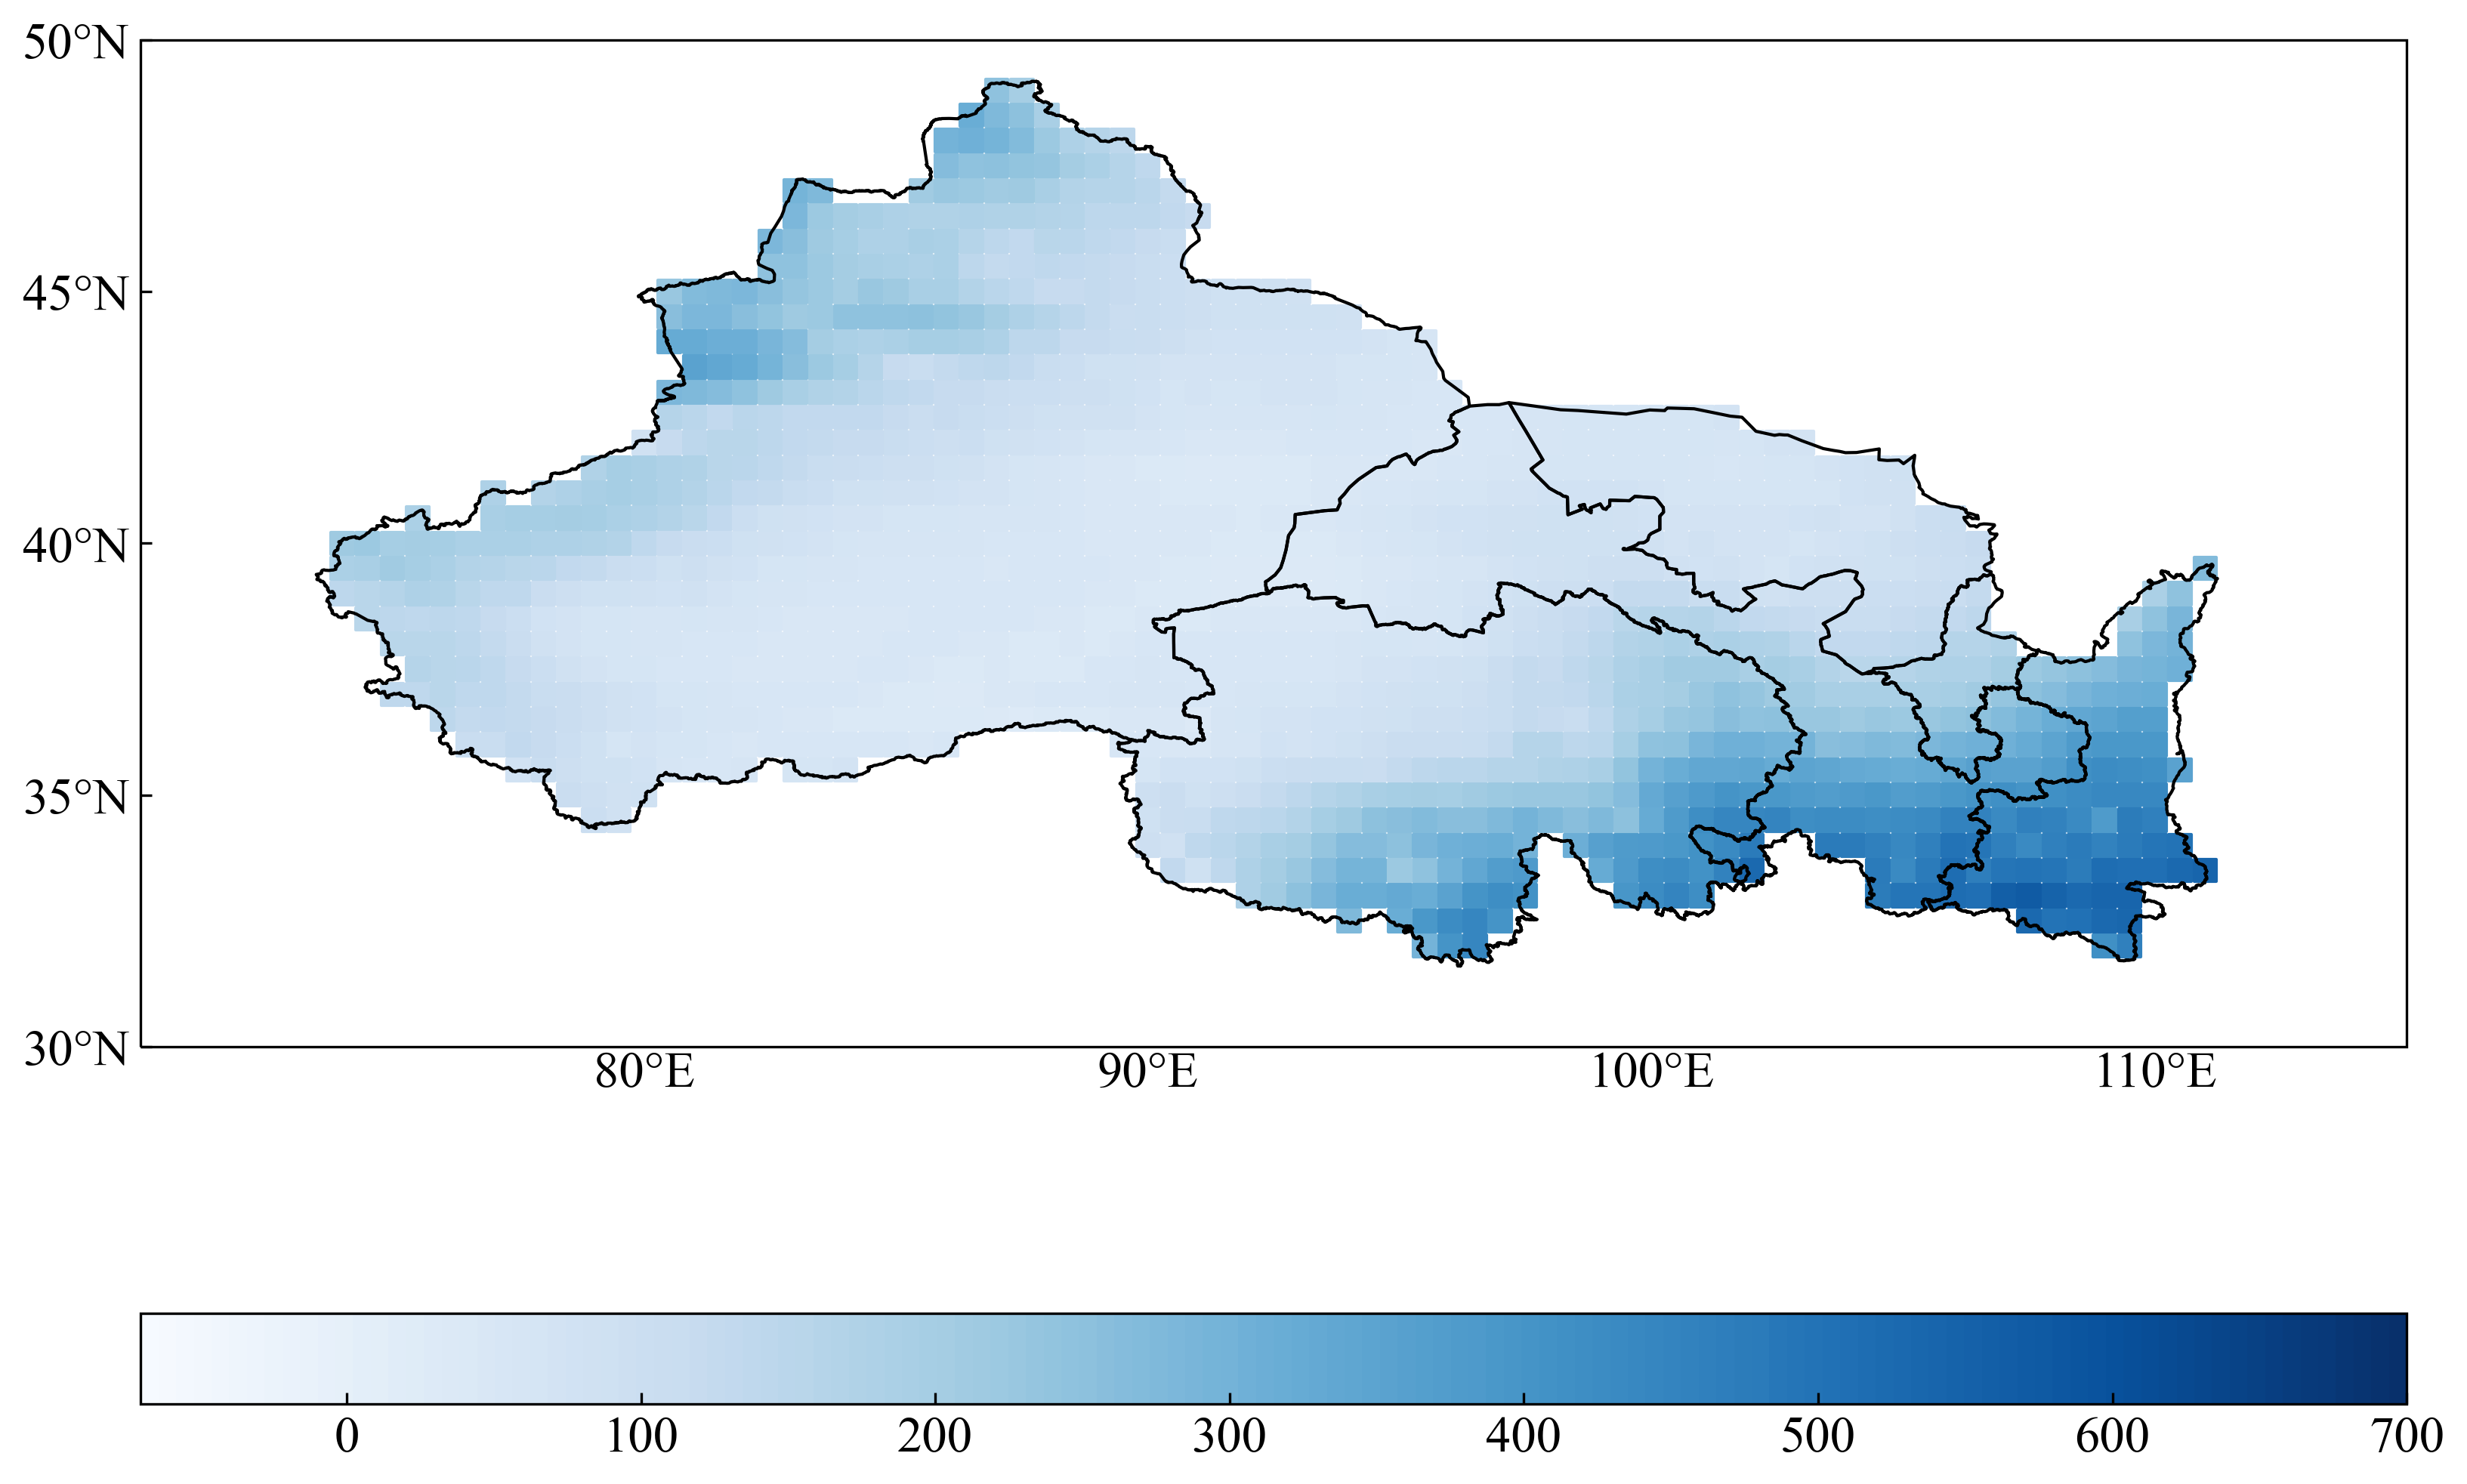

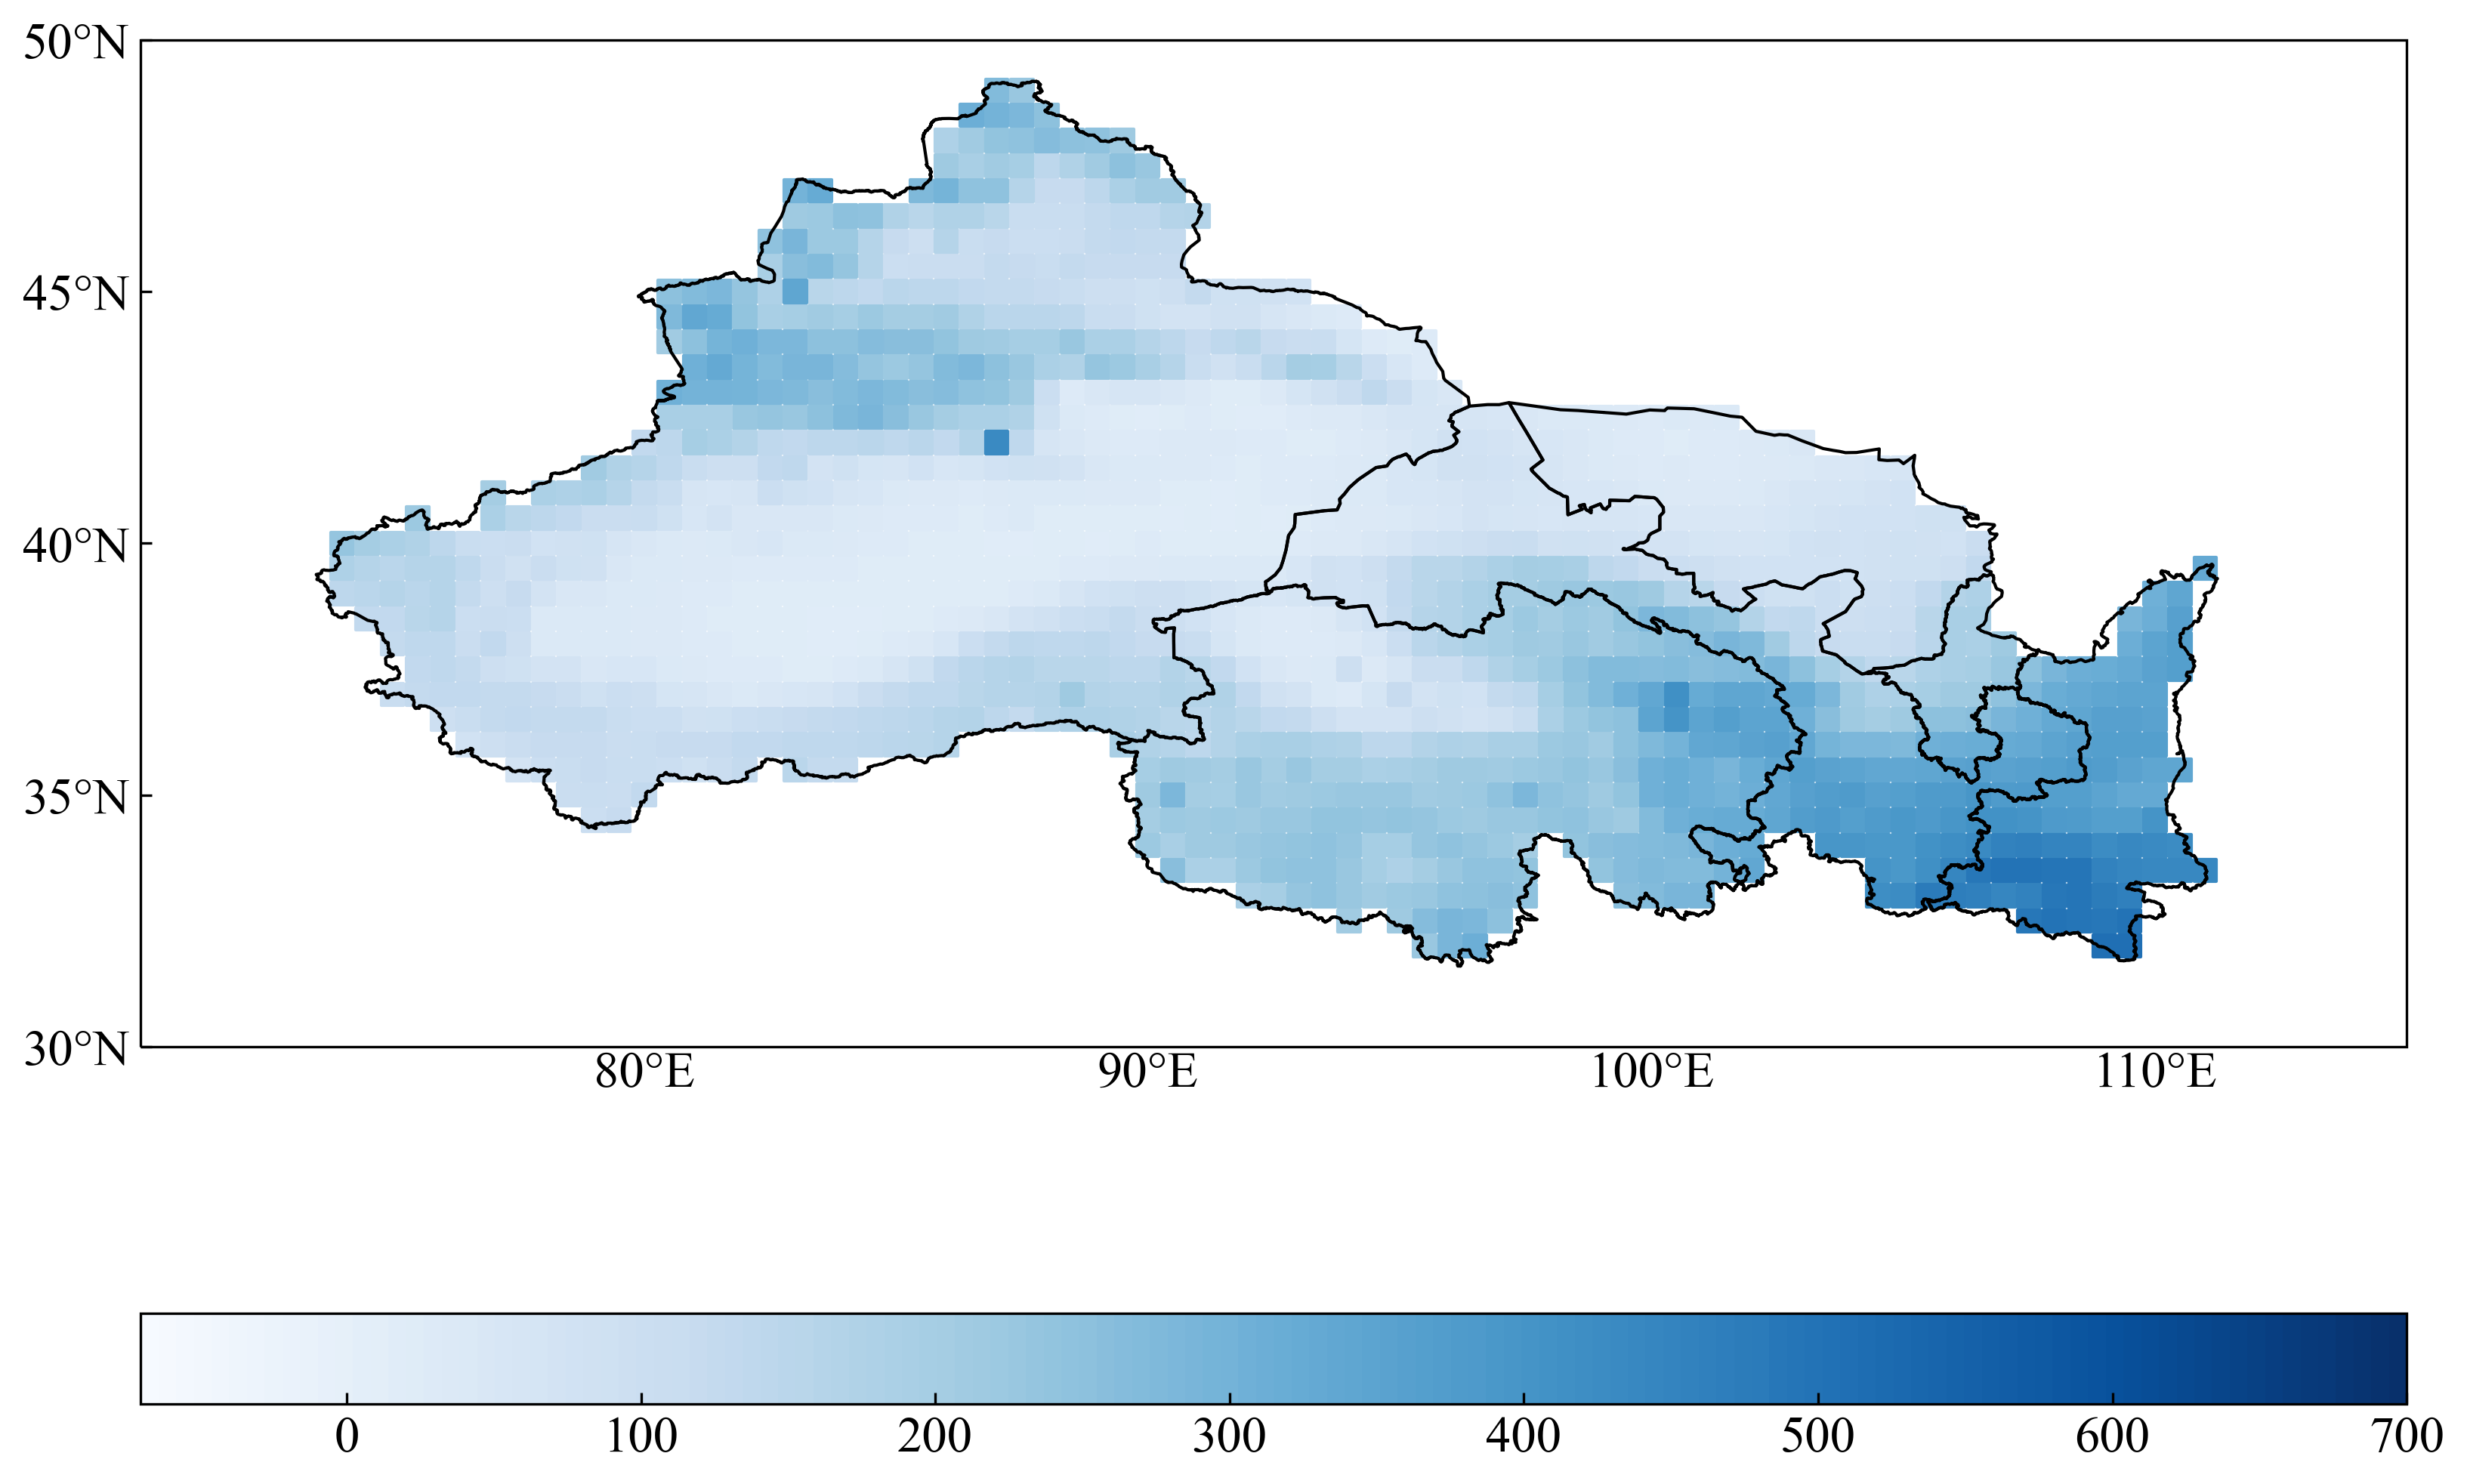

In [25]:
graph_yellow_river_wet(DATA['Lon'],DATA['Lat'],DATA['slope1'],'a')
graph_yellow_river_wet(DATA['Lon'],DATA['Lat'],DATA['slope2'],'a')
graph_yellow_river_wet(DATA['Lon'],DATA['Lat'],DATA['slope3'],'a')
graph_yellow_river_wet(DATA['Lon'],DATA['Lat'],DATA['slope4'],'a')
graph_yellow_river_wet(DATA['Lon'],DATA['Lat'],DATA['slope5'],'a')

## dry season

In [27]:
lon = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['lon']
lat = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['lat']
slope1 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['A-T (mm)']
slope2 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['ET-TPDC (mm)']
slope3 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['ET-ERA5 (mm)']
slope4 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['ET-GLDAS (mm)']
slope5 = pd.read_excel('/mnt/e/Research_life/AWM/Desktop/年、湿季、干季的蒸散发.xlsx',sheet_name=2)['ET-GLEAM (mm)']

DATA = pd.DataFrame()
DATA['Lon'] = lon
DATA['Lat'] = lat
DATA['slope1'] = slope1
DATA['slope2'] = slope2
DATA['slope3'] = slope3
DATA['slope4'] = slope4
DATA['slope5'] = slope5

In [28]:
def graph_yellow_river_dry(lon,lat,data,fig_a): # txt site-data # judge whether fig a or b 
    ## graph
    import cartopy.crs as ccrs
    import matplotlib as mpl
    import cmaps
    from matplotlib import rcParams
    import matplotlib.pyplot as plt
    import cartopy.io.shapereader as shpreader
    from cartopy.io.shapereader import Reader, natural_earth
    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

    config = {
        'font.family':'Times New Roman',
        'font.size':16,
        'axes.unicode_minus':False

    }
    rcParams.update(config)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # chinese_font = FontProperties(fname='/mnt/e/Research_life/cyq/微软雅黑.ttf')

    # data = DATA['slope1']
    fig = plt.figure(figsize=(20,20), dpi = 300)
    proj = ccrs.PlateCarree()

    # 使图一colorbar映射在同一水平
    # norm1 = mpl.colors.Normalize(vmin=-abs(np.nanmax(slope1)), vmax=abs(np.nanmax(slope1)))

    levels = [0,0.002,0.004]
    ## graph one
    ax1 = fig.add_axes([0.1, 0.9, 0.5, 0.5],projection = proj)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.2, color='k', alpha=0.5, linestyle='--')
    
    if fig_a=='a':
        # ax1.set_title('(a)',loc='left',fontsize=26)
        gl.ylabels_right = False
        gl.xlabels_top = False
        gl.ylabels_left = False
    else:
        # ax1.set_title('(b)',loc='right',fontsize=26)
        gl.ylabels_left = False
        gl.xlabels_top = False
        gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    china = shpreader.Reader('/mnt/e/Research_life/ArcGIS/西北片区省界/西北片区省界/更改坐标系后/1.shp').geometries()
    ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
    ax1.set_extent([95,114,32,43], crs = ccrs.PlateCarree())
    # ax1.scatter(lon,lat, p,[np.nanmin(p),0.01,np.nanmax(p)], zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
    # # 设置norm.
    bins = [0.0001, 0.002, 0.004]
    nbin = len(bins) - 1
    norm = mcolors.BoundaryNorm(bins, nbin)
    norm = mpl.colors.Normalize(vmin=-40, vmax=400)
    # # 设置cmap.
    position1 = fig.add_axes([0.1, 0.96, 0.5, 0.02])
    color = ['#e0aea4','#c8cc89']
    cmap = mcolors.ListedColormap(color)
    cmap = cm.get_cmap(cmap,nbin)
    cmap.set_under('#9e1e71')
    cmap.set_over('#636e2e')
    c1 = ax1.scatter(lon,lat,s=50,marker='s',zorder=0,c=data,transform=ccrs.PlateCarree(),
                     cmap=cmaps.MPL_Blues,
                     norm=norm
                     )
    cbar=fig.colorbar(c1,cax=position1,orientation='horizontal',
                    #   format='%.2f',
                    #   extend='both'
                      )
    ax1.set_yticks([30, 35, 40, 45, 50], crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter()
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.set_extent([70,115,30,50],crs = ccrs.PlateCarree()) 
    #添加色标，position定义色标位置，c1指定从c1填色图层取色，由于C3,C1的levles相同，所以色标一致，orientation设置色标为水平还是垂直，format设置色标标签格式
    # cbar.set_label('趋势变化',fontproperties=chinese_font,fontsize = 16)
    return

In [36]:
print(np.nanmin(DATA))
print(np.nanmax(DATA))

-32.34862899798805
331.96950535642833


/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/jasper/miniconda3/envs/jay/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


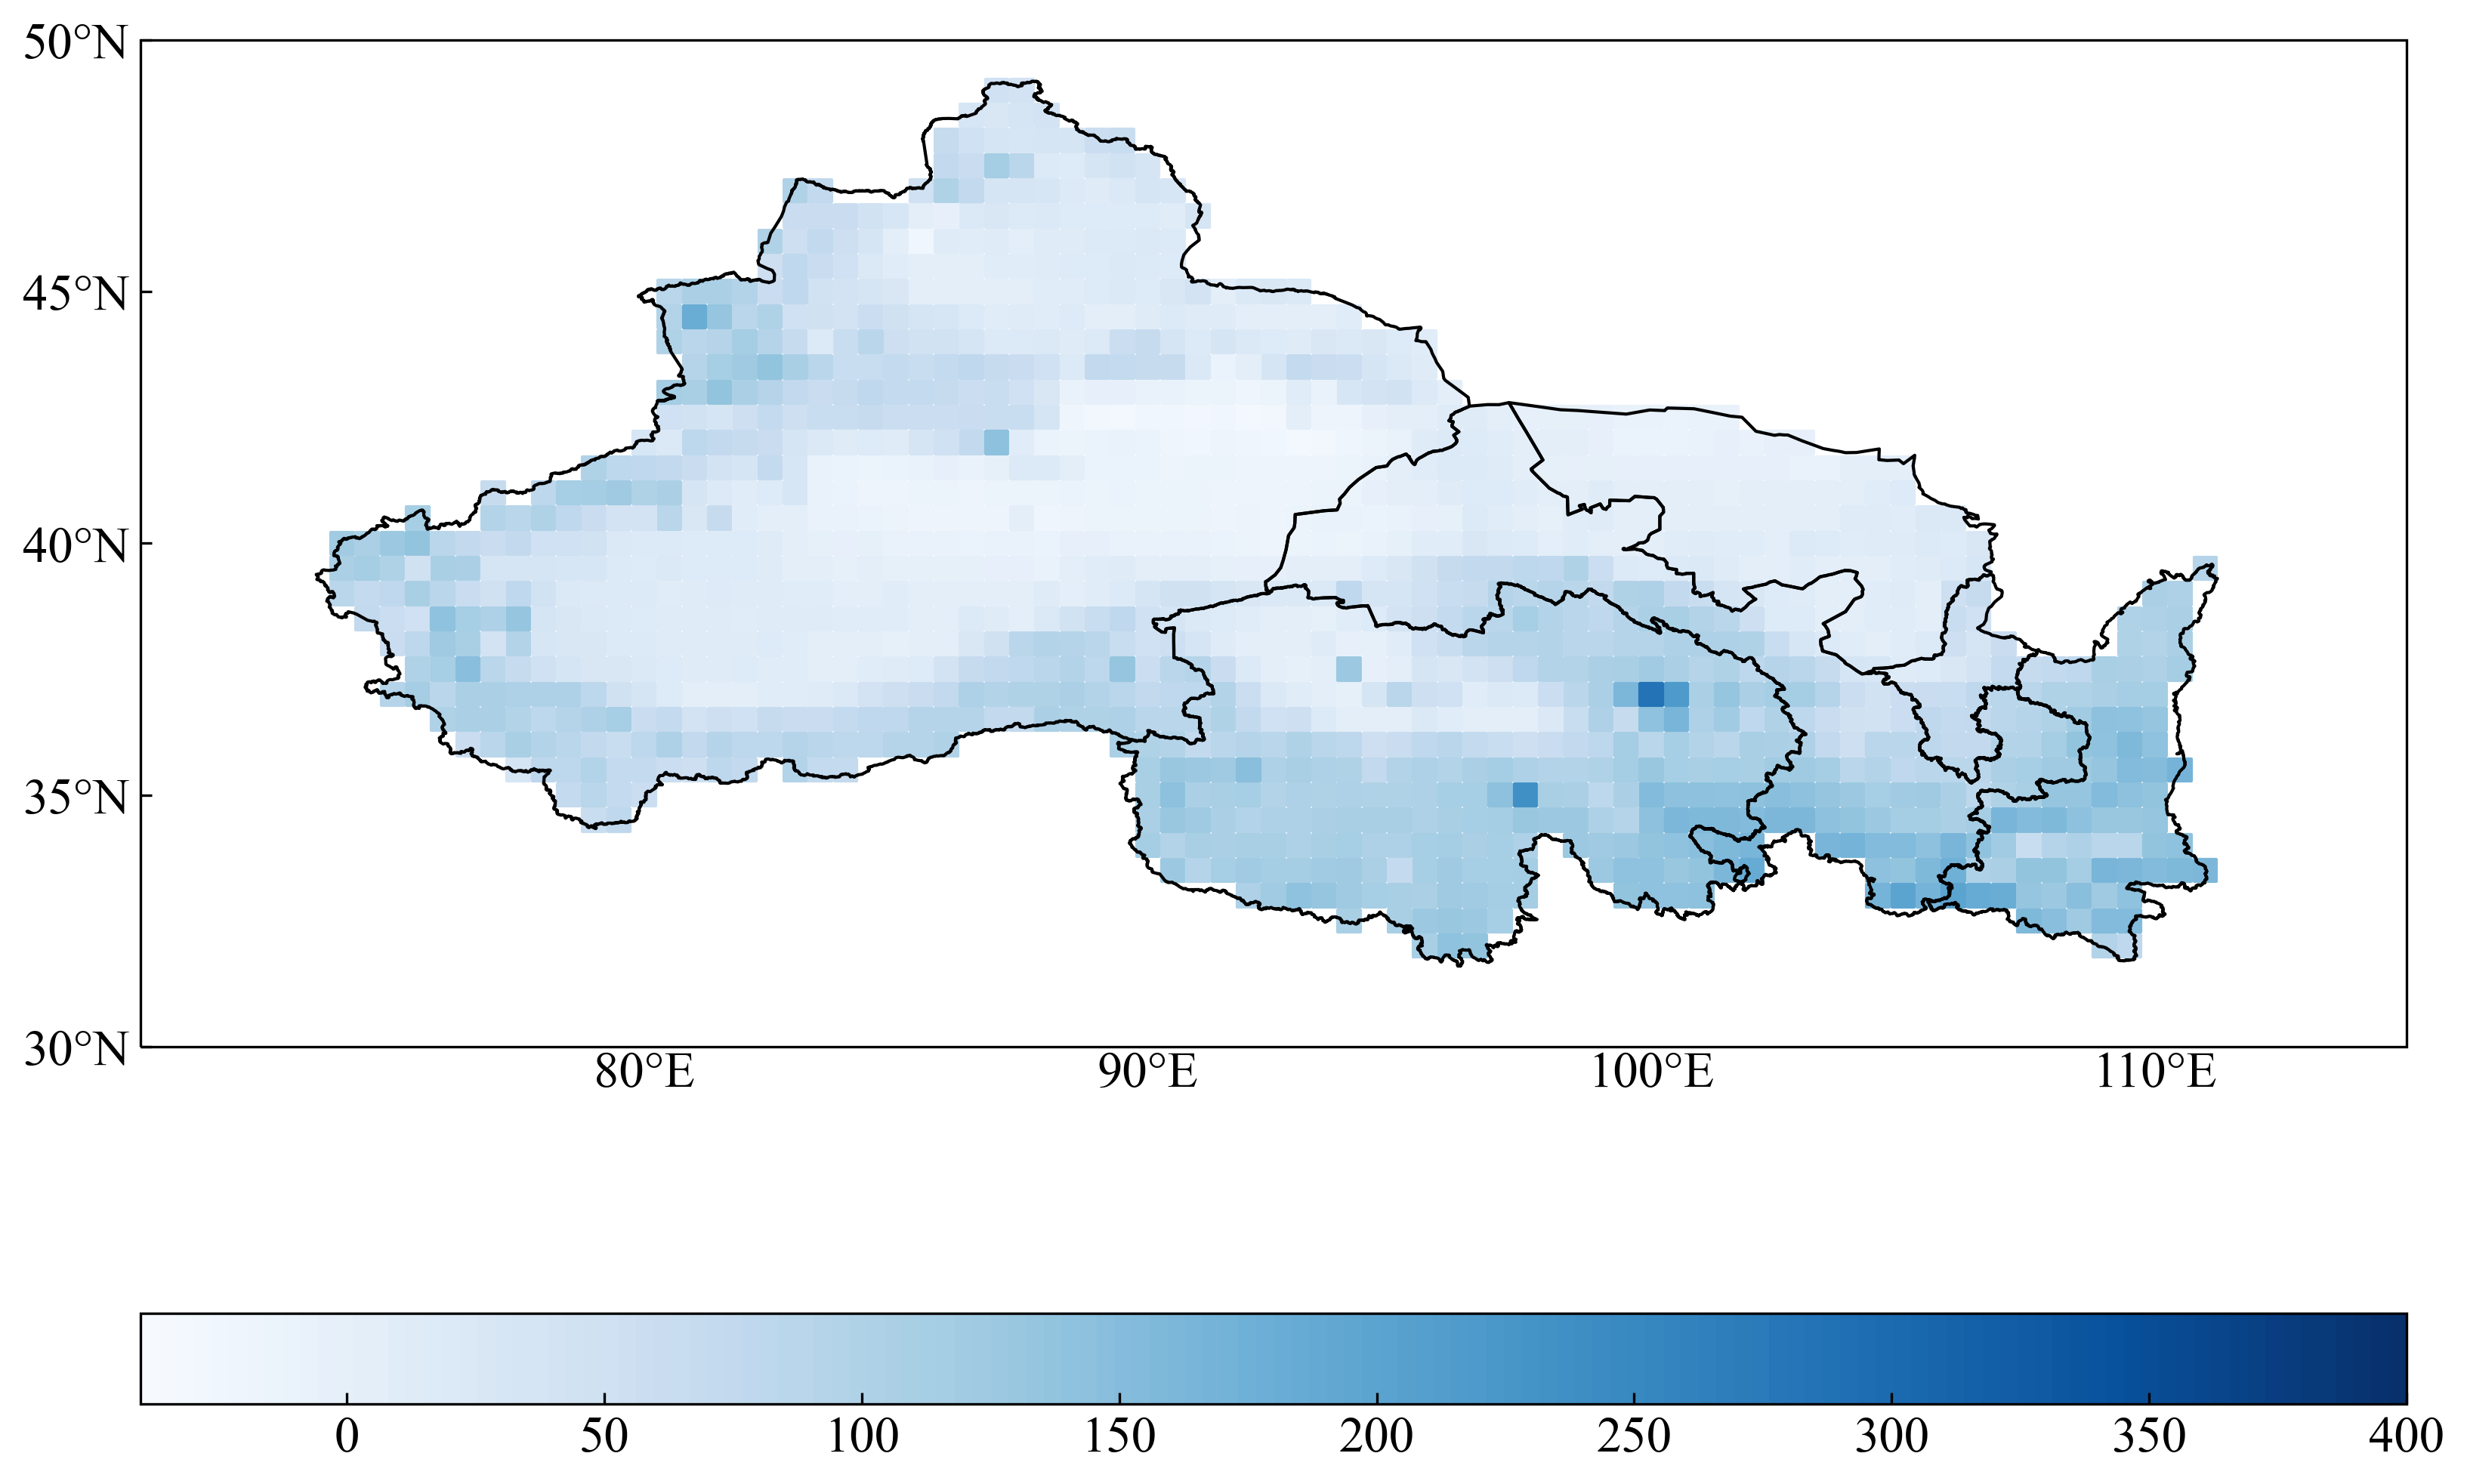

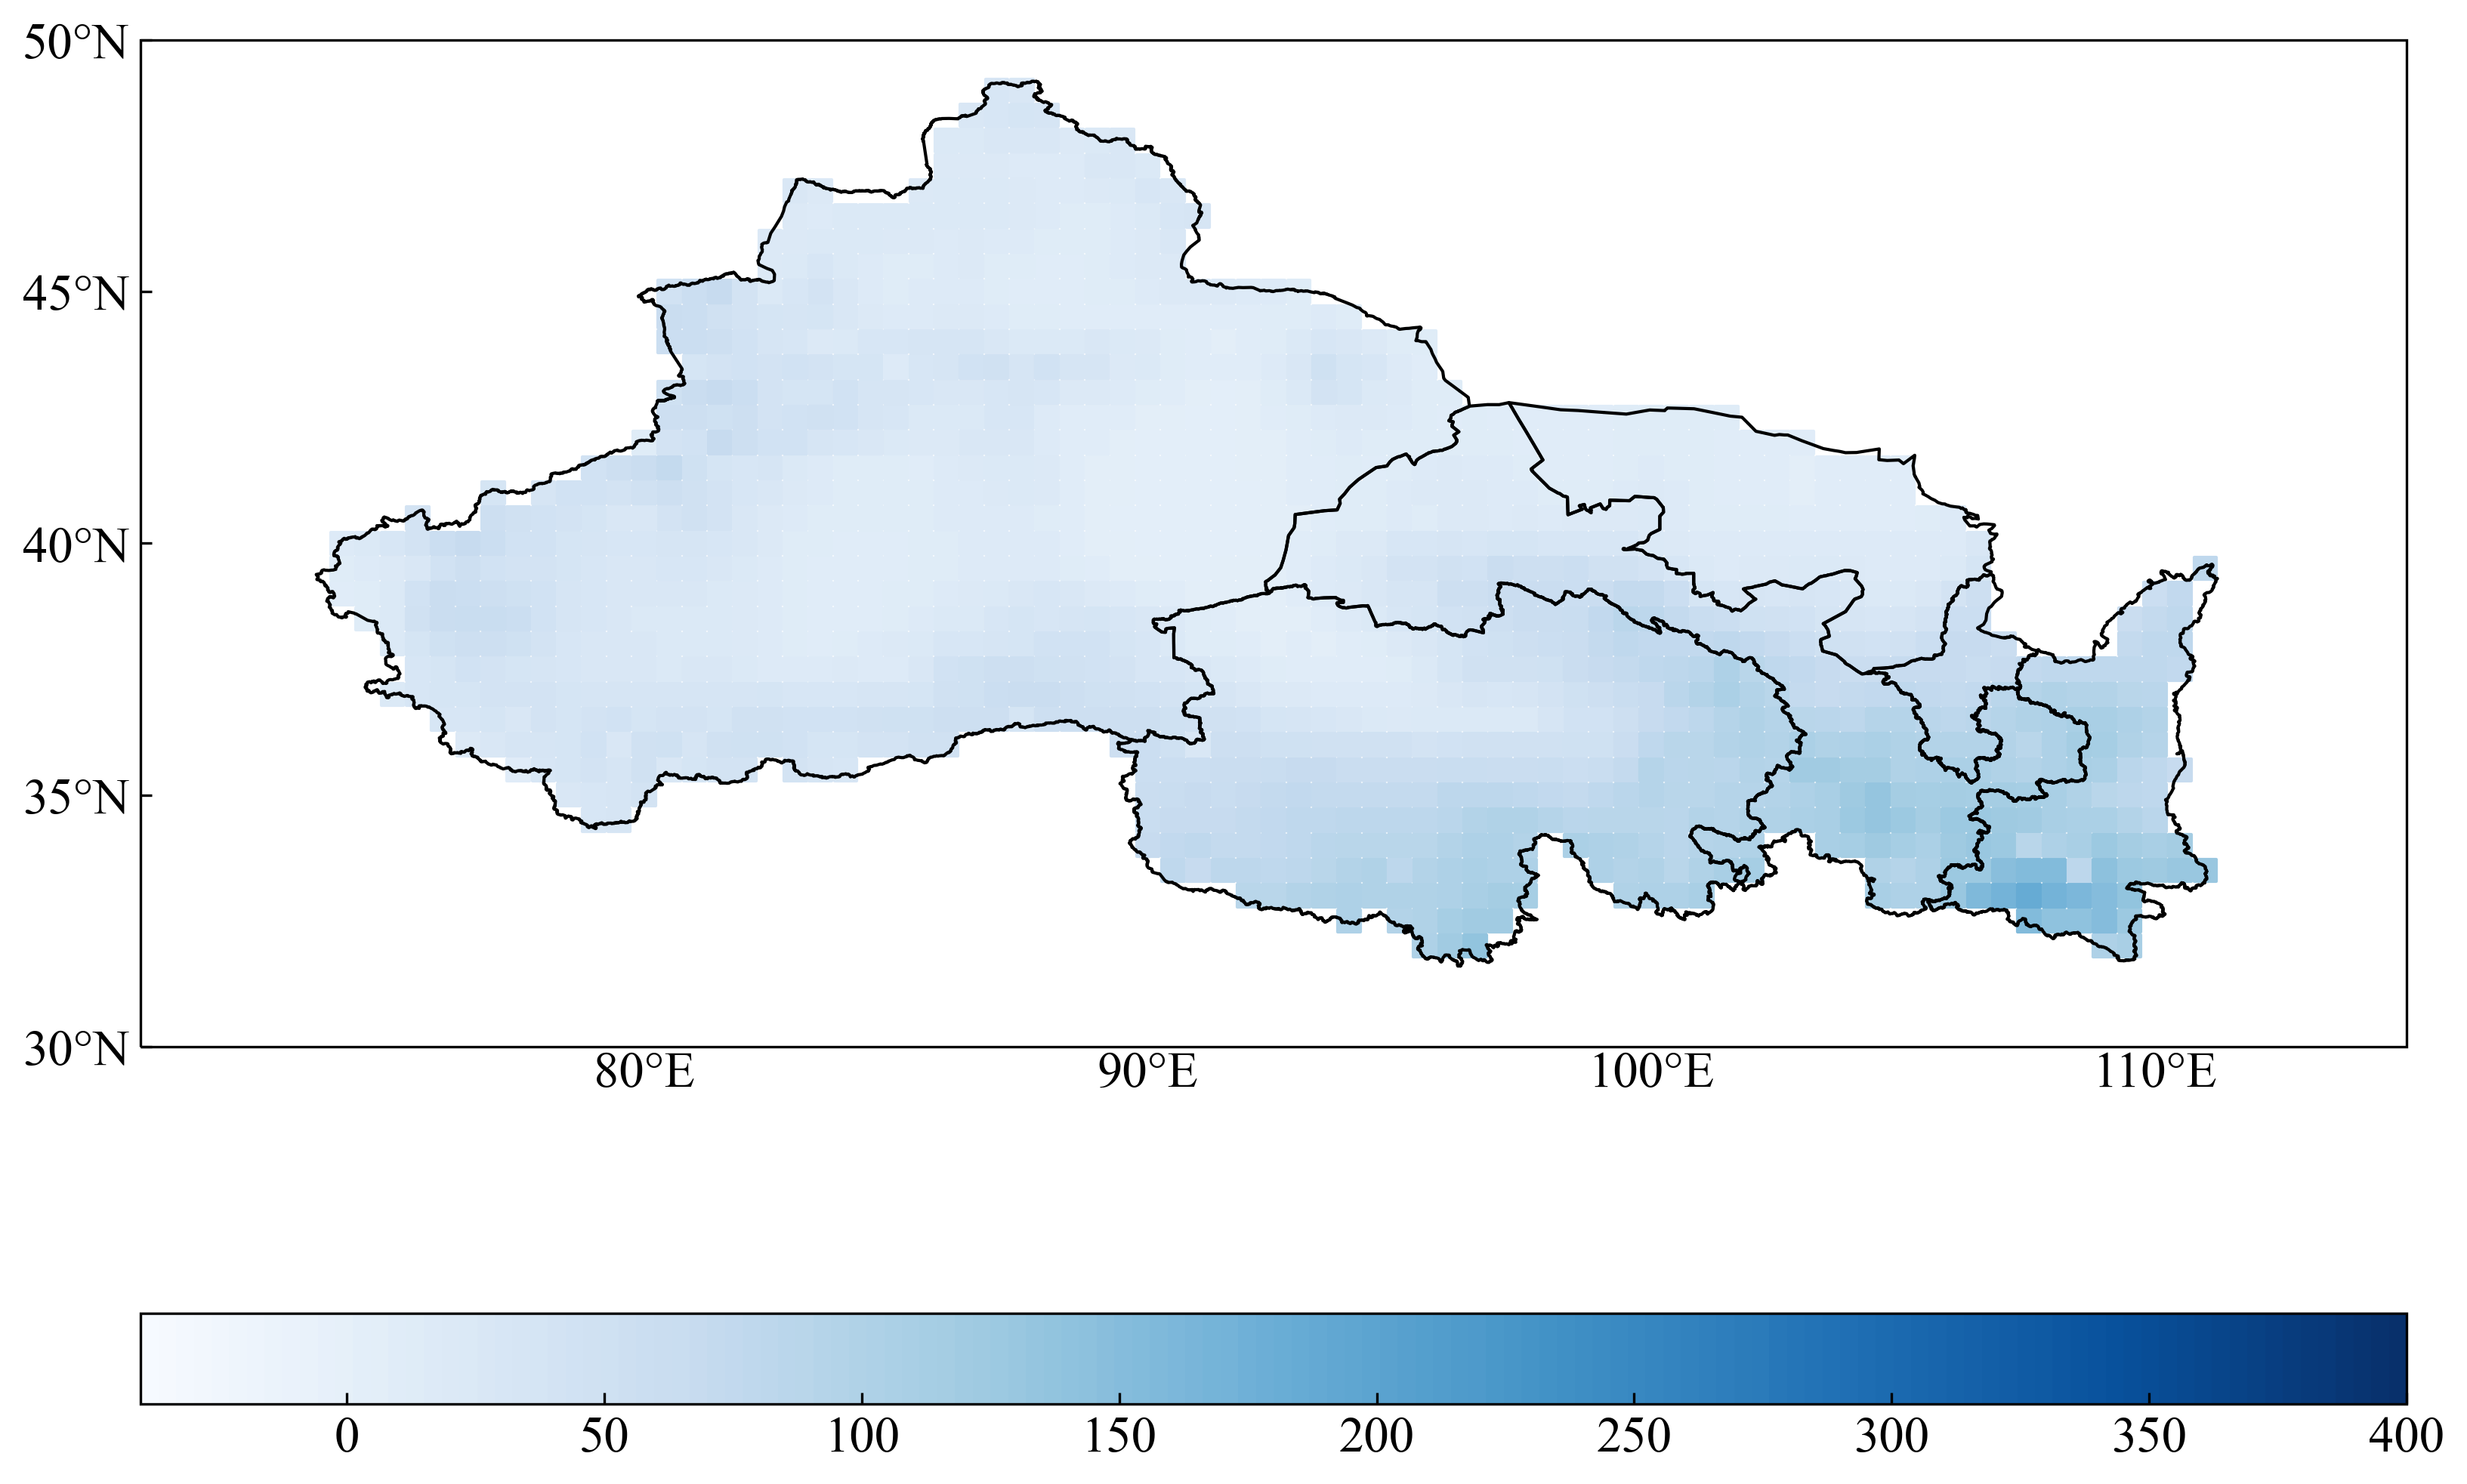

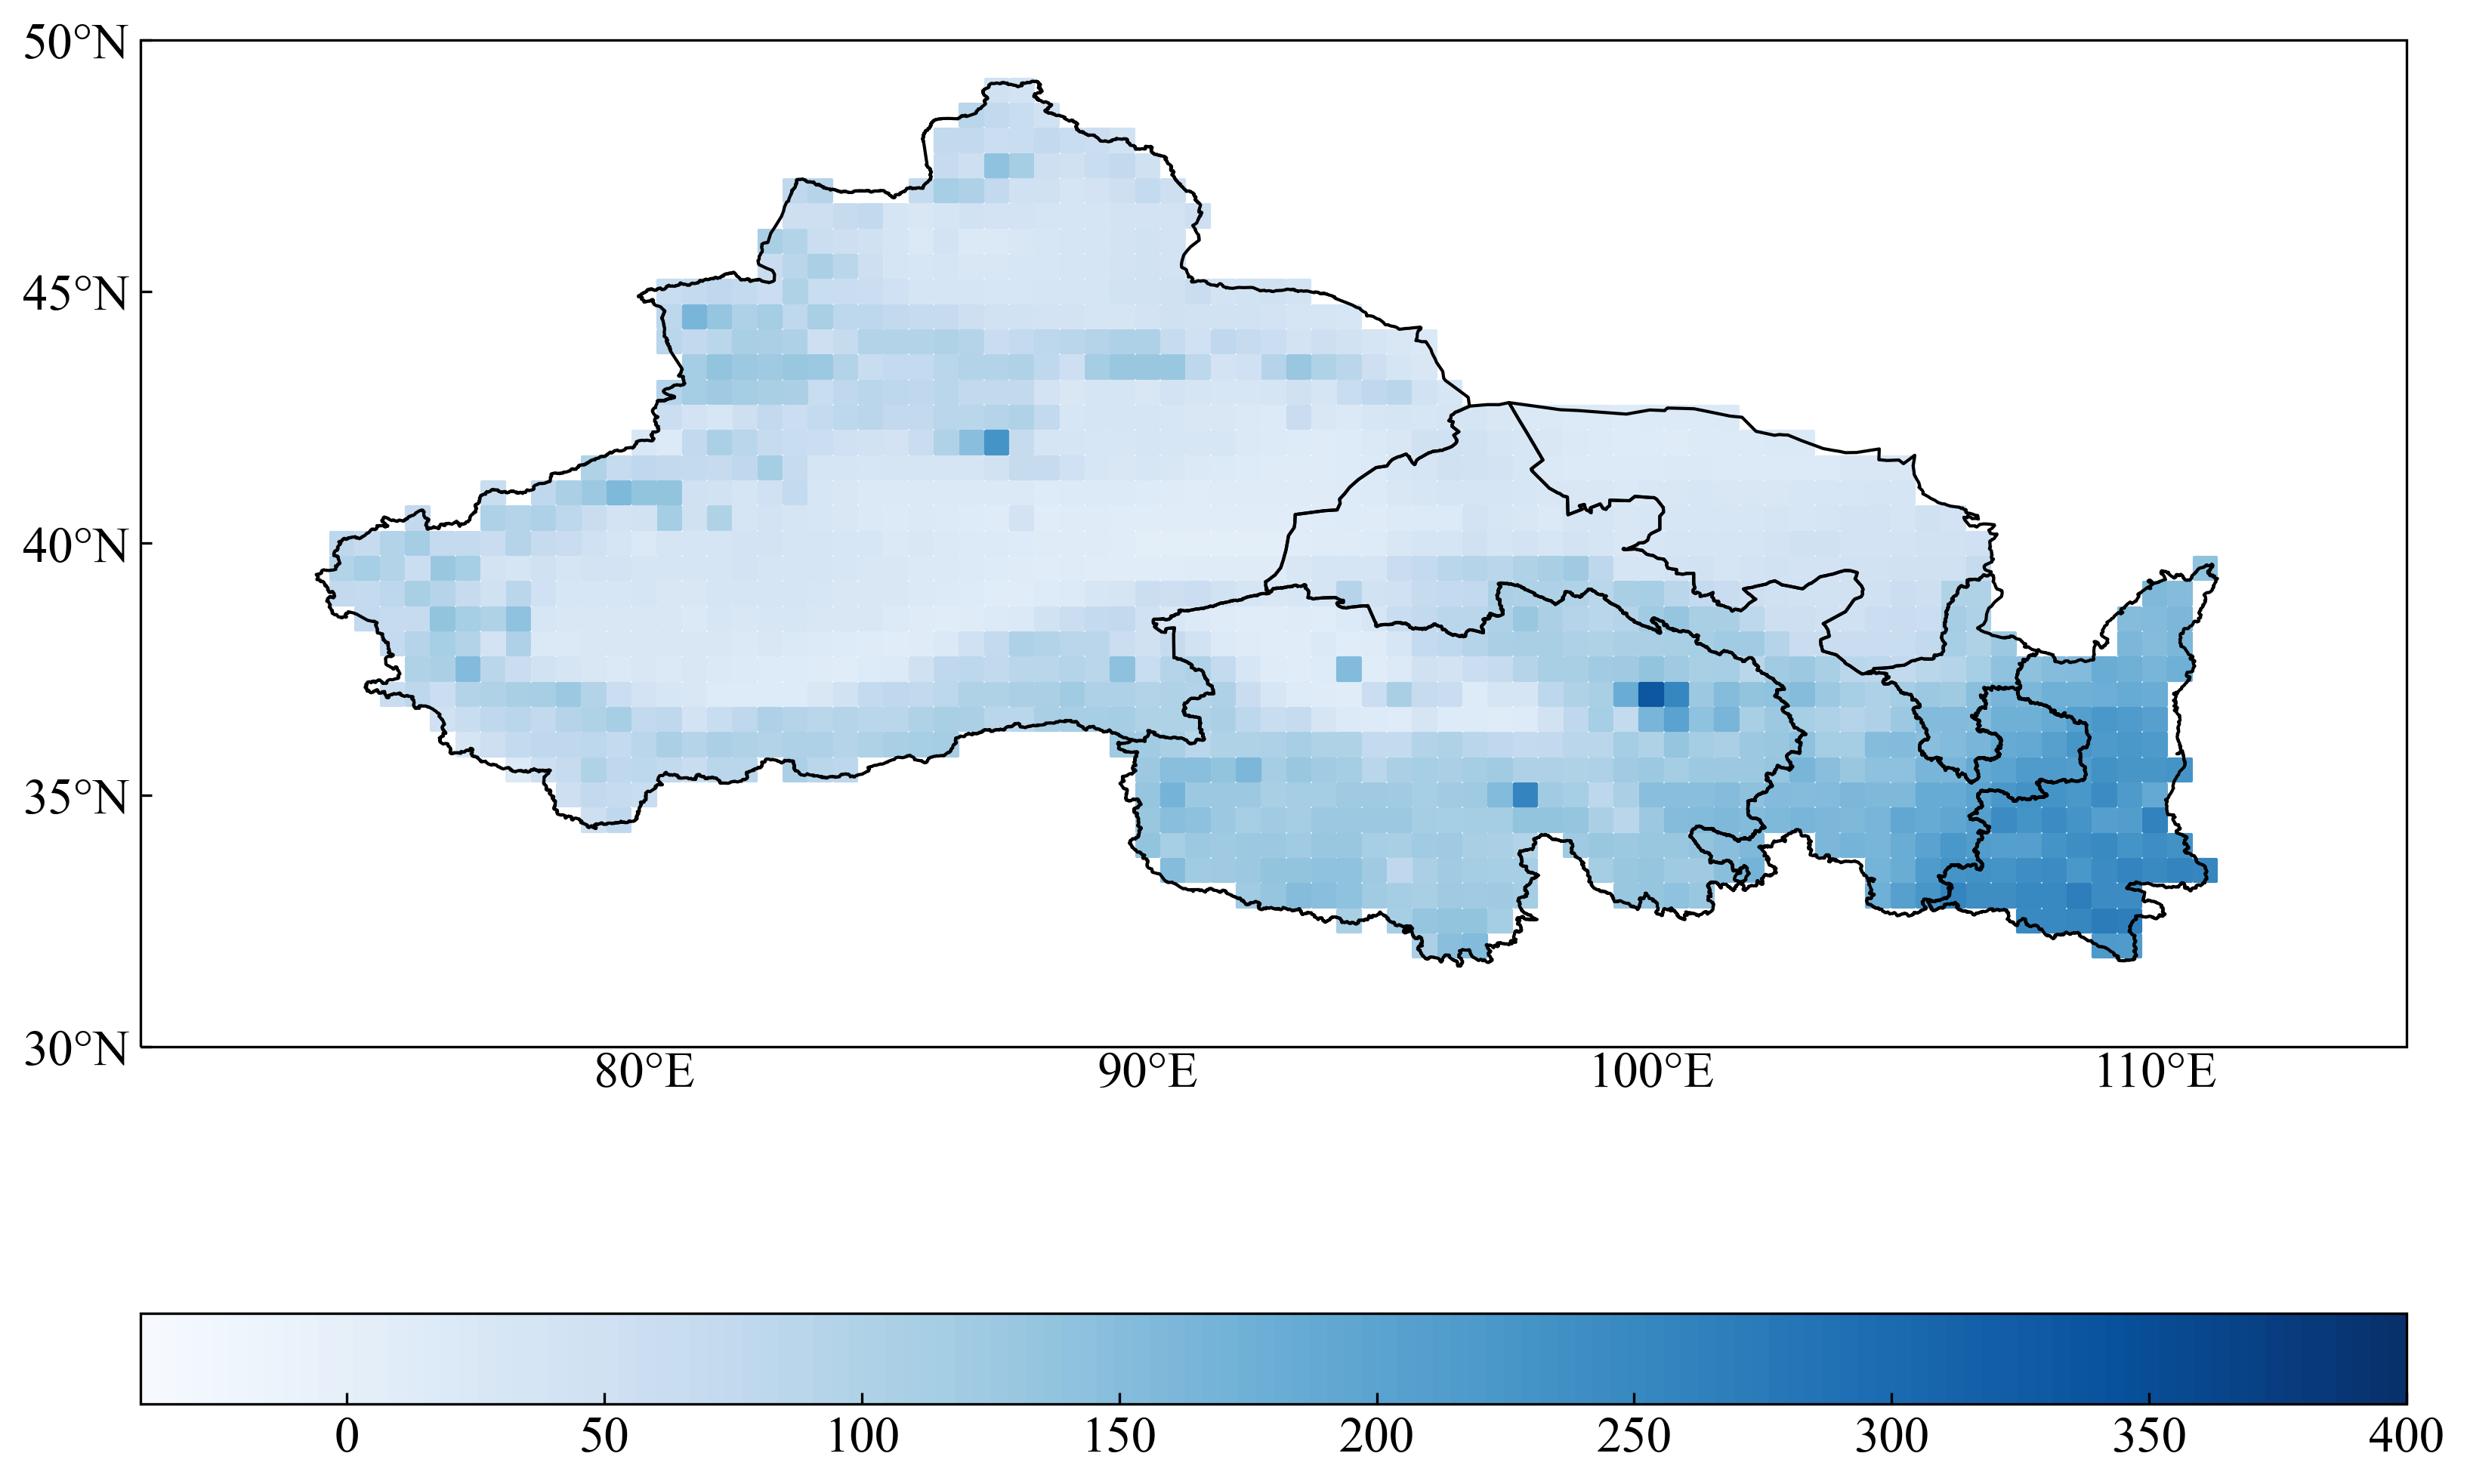

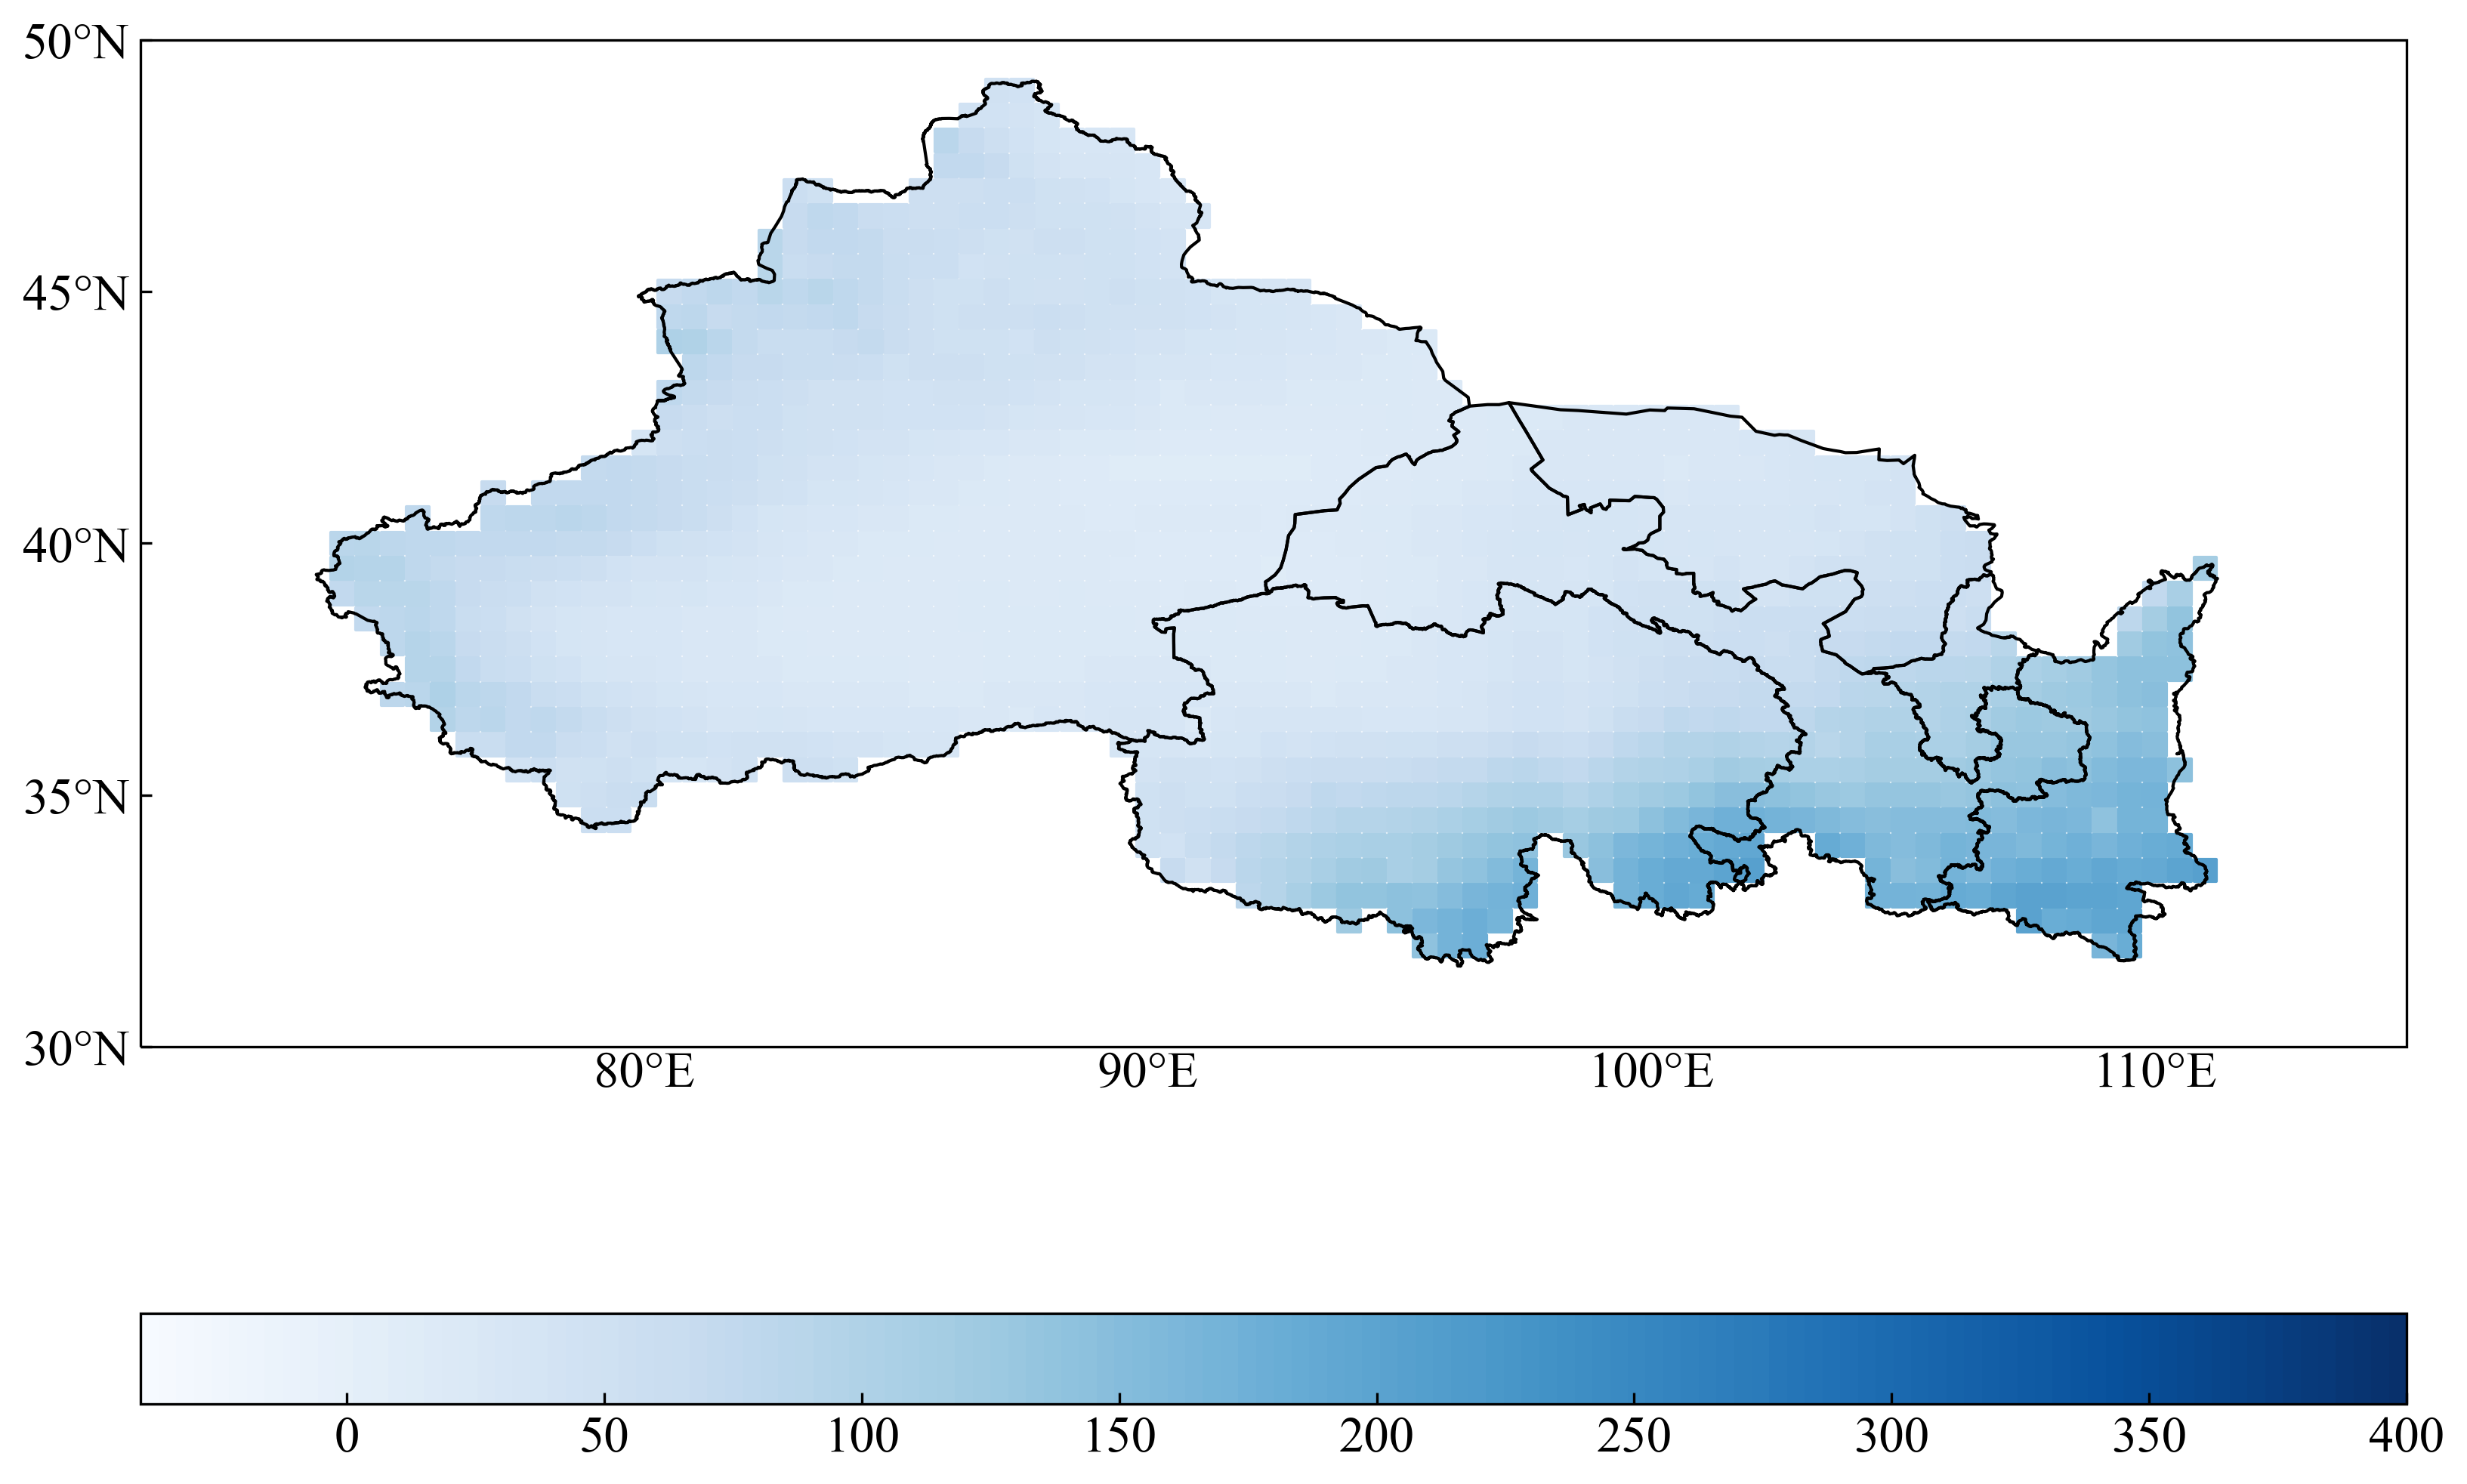

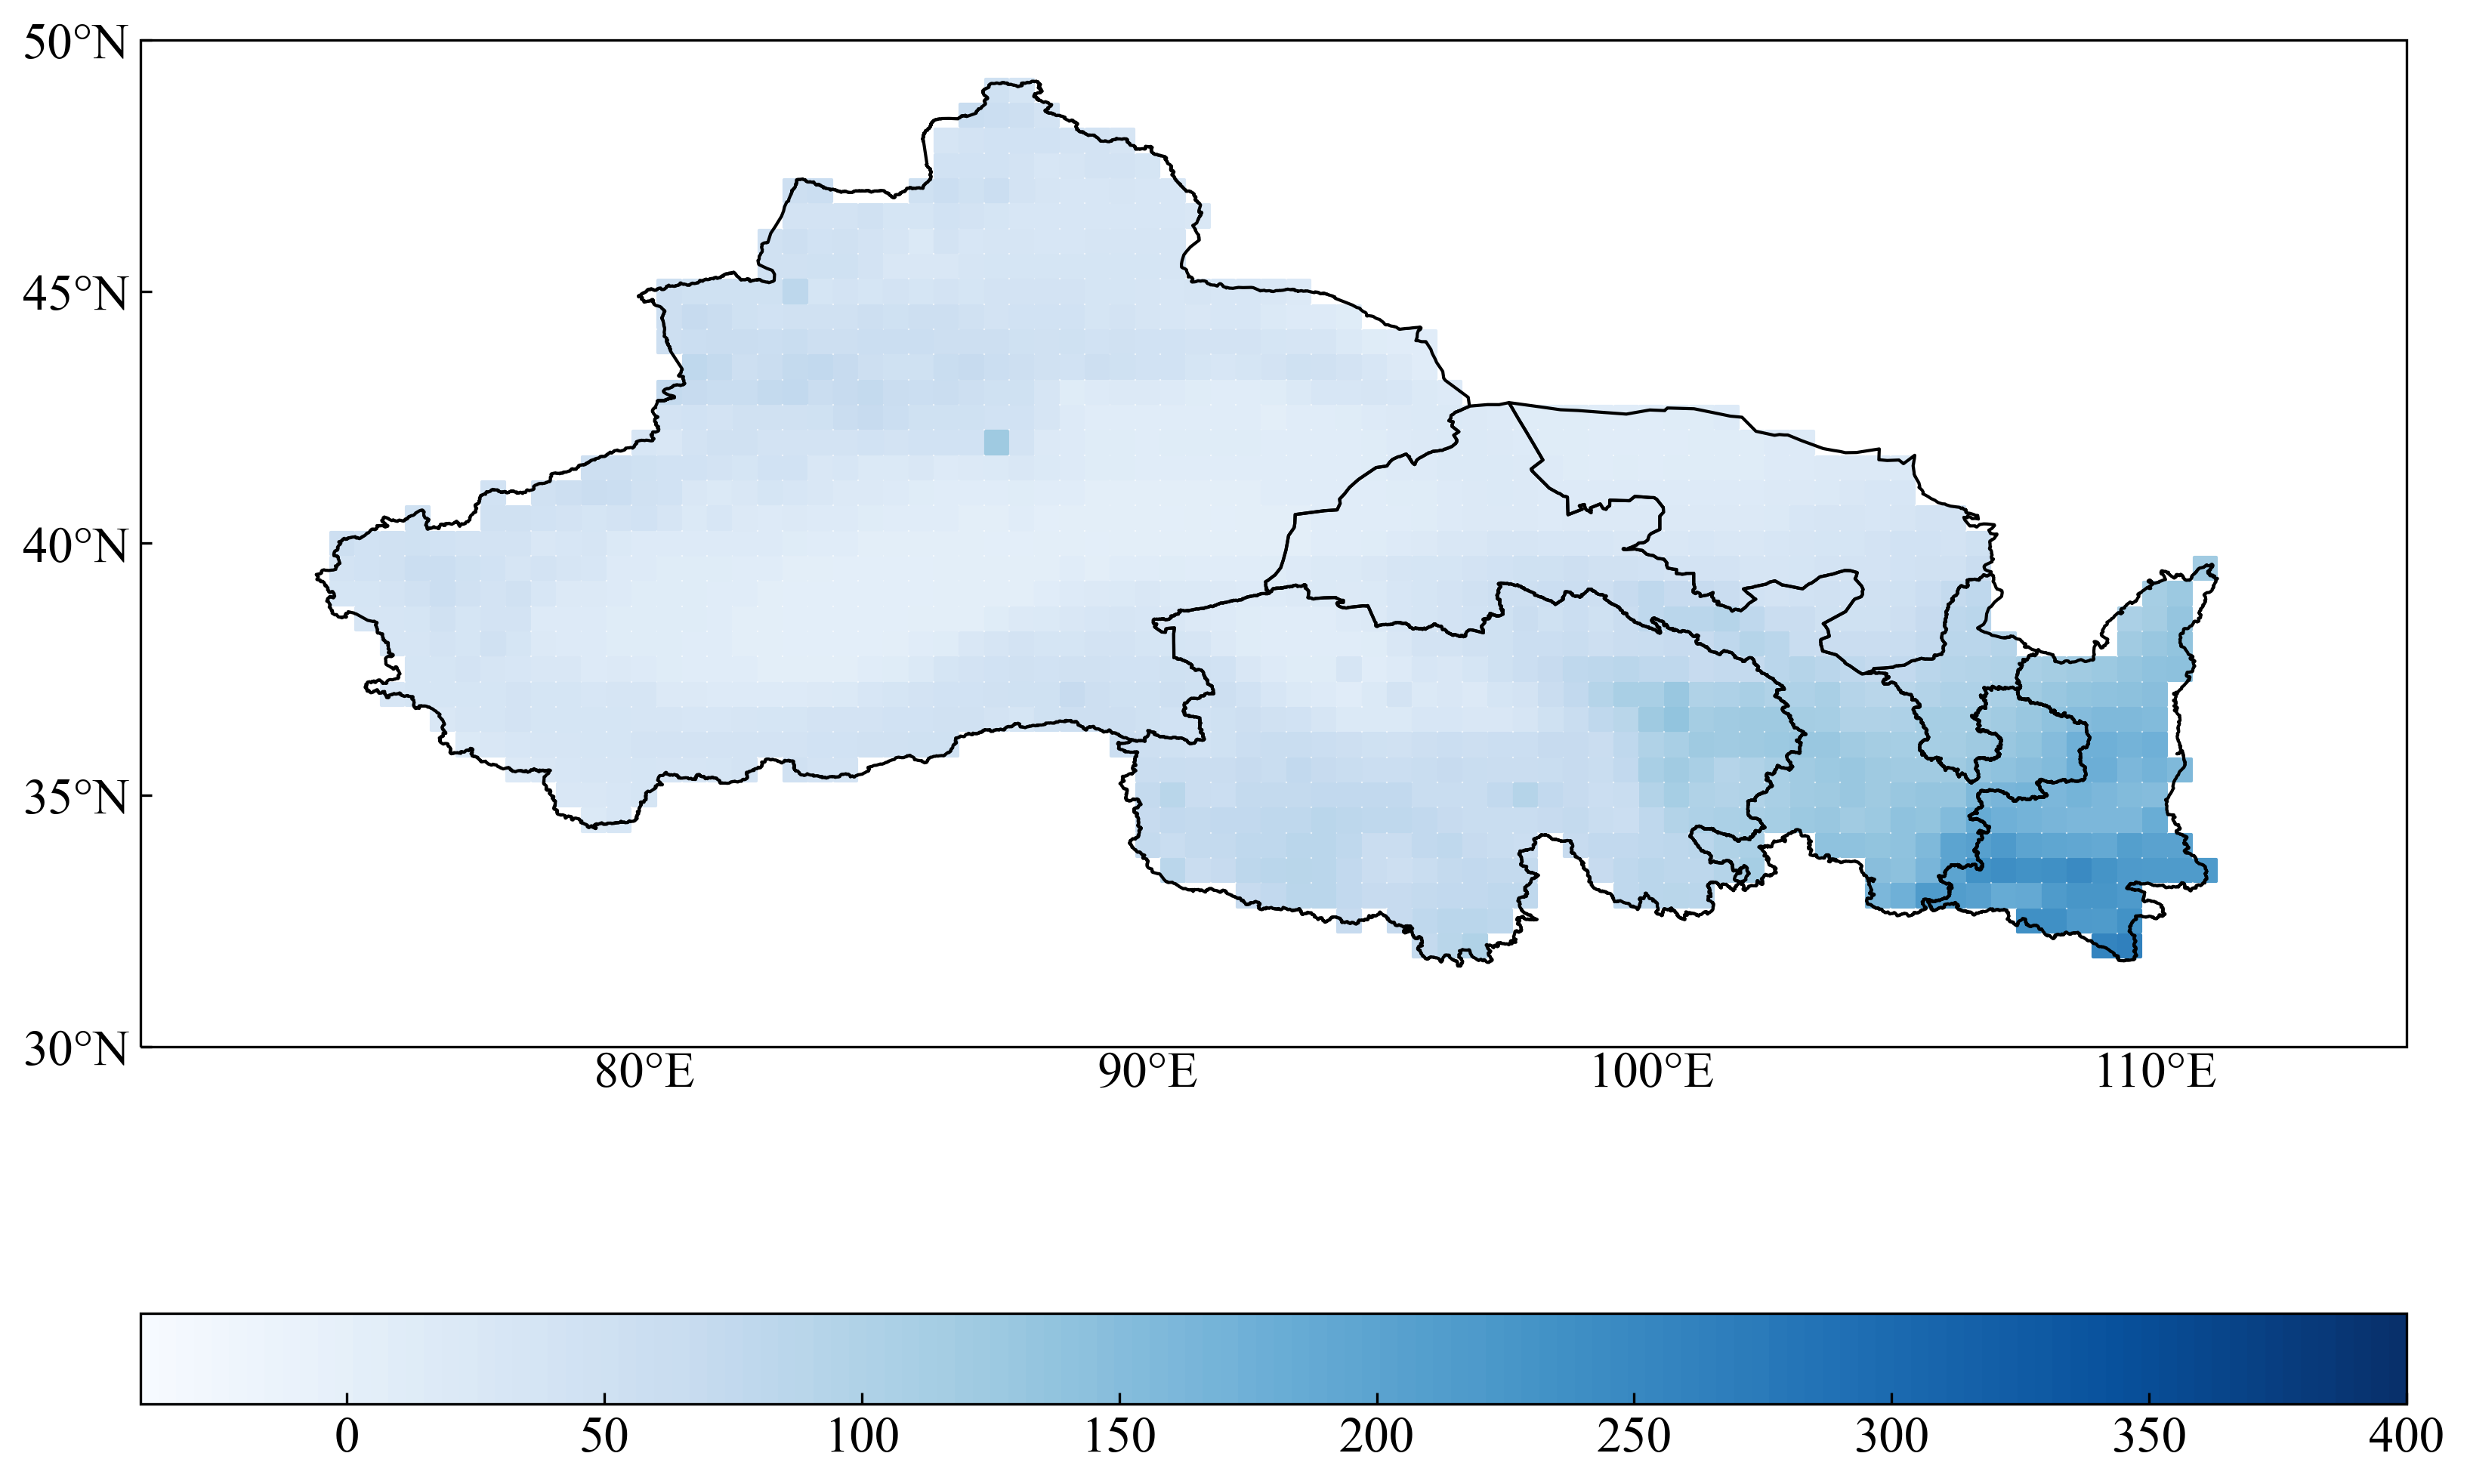

In [29]:
graph_yellow_river_dry(DATA['Lon'],DATA['Lat'],DATA['slope1'],'a')
graph_yellow_river_dry(DATA['Lon'],DATA['Lat'],DATA['slope2'],'a')
graph_yellow_river_dry(DATA['Lon'],DATA['Lat'],DATA['slope3'],'a')
graph_yellow_river_dry(DATA['Lon'],DATA['Lat'],DATA['slope4'],'a')
graph_yellow_river_dry(DATA['Lon'],DATA['Lat'],DATA['slope5'],'a')